# Prediciting a book's popularity on Goodreads' Best Book Ever list

# Part 1 - Data Cleaning and EDA

Author: Laura Mercy

Date: 2022-11-02

Contact: laura.mercym@gmail.com

## 1. Introduction

In 2021, the books publishing industry represented $109.3bn globally, with more that 2.2 million books published every year. However, growth has been stagnating and even declining between 2016-2020, although it rebounded in 2021 due to the pandemic effect. According to [this report](https://www.ibisworld.com/global/market-size/global-book-publishing/), the global books publishing industry is declining faster than the economy overall. 

**Considering the considerable market size and the competitive marketplace, can we use machine learning to predict a book popularity based on its attributes, so that publishers can adopt a successfull book release strategy and authors can boost their book's success?**

To attempt to answer this question, the Best Books Ever dataset was collected from this [GitHub repository](https://github.com/scostap/goodreads_bbe_dataset) found through Kaggle. The dataset was put together by students in a Master’s Degree in Data Science as part of a project, with data scrapped from GoodReads' Best Book Ever list. It was prepared in November 2020.

Our work for this project will focus on 4 areas, each in a separate Jupyter notebook:

1. Data cleaning and EDA
2. Machine Learning models on a book's features, excluding title and description
3. Machine Learning models on a book's features, including vectorized title and description using Bag of Words and TF-IDF
4. Machine Learning models on a book's features, including vectorized title and description using Word2Vec and GloVe

In this notebook, we will focus on cleaning the dataset and uncovering some data insights.

**Note: You will need to set the kernel to the 'bigdata_ml' environment that was created in class.**

First, we start by importing all the librairies we will need for the data cleanup and visulaization.

In [1]:
#Import all the libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Next, we import the CSV file from our local drive.

In [2]:
# Import the file
books_df = pd.read_csv("data/books_1.Best_Books_Ever.csv")

## 2. Preliminary data cleaning

We can now take a peak at the data, look at the shape of the dataset, and some information on the name of the columns, the data type and the number of non-null values.

In [3]:
#take a peak at the data
books_df.head()

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9.78044E+12,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9.78044E+12,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,1E+13,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,1E+13,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9.78032E+12,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,2010-05-05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1


In [4]:
#checking the shape
books_df.shape

(52478, 25)

Our original dataset has 52,478 rows and 25 columns. That's a lot of books! Let's take a look at what the columns are like using the info() function:

In [5]:
#check info
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52478 entries, 0 to 52477
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bookId            52478 non-null  object 
 1   title             52478 non-null  object 
 2   series            23470 non-null  object 
 3   author            52478 non-null  object 
 4   rating            52478 non-null  float64
 5   description       51140 non-null  object 
 6   language          48672 non-null  object 
 7   isbn              52478 non-null  object 
 8   genres            52478 non-null  object 
 9   characters        52478 non-null  object 
 10  bookFormat        51005 non-null  object 
 11  edition           4955 non-null   object 
 12  pages             50131 non-null  object 
 13  publisher         48782 non-null  object 
 14  publishDate       51598 non-null  object 
 15  firstPublishDate  31152 non-null  object 
 16  awards            52478 non-null  object

We are going to change some of the column names to more descriptive names and out them all in lower case to simplify the syntax.

In [6]:
#look at column names
books_df.columns

Index(['bookId', 'title', 'series', 'author', 'rating', 'description',
       'language', 'isbn', 'genres', 'characters', 'bookFormat', 'edition',
       'pages', 'publisher', 'publishDate', 'firstPublishDate', 'awards',
       'numRatings', 'ratingsByStars', 'likedPercent', 'setting', 'coverImg',
       'bbeScore', 'bbeVotes', 'price'],
      dtype='object')

In [7]:
#change column names
books_df.rename(columns={'bookId':'book_id','rating':'avg_rating','bookFormat':'book_format','publishDate':'publish_date','firstPublishDate':'first_publish_date','numRatings':'num_ratings','ratingsByStars':'rating_by_stars','likedPercent':'liked_pct','coverImg':'cover_img','bbeScore':'bbe_score','bbeVotes':'bbe_votes'},inplace=True)

Since this project will involve NLP, we would prefer to focus only on books in English. Let's see how much of the total they represent:

In [8]:
#Calculating the proportion of each language
books_df['language'].value_counts(normalize=True)*100

English                                  87.649984
Arabic                                    2.132643
Spanish                                   1.411489
French                                    1.189596
German                                    1.084813
                                           ...    
Aromanian; Arumanian; Macedo-Romanian     0.002055
Basque                                    0.002055
Faroese                                   0.002055
Iranian (Other)                           0.002055
Norwegian Nynorsk; Nynorsk, Norwegian     0.002055
Name: language, Length: 81, dtype: float64

Since English represents 87.6% of the data, we will still have a significant data set to work with, so we decide to drop the non-English books.

In [9]:
# Keep only books in English
books_df=books_df[books_df['language']=='English']

Let's see how much rows we are left with after removing the non-English books.

In [10]:
#checking the shape
books_df.shape

(42661, 25)

We still have 42,661 books remaining, this is fine. Before we move on, we have to reset the index since by removing some rows, we created gaps in the index sequence. this will be a standard procedue during this data cleaning phase.

In [11]:
#resetting the index
books_df.reset_index(drop=True,inplace=True)

In [12]:
#Checking the last index number, expecting 42,660
books_df.index[-1]

42660

The last index number is 42,660 as expected. 

We can also drop the language column since it is all English now.

In [13]:
#Dropping 'language'
books_df.drop('language',axis=1,inplace=True)

For this project, we have decided to focus on text and ignore the image, so we'll drop the image column.

In [14]:
#Dropping 'cover-img'
books_df.drop('cover_img',axis=1,inplace=True)

Finally, we also want to focus on only one rating methodology, the star rating represented by the avg_rating. The dataset contains columns related to the 'bbe' score (Goodreads' best book ever score) ,so we decide to drop those colums as well.

In [15]:
#Dropping the BBE score columns
books_df.drop(['liked_pct','bbe_score','bbe_votes'],axis=1,inplace=True)

Let's check the new shape after all those prelimnary changes.

In [16]:
#checking the new shape
books_df.shape

(42661, 20)

We have 42,661 rows and 20 columns. Let's get started on a deeper data cleaning.

## 3. Data Cleaning

We are going to look at each column to understand the content and make sure it is clean. We'll organize our work around the following sections:

- ratings: average rating, number of ratings, rating by star
- dates: publish date, first publish date
- everything else

We'll start by everything else, then ratings, then dates.

### 3.1 Checking book_id

In [17]:
#count the number of unique values
books_df['book_id'].nunique()

42632

We have 42,632 unique values, this is different than the total number of rows (42,661). The info() command tells us that there are no null values, but the count of unique values shows that 29 rows are either missing or are duplicates. Let's check for duplicates.

In [18]:
#Let's check for duplicates
books_df['book_id'].duplicated().sum()

29

We have indeed 29 duplicates. We can get the list by filtering the dataset:

In [19]:
#Get the list of duplicates
books_df[books_df['book_id'].duplicated()]

,book_id,title,series,author,avg_rating,description,isbn,genres,characters,book_format,edition,pages,publisher,publish_date,first_publish_date,awards,num_ratings,rating_by_stars,setting,price
30511,8794263-promises-to-keep,Promises to Keep,NaN,Ann Tatlock,3.94,Eleven-year-old Roz (Rosalind) Anthony and her...,9.78076E+12,"['Fiction', 'Christian Fiction', 'Christian', ...",[],Paperback,NaN,348,Bethany House Publishers,February 1st 2011,2001-01-11,[],1997,"['582', '833', '476', '84', '22']",['Illinois (United States)'],4.23
30512,1909590.Click,Click,NaN,"Eoin Colfer, Linda Sue Park, Ruth Ozeki (Goodr...",3.54,A video message from a dead person. A larcenou...,9.78141E+12,"['Young Adult', 'Fiction', 'Short Stories', 'M...",[],Unknown Binding,NaN,217,Not Avail,October 1st 2007,2011-06-07,['Deutscher Jugendliteraturpreis Nominee for J...,1910,"['340', '647', '664', '214', '45']",[],2.6
30513,24633605-always-and-forever,Always and Forever,Serenity Point #2,Harper Bentley (Goodreads Author),3.93,Does wanting to slap the hell out of Brody Kel...,1E+13,"['Contemporary Romance', 'Romance', 'Firefight...",[],Kindle Edition,NaN,NaN,HB,June 30th 2015,NaN,[],482,"['153', '188', '104', '26', '11']",[],NaN
30514,1258333.Cantarella_Volume_1,"Cantarella, Volume 1",Cantarella #1,You Higuri,3.81,"From birth, Cesare Borgia is surrounded by sha...",9.78098E+12,"['Manga', 'Historical Fiction', 'Fantasy', 'Gr...","['Cesare Borgia', 'Lucrezia Borgia', 'Pope Ale...",Paperback,NaN,200,Go Comi,October 1st 2005,2003-08-01,[],933,"['324', '250', '253', '71', '35']",['Italy'],4.67
30515,17999135-exposure,Exposure,Virals #4,"Kathy Reichs (Goodreads Author), Brendan Reich...",4.32,When twin classmates are abducted from Bolton ...,9.78043E+12,"['Young Adult', 'Mystery', 'Science Fiction', ...",[],Hardcover,NaN,432,William Heinemann,March 1st 2014,NaN,[],6278,"['3078', '2296', '768', '105', '31']",[],2.77
30516,650584.Shadowdale,Shadowdale,Forgotten Realms: Avatar #1,"Scott Ciencin, Richard Awlinson (Avatar Projec...",3.71,The gods walk the Realms.Banished from the hea...,9.78088E+12,"['Fantasy', 'Forgotten Realms', 'Fiction', 'Du...","['Kelemvor', 'Cyric', 'Midnight', 'Adon']",Paperback,NaN,335,Wizards of the Coast TSR,April 1st 1989,NaN,[],5416,"['1456', '1679', '1656', '502', '123']",[],4.8
30517,22587955-count-with-kenny,Count with Kenny: 1-20,NaN,Joyce Mitchell (Goodreads Author),4.71,Count with Kenny 1-20 COUNT UP TO 20: LEARN NU...,9.7815E+12,[],[],Paperback,Large Print,26,Createspace,June 6th 2014,NaN,[],7,"['5', '2', '0', '0', '0']",[],11.78
30518,8438589-the-creatures-that-time-forgot,The Creatures That Time Forgot,NaN,Ray Bradbury,4.18,FROM PLANET STORIES: Mad! impossible world! Su...,2.94E+12,"['Science Fiction', 'Short Stories', 'Science ...",[],Kindle Edition,NaN,240,NaN,NaN,03/11/46,[],193,"['84', '69', '33', '5', '2']",[],NaN
30519,17337543-the-game-changer,The Game Changer,The Game Changer #1,L.M. Trio (Goodreads Author),4.12,It’s hard to believe that it only takes one sp...,B00BCCFLZE,"['Romance', 'Sports', 'Young Adult', 'New Adul...",[],Kindle Edition,NaN,318,L. M. Trio,February 7th 2013,2002-06-13,[],5560,"['2427', '1879', '873', '238', '143']",[],NaN
30520,22372599-the-seahorse-legacy,The Seahorse Legacy,Eyes of E'veria #3,Serena Chase (Goodreads Author),4.64,"a Pirate, bound by a centuries-old oath -- a K...",B00KI1K1VE,"['Fantasy', 'Young Adult', 'Romance', 'Christi...",[],Kindle Edition,NaN,438,Candent Gate,May 21st 2014,NaN,[],273,"['201', '52', '16', '2', '2']",[],NaN


We can even make sure that this is correct by picking a random book_id and see if it returns 2 or more rows.

In [20]:
#Check on one random duplicated row
books_df[books_df['book_id'].str.contains('22587955-count-with-kenny')]

,book_id,title,series,author,avg_rating,description,isbn,genres,characters,book_format,edition,pages,publisher,publish_date,first_publish_date,awards,num_ratings,rating_by_stars,setting,price
30488,22587955-count-with-kenny,Count with Kenny: 1-20,NaN,Joyce Mitchell (Goodreads Author),4.71,Count with Kenny 1-20 COUNT UP TO 20: LEARN NU...,9.7815E+12,[],[],Paperback,Large Print,26,Createspace,June 6th 2014,NaN,[],7,"['5', '2', '0', '0', '0']",[],11.78
30517,22587955-count-with-kenny,Count with Kenny: 1-20,NaN,Joyce Mitchell (Goodreads Author),4.71,Count with Kenny 1-20 COUNT UP TO 20: LEARN NU...,9.7815E+12,[],[],Paperback,Large Print,26,Createspace,June 6th 2014,NaN,[],7,"['5', '2', '0', '0', '0']",[],11.78


Indeed, '22587955-count-with-kenny' came back twice. Let's remove the duplicated rows using the drop_duplicate command, and check the new shape.

In [21]:
#Eliminating the duplicated rows
books_df.drop_duplicates(inplace=True)

In [22]:
#checking the new shape
books_df.shape

(42635, 20)

We were expecting 42,632 but got 42,635. It's because we ran the duplicate command on book_id only, but drop the duplicates on the entire dataframe. That means that 3 rows are not exact duplicates.

In [23]:
#checking for duplicates again
books_df['book_id'].duplicated().sum()

3

In [24]:
#Get the list of duplicates
books_df[books_df['book_id'].duplicated()]

,book_id,title,series,author,avg_rating,description,isbn,genres,characters,book_format,edition,pages,publisher,publish_date,first_publish_date,awards,num_ratings,rating_by_stars,setting,price
30522,635270.The_Planet_Pirates,The Planet Pirates,Planet Pirates #1-3,"Anne McCaffrey, Elizabeth Moon, Jody Lynn Nye ...",4.09,THE PLANET PIRATES ENSLAVED SASSINAK AND DESTR...,9.78067E+12,"['Science Fiction', 'Fantasy', 'Fiction', 'Spa...","['Sassinak', 'Lunzie']",Hardcover,NaN,890,Baen Books,December 1st 2000,11/06/93,[],1287,"['515', '444', '269', '49', '10']",[],7.74
30523,60614.Diamond_Dogs,Diamond Dogs,NaN,Alan Watt (Goodreads Author),3.46,Neil Garvin is a seventeen year old living in ...,9.78045E+12,"['Fiction', 'Mystery', 'Coming Of Age']",[],Paperback,NaN,256,Grand Central Publishing,September 1st 2001,09/01/00,['ALA Alex Award (2001)'],320,"['54', '100', '115', '42', '9']",[],6.06
30537,975953.Time_of_the_Dragons,Time of the Dragons,Shike #1,Robert Shea,4.27,"Shike is a novel about two characters: Jebu, a...",9.78052E+12,"['Historical Fiction', 'Fiction', 'Fantasy', '...",[],Paperback,NaN,453,Jove,June 1st 1981,NaN,[],496,"['237', '179', '62', '14', '4']",[],5.46


In [25]:
#Check on one random duplicated row
books_df[books_df['title'].str.contains('The Planet Pirates')]

,book_id,title,series,author,avg_rating,description,isbn,genres,characters,book_format,edition,pages,publisher,publish_date,first_publish_date,awards,num_ratings,rating_by_stars,setting,price
30493,635270.The_Planet_Pirates,The Planet Pirates,Planet Pirates #1-3,"Anne McCaffrey, Elizabeth Moon, Jody Lynn Nye ...",4.09,THE PLANET PIRATES ENSLAVED SASSINAK AND DESTR...,9.78067E+12,"['Science Fiction', 'Fantasy', 'Fiction', 'Spa...","['Sassinak', 'Lunzie']",Hardcover,NaN,890,Baen Books,December 1st 2000,11/06/93,[],1287,"['515', '444', '269', '49', '10']",[],7.72
30522,635270.The_Planet_Pirates,The Planet Pirates,Planet Pirates #1-3,"Anne McCaffrey, Elizabeth Moon, Jody Lynn Nye ...",4.09,THE PLANET PIRATES ENSLAVED SASSINAK AND DESTR...,9.78067E+12,"['Science Fiction', 'Fantasy', 'Fiction', 'Spa...","['Sassinak', 'Lunzie']",Hardcover,NaN,890,Baen Books,December 1st 2000,11/06/93,[],1287,"['515', '444', '269', '49', '10']",[],7.74


It looks like the price differs a bit by a few cents. Let's them drop manually. To do that, we will put the indexes of the duplicated rows into a list, then loop over the items in the list to drop the rows, and finally reset the index to remove the gaps in the index sequence.

In [26]:
# getting the list of indexes of duplicated rows
index_duplicated=books_df[books_df['book_id'].duplicated()].index
index_duplicated

Int64Index([30522, 30523, 30537], dtype='int64')

In [27]:
#Creating a loop to drop all the rows in index_duplicated:
for i in index_duplicated:
    books_df.drop(books_df.index[i],axis=0,inplace=True)

In [28]:
#checking the new shape
books_df.shape

(42632, 20)

In [29]:
books_df['book_id'].duplicated().sum()

3

Looks good. Now let's reset the index to have continuous values without the gap created by dropping the duplicates.

In [30]:
books_df.reset_index(drop=True,inplace=True)

In [31]:
books_df.index[-1]

42631

Now we have 42,632 rows, and the last index is 42,631.

Since we saw that some titles we duplicated but some elements slightly changed, let's see if there are more of those.

### 3.2 Checking title

First, let's look if there are any null values in the title column.

In [32]:
#Check null values
books_df.isna().sum()

book_id                   0
title                     0
series                21945
author                    0
avg_rating                0
description             509
isbn                      0
genres                    0
characters                0
book_format             446
edition               38779
pages                  1331
publisher              2446
publish_date            371
first_publish_date    16716
awards                    0
num_ratings               0
rating_by_stars           0
setting                   0
price                  9092
dtype: int64

There are no null values. How many unique values are there? We are expecting to see as many as the number of rows.

In [33]:
# Count the unique values; expect 42,632
books_df['title'].nunique()

40420

However, we get 40420 instead of 42632. There seems to be 2,212 rows that have a duplicated title.

In [34]:
#Let's check for duplicates
books_df['title'].duplicated().sum()

2212

We can take a peak in the duplicates list:

In [35]:
#Get the list of duplicates
books_df[books_df['title'].duplicated()]

,book_id,title,series,author,avg_rating,description,isbn,genres,characters,book_format,edition,pages,publisher,publish_date,first_publish_date,awards,num_ratings,rating_by_stars,setting,price
654,17212231-inferno,Inferno,Robert Langdon #4,Dan Brown (Goodreads Author),3.85,Harvard professor of symbology Robert Langdon ...,9.78039E+12,"['Fiction', 'Thriller', 'Mystery', 'Mystery Th...","['Robert Langdon', 'Sienna Brooks', 'Laurence ...",Hardcover,First Edition,463,Doubleday,05/14/13,NaN,['Goodreads Choice Award for Mystery & Thrille...,469149,"['138457', '174772', '114505', '32003', '9412']","['Istanbul (Turkey)', 'Florence (Italy)', 'Ven...",3.85
755,5391115-the-awakening,The Awakening,Darkest Powers #2,Kelley Armstrong (Goodreads Author),4.14,"If you had met me a few weeks ago, you probabl...",9.78006E+12,"['Young Adult', 'Fantasy', 'Paranormal', 'Urba...","['Chloe Saunders', 'Derek Souza', ""Victoria 'T...",Hardcover,First Edition,360,HarperCollins,04/28/09,NaN,"[""Romantic Times Reviewers' Choice Award (RT A...",107557,"['47793', '34654', '19343', '4280', '1487']","['Buffalo, New York (United States)']",3.17
897,111332.Into_the_Wild,Into the Wild,Warriors #1,Erin Hunter,4.30,"For generations, four Clans of wild cats have ...",9.78006E+12,"['Fantasy', 'Animals', 'Fiction', 'Young Adult...","['Lionheart', 'Graystripe', 'Fireheart', 'Blue...",Paperback,NaN,288,HarperTrophy,January 6th 2004,2001-09-03,[],75782,"['42102', '19872', '9710', '2565', '1533']","['The Forest', 'Fourtrees']",3.87
1182,270807.Burned,Burned,Burned #1,Ellen Hopkins (Goodreads Author),4.25,I do know things really began to spin out of c...,9.78142E+12,"['Young Adult', 'Poetry', 'Fiction', 'Contempo...","['Ethan', 'Pattyn Von Stratten']",Hardcover,NaN,431,Margaret K. McElderry Books,April 1st 2006,03/28/06,[],57383,"['29845', '15905', '8432', '2307', '894']",['Nevada (United States)'],5.42
1350,159178.North_and_South,North and South,North and South #1,John Jakes,4.20,"Part history, part novel, this book chronicles...",9.78045E+12,"['Historical Fiction', 'Fiction', 'Historical'...","['George Hazard', 'Orry Main']",Paperback,NaN,812,Signet,June 1st 2000,10/28/82,[],56771,"['25739', '19382', '9334', '1729', '587']",['United States of America'],1.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42625,12464361-elemental,Elemental,Soul Guardians #2,Kim Richardson (Goodreads Author),4.07,When seventeen-year-old Kara Nightingale is su...,B005IGOSCC,"['Fantasy', 'Young Adult', 'Angels', 'Romance'...",[],Kindle Edition,NaN,151,Kim Richardson,August 21st 2011,August 1st 2011,[],1947,"['801', '636', '391', '84', '35']",[],NaN
42626,12395883-unbelievable,Unbelievable,Port Fare #2,Sherry Gammon (Goodreads Author),4.16,Lilah Lopez Dreser's in town to take care of u...,9.78148E+12,"['Romance', 'Young Adult', 'Contemporary', 'Co...",[],Paperback,NaN,360,Wordpaintings Unlimited,April 11th 2013,March 30th 2013,[],1028,"['442', '384', '142', '48', '12']","['Port Fare, New York (United States)']",19.18
42627,11492014-fractured,Fractured,Fateful #2,Cheri Schmidt (Goodreads Author),4.00,The Fateful Trilogy continues with Fractured. ...,2.94001E+12,"['Vampires', 'Paranormal', 'Young Adult', 'Rom...",[],Nook,NaN,0,Cheri Schmidt,May 28th 2011,NaN,[],871,"['311', '310', '197', '42', '11']",[],NaN
42629,10815662-marked,Marked,Soul Guardians #1,Kim Richardson (Goodreads Author),3.70,--READERS FAVORITE AWARDS WINNER 2011--Sixteen...,9.78146E+12,"['Fantasy', 'Young Adult', 'Paranormal', 'Ange...",[],Paperback,NaN,280,CreateSpace,March 18th 2011,March 15th 2011,"[""Readers' Favorite Book Award (2011)""]",6674,"['2109', '1868', '1660', '647', '390']",[],7.37


To understand if there are true duplicates or just books with the same title, let's look at one random duplicated row:

In [36]:
#Check on one random duplicated row
books_df[books_df['title'].str.match('Inferno')]

,book_id,title,series,author,avg_rating,description,isbn,genres,characters,book_format,edition,pages,publisher,publish_date,first_publish_date,awards,num_ratings,rating_by_stars,setting,price
395,15645.Inferno,Inferno,La Divina Commedia #1,"Dante Alighieri, Anthony M. Esolen (Translator)",4.00,"Of the great poets, Dante is one of the most e...",9.78081E+12,"['Classics', 'Poetry', 'Fiction', 'Literature'...","['Virgilio (Publius Vergilius Maro)', 'Odysseu...",Paperback,NaN,490,Modern Library,2012-09-03,10/28/07,['Los Angeles Times Book Prize for Poetry (199...,143016,"['53836', '48982', '29359', '8035', '2804']",[],5.34
654,17212231-inferno,Inferno,Robert Langdon #4,Dan Brown (Goodreads Author),3.85,Harvard professor of symbology Robert Langdon ...,9.78039E+12,"['Fiction', 'Thriller', 'Mystery', 'Mystery Th...","['Robert Langdon', 'Sienna Brooks', 'Laurence ...",Hardcover,First Edition,463,Doubleday,05/14/13,NaN,['Goodreads Choice Award for Mystery & Thrille...,469149,"['138457', '174772', '114505', '32003', '9412']","['Istanbul (Turkey)', 'Florence (Italy)', 'Ven...",3.85
14624,100369.Inferno,Inferno,Inferno #1,"Larry Niven, Jerry Pournelle",3.83,This is the 6th Pocket printing.Cover Artist: ...,9.78067E+12,"['Fantasy', 'Science Fiction', 'Fiction', 'Hor...","['Allen Carpentier', 'Benito Mussolini']",Mass Market Paperback,NaN,237,Pocket,December 2nd 1978,10/30/75,"['Hugo Award Nominee for Best Novel (1976)', '...",5385,"['1471', '2038', '1437', '356', '83']",[],5.43
14835,13508217-inferno,Inferno,Chronicles of Nick #4,Sherrilyn Kenyon (Goodreads Author),4.35,"The heat is on, and a new threat to humanity h...",9.78125E+12,"['Young Adult', 'Paranormal', 'Fantasy', 'Urba...","['Nicholas Ambrosius Gautier', 'Adarian Malach...",Hardcover,NaN,451,St. Martin's Griffin,April 9th 2013,NaN,[],14148,"['7427', '4681', '1704', '273', '63']",[],5.24
26429,131624.Inferno,Inferno,Star Trek: Deep Space Nine: Millenium #3,"Judith Reeves-Stevens, Garfield Reeves-Stevens",3.89,"""Now begins the final battle of the Prophets a...",9.78067E+12,"['Star Trek', 'Science Fiction', 'Star Trek De...",[],Mass Market Paperback,NaN,410,Pocket Books,Apr-00,NaN,[],404,"['131', '138', '99', '30', '6']",[],6.46
31821,22716453-inferno,Inferno,Devil Chaser's MC #1,"L. Wilder (Goodreads Author), Brooke Asher",3.85,Tessa is a school teacher and single mom start...,B00LQTGPWG,"['Romance', 'Contemporary Romance', 'Contempor...",[],Kindle Edition,NaN,201,Amazon Digital Services,July 11th 2014,NaN,[],4236,"['1296', '1491', '1061', '285', '103']","['Paris, Tennessee (United States)']",NaN


It turns out that those books have the same title but are indeed different books (isbn is different). We'll still check later on for books that have same title & author, but several entries. For now, let's keep exploring 'Title'. We can look at the length of the title.

In [37]:
#Counting the words in title
word_count_title=books_df['title'].apply(lambda n: len(n.split()))
word_count_title.describe()

count    42632.000000
mean         4.271275
std          3.392559
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         37.000000
Name: title, dtype: float64

Title have 4.3 words on average, the longest title has 37 words and the shortest has 1. We can add the word count as a new feature in our dataset, and visualize its distribution:

In [38]:
#Adding a column with title word count
books_df['word_count_title']=books_df['title'].apply(lambda n: len(n.split()))

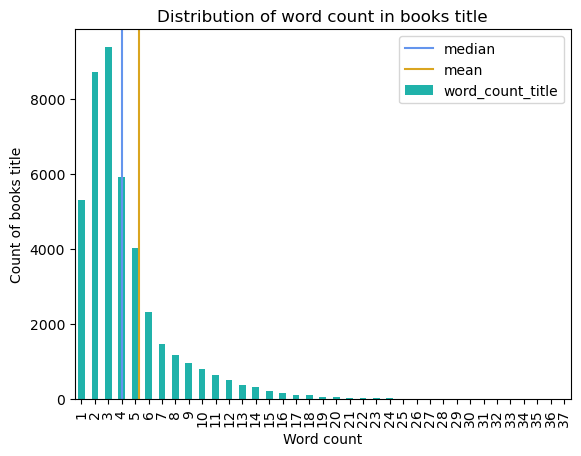

In [39]:
#plotting the values to look at the distribution
plt.figure()
books_df['word_count_title'].value_counts().sort_index().plot(kind='bar', color='lightseagreen')

#overplot mean and median
plt.axvline(books_df['word_count_title'].median(), color='cornflowerblue', label='median')
plt.axvline(books_df['word_count_title'].mean(), color='goldenrod', label='mean')

plt.title('Distribution of word count in books title')
plt.xlabel('Word count')
plt.ylabel('Count of books title')
plt.legend()

plt.show()

As expected, the distribution of the word count in the title is not normal, most titles are quite short (less than 5 words).

### 3.3 Convert 'Series' to boolean

Instead of showing which book series the book belongs to, we only want to know if the book is part of a series or not. We'll add a new boolean column, and drop the original one.

First, let's look at how many books are part of a series:

In [40]:
# Get the list of books that are part of a series
books_df['series'].notnull()

0         True
1         True
2         True
3        False
4         True
         ...  
42627     True
42628     True
42629     True
42630    False
42631     True
Name: series, Length: 42632, dtype: bool

In [41]:
# count of books that are part of a series
books_df['series'].notnull().sum()

20687

In [42]:
#in percentage
books_df['series'].notnull().sum()/books_df.shape[0]

0.48524582473259525

48.5% of the books are part of a series, or at least had the information about being part of a serie. Let's add that information to a new column that will be binary yes/no:

In [43]:
# Create a new column
books_df['is_series']=books_df['series'].notnull()
books_df['is_series']

0         True
1         True
2         True
3        False
4         True
         ...  
42627     True
42628     True
42629     True
42630    False
42631     True
Name: is_series, Length: 42632, dtype: bool

In [44]:
#check that it is the same as 'Series'
books_df['is_series'].sum()

20687

In [45]:
#Converting to binary
books_df['is_series']=books_df['is_series'].astype('int64')

We don't need the list of the series anymore, so we can drop that column.

In [46]:
#dropping the 'series' column
books_df.drop('series',axis=1,inplace=True)

In [47]:
#Checking the new shape
books_df.shape

(42632, 21)

The new shape has 42,632 rows and 21 columns.

### 3.4 Author

We can start exploring the author column by looking at the number of books by author.

In [48]:
# Author with the most popular books
books_df['author'].value_counts()

Nora Roberts (Goodreads Author)      85
Agatha Christie                      70
Stephen King (Goodreads Author)      63
Erin Hunter                          51
Meg Cabot (Goodreads Author)         49
                                     ..
A.G. Mogan (Goodreads Author)         1
Lynda Renham (Goodreads Author)       1
Mamoona Arshad (Goodreads Author)     1
Atticus Poetry (Goodreads Author)     1
Misty Moncur (Goodreads Author)       1
Name: author, Length: 22351, dtype: int64

Some authors are qualified as "Goodreads Author". We will remove this attribute as it doesn't add much to our analysis. It also seems that the author column can contain several names (illustrator, translator, etc.) Let's separate the authors and see what the new dataframe looks lie.

In [49]:
#Separate multiple authors
authors=books_df['author'].str.split(',', expand=True)
authors

,0,1,2,3,4,5,6,7,8,9
0,Suzanne Collins,None,None,None,None,None,None,None,None,None
1,J.K. Rowling,Mary GrandPré (Illustrator),None,None,None,None,None,None,None,None
2,Harper Lee,None,None,None,None,None,None,None,None,None
3,Jane Austen,Anna Quindlen (Introduction),None,None,None,None,None,None,None,None
4,Stephenie Meyer,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
42627,Cheri Schmidt (Goodreads Author),None,None,None,None,None,None,None,None,None
42628,Emma Michaels,None,None,None,None,None,None,None,None,None
42629,Kim Richardson (Goodreads Author),None,None,None,None,None,None,None,None,None
42630,Tom Pollack (Goodreads Author),John Loftus (Goodreads Author),Jim Alves,None,None,None,None,None,None,None


We see that the new data frame has 10 columns, which means that the books can have up to 10 authors listed.

In [50]:
#which books have 10 authors?
authors[authors[9].notnull()]

,0,1,2,3,4,5,6,7,8,9
7814,Harlan Ellison (Editor,Contributor),Michael Moorcock (Contributor),Isaac Asimov (Contributor),Lester del Rey (Contributor),Robert Silverberg (Contributor),Frederik Pohl (Contributor),Philip José Farmer (Contributor),Miriam Allen deFord (Contributor),more…
10511,John Joseph Adams (Goodreads Author) (Editor,Introduction),Stephen King (Goodreads Author) (Contributor),Robert J. Sawyer (Goodreads Author) (Contribu...,Michael Moorcock (Contributor),Sharyn McCrumb (Goodreads Author) (Contributor),Stephen Baxter (Contributor),Anne Perry (Contributor),Barbara Hambly (Goodreads Author) (Contributor),more…
17609,Matt Fraction (Writer),David Aja (Artist,#1-3),Javier Pulido (Artist,#4-5),Matt Hollingsworth (Color Artist),Annie Wu (Illustrator),Chris Eliopoulos (Letterer),Alan Davis (Penciler),Francesco Francavilla (Illustrator)
24392,Ken Bruen (Editor,Contributor),Eoin Colfer (Contributor),John Rickards (Contributor),Ken Wignall (Contributor),Laura Lippman (Goodreads Author) (Contributor),James O. Born (Goodreads Author) (Contributor),Sarah Weinman (Contributor),Gary Phillips (Contributor),more…
30424,Jan Edwards (Goodreads Author) (editor),Jenny Barber (editor),Anne Nicholls (contributor),Ian Whates (contributor),James Brogden (Goodreads Author) (contributor),Joyce Chng,(contributor),Zen Cho (Goodreads Author) (contributor),Adrian Tchaikovsky (Goodreads Author) (Contri...,more…
30997,David G. Hartwell (Editor,Contributor),Clifton Fadiman (Contributor),Kurt Vonnegut Jr. (Contributor),John W. Campbell Jr. (Contributor),J.G. Ballard (Contributor),Kono Tensei (Contributor),Theodore Sturgeon (Contributor),Karl Michael Armer (Contributor),more…
31462,David G. Hartwell (Editor,Contributor),Thomasz Mirkowicz (Translator),L.K. Conrad (Translator),Leland Fetzer (Translator),James Tiptree Jr. (Contributor),C.S. Lewis (Contributor),Edgar Pangborn (Contributor),H.G. Wells (Contributor),more…
32266,Harlan Ellison (Editor,Contributor),John Heidenry (Contributor),Ross Rocklynne (Contributor),Ursula K. Le Guin (Contributor),Andrew J. Offutt (Contributor),Gene Wolfe (Contributor),Ray Bradbury (Contributor),Chad Oliver (Contributor),more…
37153,Neil Gaiman (Goodreads Author) (Editor,Contributor),Larry Niven (Contributor),Samuel R. Delany (Contributor),Megan Kurashige (Contributor),Anthony Boucher (Contributor),Nalo Hopkinson (Contributor),Avram Davidson (Contributor),Peter S. Beagle (Goodreads Author) (Contributor),more…


In [51]:
#which books have 5 or more authors?
authors[authors[4].notnull()]

,0,1,2,3,4,5,6,7,8,9
13,Emily Brontë,Richard J. Dunn (Editor),David Timson (Narrator),Charlotte Brontë (Commentary),Robert Heindel (Illustrator),None,None,None,None,None
73,Leo Tolstoy,Aylmer Maude (Translator),Lev Tolstoi,Louise Maude (Translator),George Gibian (Preface),None,None,None,None,None
183,Suzanne Collins,Guillaume Fournier (Translator),Pilar Ramírez Tello (Goodreads Author) (Trans...,Hanna Hörl (Illustrator),Sylke Hachmeister (Translator),Peter Klöss (Translator),None,None,None,None
188,Charles Dickens,Philip Horne (Introduction),Gerald Dickens (Narrator),查尔斯·狄更斯,吴倩卓 (Translator),None,None,None,None,None
227,Arundhati Roy (Goodreads Author),Claude Demanuelli (Translator),Barbara Auer (Narrator),Diana Quick (Reading),Luana Stoica (trad.),Donada Peters (Narrator),Josep Julià Ballbé (Translator),None,None,None
...,...,...,...,...,...,...,...,...,...,...
42076,Alan Moore (Goodreads Author),Leah Moore (Goodreads Author),Chris Sprouse (Illustrator),Karl Story (Illustrator),Howard Chaykin (Illustrator),Shawn McManus (Illustrator),None,None,None,None
42197,Alan Moore (Goodreads Author),Tom Yeates (Illustrator),Rick Veitch (Illustrator),Stephen R. Bissette (Illustrator),Alfredo Alcalá (Illustrator),John Totleben (Illustrator),None,None,None,None
42240,Alan Moore (Goodreads Author),Stephen R. Bissette (Illustrator),John Totleben (Illustrator),Shawn McManus (Illustrator),Alfredo Alcalá (Artist),Ron Randall (Artist),Len Wein (Writer),Bernie Wrightson (Artist),None,None
42469,Aeschylus,Judith Affleck,Philip de May (Editor),Patricia E. Easterling (Introduction),John Harrison (Editor),None,None,None,None,None


It seems that only the first name listed, the main author, is relevant for our analysis. We'll keep only the first column, but first we need to also clean it up to remove anything that might be in parenthesis after the name. We'll split again the first column to move everything that is after the parenthesis to a new column.

In [52]:
#keeping only characters before the parenthesis
authors_final=authors[0].str.split('(',expand=True)

In [53]:
authors_final[0]

0        Suzanne Collins
1           J.K. Rowling
2             Harper Lee
3            Jane Austen
4        Stephenie Meyer
              ...       
42627     Cheri Schmidt 
42628      Emma Michaels
42629    Kim Richardson 
42630       Tom Pollack 
42631      Misty Moncur 
Name: 0, Length: 42632, dtype: object

Let's rerun the number of books by author again:

In [54]:
#checking the count again
authors_final[0].value_counts()

Nora Roberts        91
Stephen King        84
James Patterson     81
Agatha Christie     81
J.D. Robb           64
                    ..
Victoria Craven      1
Robert Mullin        1
Masami Tsuda         1
Azhan Ahsan          1
Misty Moncur         1
Name: 0, Length: 18639, dtype: int64

We see that Nora Roberts is still first, but now has 91 books instead of 85 earlier. Let's put the main author into a separate column in the dataframe.

In [55]:
# creating a new column in the original dataframe with only the main author and removing whitespaces
books_df['main_author']=authors_final[0].str.strip()

In [56]:
#Checking the author count again after removing the whitespaces
books_df['main_author'].value_counts()

Nora Roberts         91
Stephen King         84
James Patterson      82
Agatha Christie      82
Erin Hunter          70
                     ..
Dan Sullivan          1
Kat Kerr              1
Roderick MacLeish     1
Roger Connors         1
Misty Moncur          1
Name: main_author, Length: 18490, dtype: int64

We can now remove the column that had all the authors.

In [57]:
#dropping the column that has all the autors
books_df.drop('author',axis=1,inplace=True)

In [58]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42632 entries, 0 to 42631
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   book_id             42632 non-null  object 
 1   title               42632 non-null  object 
 2   avg_rating          42632 non-null  float64
 3   description         42123 non-null  object 
 4   isbn                42632 non-null  object 
 5   genres              42632 non-null  object 
 6   characters          42632 non-null  object 
 7   book_format         42186 non-null  object 
 8   edition             3853 non-null   object 
 9   pages               41301 non-null  object 
 10  publisher           40186 non-null  object 
 11  publish_date        42261 non-null  object 
 12  first_publish_date  25916 non-null  object 
 13  awards              42632 non-null  object 
 14  num_ratings         42632 non-null  int64  
 15  rating_by_stars     42632 non-null  object 
 16  sett

We can do some alaysis now on the author, like how many unique authors are there in the list, how many have more than 1 book?

In [59]:
#How many unique authors are there?
books_df['main_author'].nunique()

18490

In [60]:
#How many authors have more than 50 books?
sum(books_df['main_author'].value_counts()>50)

17

In [61]:
#How many authors have more than 1 book?
sum(books_df['main_author'].value_counts()>1)

6231

In [62]:
#Percentage of authors that have more than one book
sum(books_df['main_author'].value_counts()>1)/books_df['main_author'].nunique()*100

33.69929691725257

33% of authors have more than 1 book, but only 17 have more than 50 books. There are 18,490 unique authors listed.

In [63]:
#How many authors are unknown?
books_df['main_author'].str.contains('Unknown').sum()

8

In [64]:
#How many authors are anonymous?
books_df['main_author'].str.contains('Anonymous').sum()

58

In [65]:
# How many authors have digits in their names?
books_df['main_author'].str.contains('\d',regex=True).sum()

8

8 authors are unknown, 58 are anonymous, and 8 have digits in their names.

Since working with author names will be too complex, instead we want to add the book count by authors as a feature in our dataset. To do that, we will but the count by author in a data frame, then merge it on 'main_author' with the original dataframe.

In [66]:
#number of books by author
books_by_author=books_df['main_author'].value_counts().to_frame()
books_by_author.reset_index(inplace=True)
books_by_author.rename(columns={"index":"main_author","main_author":"book_count_by_author"},inplace=True)
books_by_author.head(10)

,main_author,book_count_by_author
0,Nora Roberts,91
1,Stephen King,84
2,James Patterson,82
3,Agatha Christie,82
4,Erin Hunter,70
5,J.D. Robb,64
6,Terry Pratchett,63
7,Francine Pascal,63
8,Carolyn Keene,59
9,Karen Kingsbury,57


In [67]:
#left join to add the book count by author
books_df=pd.merge(books_df,books_by_author,on='main_author',how='left')
books_df.head(3)

,book_id,title,avg_rating,description,isbn,genres,characters,book_format,edition,pages,...,first_publish_date,awards,num_ratings,rating_by_stars,setting,price,word_count_title,is_series,main_author,book_count_by_author
0,2767052-the-hunger-games,The Hunger Games,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,9.78044E+12,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",Hardcover,First Edition,374,...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...","['District 12, Panem', 'Capitol, Panem', 'Pane...",5.09,3,1,Suzanne Collins,12
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,4.50,There is a door at the end of a silent corrido...,9.78044E+12,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",Paperback,US Edition,870,...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",['Hogwarts School of Witchcraft and Wizardry (...,7.38,8,1,J.K. Rowling,24
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,4.28,The unforgettable novel of a childhood in a sl...,1E+13,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",Paperback,NaN,324,...,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...","['Maycomb, Alabama (United States)']",NaN,4,1,Harper Lee,2


Let's check that the merge worked properly by looking at the book count for a random author:

In [68]:
#sanity check
sum(books_df['main_author']=='James Patterson')

82

Does the book count affect star rating? We can do a scatter plot of star rating vs. book count to see if there is a linear relationship.

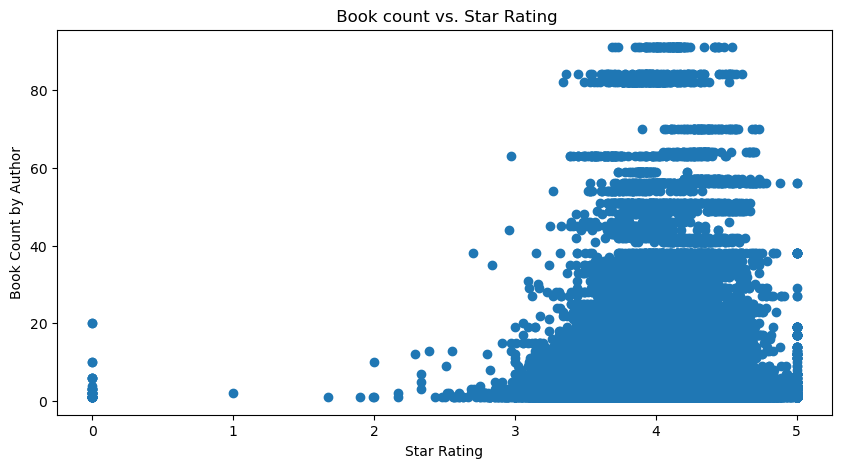

In [69]:
#scatter plot book count vs popularity
plt.figure(figsize=(10,5))
plt.scatter(books_df['avg_rating'],books_df['book_count_by_author'])
plt.title(" Book count vs. Star Rating")
plt.xlabel("Star Rating")
plt.ylabel("Book Count by Author")
plt.show()

It does not have a linear relationship, if fact it seems to follow losely the distribution of the star rating.

Let's look at the distribution of book count by author:

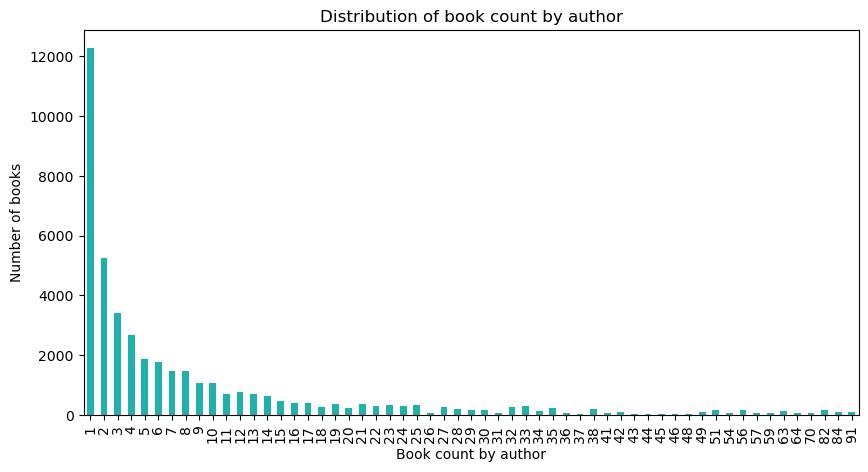

In [70]:
#plotting the book count by author
plt.figure()
books_df['book_count_by_author'].value_counts().sort_index().plot(kind='bar',figsize=(10,5),color='lightseagreen')
plt.title("Distribution of book count by author")
plt.xlabel("Book count by author")
plt.ylabel("Number of books")
plt.show()

Before we move on, let's look at the author's names:

In [71]:
#check the authors' name
books_df['main_author'].value_counts().sort_index(ascending=False)[0:20]

天野しゅにんた                                          1
墨香铜臭                                             1
இளங்கோ அடிகள்                                    1
محمد ناصر الدين الألباني                         1
محمد عبدالرحمن العريفي                           3
محمد خليل هراس                                   1
محمد بن عبد الوهاب Muhammad bin Abdul-Wahhab     1
محمد بن صالح العثيمين                            2
فيليب كاردينال                                   1
حسین محی‌الدین الهی قمشه‌ای                      1
ابن كثير                                         6
ابن تيمية                                        1
ابن النفيس                                       1
ʻAbd Allāh al-Ṣāliḥ ʻUthaymīn                    1
Đặng Thùy Trâm                                   1
Étienne de La Boétie                             1
Éric-Emmanuel Schmitt                            1
Émile Zola                                      11
Émile Durkheim                                   1
Éliphas Lévi                   

Some of the other's name are in non-Roman alphabet - to simplify the analysis and limit the risk of error, we will remove the 21 rows that have authors with non-roman alphabets. We'll follow the same steps as earlier: put the indexes of the rows to delete into a list, loop over the list of indices to drop them, and reset the index of the dataset.

In [72]:
# add the authors of the books we want to drop to a list
authors=books_df['main_author'].value_counts().sort_index(ascending=False)[0:13].to_frame().index
authors

Index(['天野しゅにんた', '墨香铜臭', 'இளங்கோ அடிகள்', 'محمد ناصر الدين الألباني',
       'محمد عبدالرحمن العريفي', 'محمد خليل هراس',
       'محمد بن عبد الوهاب Muhammad bin Abdul-Wahhab', 'محمد بن صالح العثيمين',
       'فيليب كاردينال', 'حسین محی‌الدین الهی قمشه‌ای', 'ابن كثير',
       'ابن تيمية', 'ابن النفيس'],
      dtype='object')

In [73]:
#checking that the total number of rows is 21
books_df['main_author'].isin(authors).sum()

21

In [74]:
#Getting the list of index to drop
index_drop=books_df[books_df['main_author'].isin(authors)].index
index_drop

Int64Index([12790, 18469, 20964, 22551, 27398, 28080, 29898, 30380, 31453,
            31772, 35103, 36820, 36867, 37763, 37917, 38356, 39417, 39522,
            39745, 40037, 40136],
           dtype='int64')

In [75]:
#dropping the rows
books_df.drop(index_drop,axis=0,inplace=True)

In [76]:
#resetting the index
books_df.reset_index(drop=True,inplace=True)

In [77]:
#checking that the last index is now 42,631-21=42,610
books_df.index[-1]

42610

We are expecting the last index to be 42,610 and it is. Let's look at the list name again to make sure it looks good.

In [78]:
#check the authors' name again
books_df['main_author'].value_counts().sort_index(ascending=False)[0:20]

ʻAbd Allāh al-Ṣāliḥ ʻUthaymīn     1
Đặng Thùy Trâm                    1
Étienne de La Boétie              1
Éric-Emmanuel Schmitt             1
Émile Zola                       11
Émile Durkheim                    1
Éliphas Lévi                      1
Åsne Seierstad                    2
Álex Rovira Celma                 1
Ágota Kristóf                     1
yoyopay                           1
writerbug44                       1
wendy madocks                     1
thefreakoffreaks                  1
serenity finlay                   1
pleasefindthis                    3
lettered                          1
kkat                              1
celia                             1
ash mackinnon                     1
Name: main_author, dtype: int64

Great. Let's move on to the next category.

### 3.5 Checking for Duplicated Titles & Author

Let's check if there any any books that have several entries for the same Title & Author. To do that, we'll create a concatenated field that has title + author, and look at duplicated.

In [79]:
#Creating a concatenated field
books_df['main_author']+"-"+books_df['title']

0                         Suzanne Collins-The Hunger Games
1        J.K. Rowling-Harry Potter and the Order of the...
2                         Harper Lee-To Kill a Mockingbird
3                          Jane Austen-Pride and Prejudice
4                                 Stephenie Meyer-Twilight
                               ...                        
42606                              Cheri Schmidt-Fractured
42607                                Emma Michaels-Anasazi
42608                                Kim Richardson-Marked
42609                              Tom Pollack-Wayward Son
42610                     Misty Moncur-Daughter of Helaman
Length: 42611, dtype: object

In [80]:
#How many books have the same author & title?
(books_df['main_author']+"-"+books_df['title']).duplicated().sum()

40

40 books have the same title and author. Let's look at the list.

In [81]:
#getting the list of duplicated books
books_df[(books_df['main_author']+"-"+books_df['title']).duplicated()]

,book_id,title,avg_rating,description,isbn,genres,characters,book_format,edition,pages,...,first_publish_date,awards,num_ratings,rating_by_stars,setting,price,word_count_title,is_series,main_author,book_count_by_author
2767,9814682-a-song-of-ice-and-fire,A Song of Ice and Fire,4.63,George R. R. Martin's A Song of Ice and Fire s...,9.78035E+12,"['Fantasy', 'Fiction', 'Epic Fantasy', 'Advent...",[],Mass Market Paperback,4-Book Boxed Set,4081,...,2001-01-11,[],44894,"['32256', '9608', '2253', '506', '271']",[],12.24,6,1,George R.R. Martin,34
3487,5413._Salem_s_Lot,'Salem's Lot,4.25,"Stephen King's second novel, the vampire bests...",9.78039E+12,"['Horror', 'Fiction', 'Vampires', 'Fantasy', '...",[],Hardcover,Illustrated Edition,594,...,10/17/75,[],94874,"['45186', '31994', '14804', '2313', '577']",[],23.39,2,0,Stephen King,84
5658,12708927-vampire-academy,Vampire Academy,4.52,Enter the complete saga of the international #...,9.78178E+12,"['Fantasy', 'Young Adult', 'Vampires', 'Romanc...",[],Paperback,NaN,2688,...,08/20/10,[],7706,"['5142', '1705', '665', '131', '63']",[],NaN,2,1,Richelle Mead,33
6503,15796908-little-women,Little Women,4.04,"Includes character guide, which-March-girl-are...",9.7801E+12,"['Classics', 'Fiction', 'Young Adult', 'Histor...","['Meg March', 'Jo March', 'Beth March', 'Amy M...",Paperback,NaN,417,...,09/30/68,[],9483,"['3378', '3703', '1915', '378', '109']","['Concord, Massachusetts (United States)']",4.08,2,1,Louisa May Alcott,12
7032,7148787-remember-me,Remember Me,4.13,"Shari Cooper hadn't planned on dying, but four...",9.78144E+12,"['Young Adult', 'Paranormal', 'Fantasy', 'Horr...",[],Paperback,NaN,789,...,NaN,[],8890,"['4251', '2410', '1555', '499', '175']",[],0.85,2,1,Christopher Pike,32
7784,11872688-vampire-academy,Vampire Academy,4.64,NaN,9.78178E+12,"['Fantasy', 'Young Adult', 'Romance', 'Vampire...",[],Paperback,NaN,1381,...,NaN,[],2502,"['1907', '388', '145', '36', '26']",[],NaN,2,1,Richelle Mead,33
8497,452235.The_Firm,The Firm,4.09,"At the top of his class at Harvard Law, he had...",9.78044E+12,"['Fiction', 'Thriller', 'Mystery', 'Crime', 'L...","['Denton Voyles', 'Mitchell Y. ""Mitch"" McDeere...",Mass Market Paperback,NaN,501,...,02/28/91,[],42701,"['16264', '16594', '7798', '1570', '475']","['Memphis, Tennessee (United States)']",3.42,2,0,John Grisham,33
8735,13647958-the-dark-god-s-bride,The Dark God's Bride,3.65,An ancient god on a destructive path of vengea...,B0082LYB68,"['Paranormal', 'Romance', 'Paranormal Romance'...",[],Kindle Edition,1st edition,187,...,NaN,[],1340,"['379', '424', '328', '111', '98']",[],NaN,4,1,Dahlia Lu,6
10247,10571.The_Once_and_Future_King,The Once and Future King,4.02,T.H. White’s masterful retelling of the Arthur...,9.78001E+12,"['Fantasy', 'Classics', 'Fiction', 'Historical...",[],Paperback,NaN,823,...,10/29/77,[],3937,"['1547', '1333', '727', '237', '93']",[],3.35,5,1,T.H. White,6
11127,26008216-limits-of-destiny,Limits of Destiny,4.32,The detonation of a bomb in Kraftberg’s hotel ...,B012ELKRF0,"['Contemporary Romance', 'Romance', 'Adult Fic...",[],Kindle Edition,NaN,189,...,NaN,[],184,"['107', '43', '24', '6', '4']",[],NaN,3,1,Sharlyn G. Branson,5


We can pick on random book in the list to understand why it is duplicated.

In [82]:
#checking one random book:
books_df[['title','main_author','is_series','num_ratings']][books_df['title']=='The Princess Diaries']

,title,main_author,is_series,num_ratings
1108,The Princess Diaries,Meg Cabot,1,233422
29268,The Princess Diaries,Meg Cabot,1,624


It seems that the duplicated books could be either different books from a same series, or just same books with 2 different entries.
Since there are only 40 duplicated books (0.09% of total), we can just delete them and keep the version that has the most num_ratings since we are interested in analysis the popularity of the book.

Since drop.duplicates keep by default the first value, we can sort the data frame by num_rating to ensure the highest value is first.

In [83]:
#sorting the dataframe by num_rating
books_df.sort_values('num_ratings', ascending=False,inplace=True)
books_df.head()

,book_id,title,avg_rating,description,isbn,genres,characters,book_format,edition,pages,...,first_publish_date,awards,num_ratings,rating_by_stars,setting,price,word_count_title,is_series,main_author,book_count_by_author
32,3.Harry_Potter_and_the_Sorcerer_s_Stone,Harry Potter and the Sorcerer's Stone,4.47,Harry Potter's life is miserable. His parents ...,1E+13,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...","['Draco Malfoy', 'Ron Weasley', 'Petunia Dursl...",Hardcover,Library Edition,309,...,06/26/97,"[""Mythopoeic Fantasy Award for Children's Lite...",7048471,"['4578137', '1611874', '600384', '139551', '11...","['London, England', 'Hogwarts School of Witchc...",NaN,6,1,J.K. Rowling,24
0,2767052-the-hunger-games,The Hunger Games,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,9.78044E+12,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",Hardcover,First Edition,374,...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...","['District 12, Panem', 'Capitol, Panem', 'Pane...",5.09,3,1,Suzanne Collins,12
4,41865.Twilight,Twilight,3.60,About three things I was absolutely positive.\...,9.78032E+12,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",Paperback,NaN,501,...,2010-05-05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...","['Forks, Washington (United States)', 'Phoenix...",2.1,1,1,Stephenie Meyer,14
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,4.28,The unforgettable novel of a childhood in a sl...,1E+13,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",Paperback,NaN,324,...,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...","['Maycomb, Alabama (United States)']",NaN,4,1,Harper Lee,2
27,4671.The_Great_Gatsby,The Great Gatsby,3.92,Alternate Cover Edition ISBN: 0743273567 (ISBN...,1E+13,"['Classics', 'Fiction', 'School', 'Literature'...","['Nick Carraway', 'Jay Gatsby', 'Daisy Buchana...",Paperback,US / CAN,200,...,2004-10-25,['Grammy Award Nominee for Best Spoken Word Al...,3775504,"['1345866', '1266424', '798955', '252115', '11...","['New York City, New York (United States)', 'N...",NaN,3,0,F. Scott Fitzgerald,10


Now that the dataframe is sorted, we can remove the duplicates.

In [84]:
#Remove duplicates
books_df.drop_duplicates(subset=['title','main_author'],inplace=True)

Let's check that it worked by looking at the same random book as before:

In [85]:
#Check
books_df[['title','num_ratings']][books_df['title']=='The Princess Diaries']

,title,num_ratings
1108,The Princess Diaries,233422


Now we reorder the dataset in its original order using the index, then reset the index.

In [86]:
#checking the shape of the new dataframe, expect 42,611 - 40 = 42571 rows
books_df.shape

(42571, 22)

In [87]:
#reorder in the original order, expecting last index to be 42,610
books_df.sort_index(inplace=True)
books_df.index[-1]

42610

In [88]:
#resetting the index, expecting the last index to be 42,571
books_df.reset_index(drop=True,inplace=True)
books_df.index[-1]

42570

We now have 42,570 rows.

In [89]:
#What is next?
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42571 entries, 0 to 42570
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   book_id               42571 non-null  object 
 1   title                 42571 non-null  object 
 2   avg_rating            42571 non-null  float64
 3   description           42064 non-null  object 
 4   isbn                  42571 non-null  object 
 5   genres                42571 non-null  object 
 6   characters            42571 non-null  object 
 7   book_format           42128 non-null  object 
 8   edition               3841 non-null   object 
 9   pages                 41242 non-null  object 
 10  publisher             40127 non-null  object 
 11  publish_date          42201 non-null  object 
 12  first_publish_date    25887 non-null  object 
 13  awards                42571 non-null  object 
 14  num_ratings           42571 non-null  int64  
 15  rating_by_stars    

We are going to skip rating for now and keep going with the categorical columns.

### 3.6 Description

We check the number of null values as usual.

In [90]:
# How many null values
books_df['description'].isna().sum()

507

In [91]:
# What is it in percentage of the total number of books?
books_df['description'].isna().sum()/books_df.shape[0]*100

1.1909515867609406

Since we want to use the description as part of our NLP modelling, we cannot keep null values or "Unknown". Considering that they represent only 1.19% of the total, we decide to drop them.

In [92]:
#Dropping na
books_df.dropna(subset=['description'],inplace=True)

In [93]:
#Checking
books_df['description'].isna().sum()

0

In [94]:
#Checking the new shape, expecting 42571-507=42,064
books_df.shape

(42064, 22)

All of the null values are gone, we have 42,064 rows now. We reset the index.

In [95]:
#reset the index, expecting last index to be 42063
books_df.reset_index(drop=True,inplace=True)
books_df.index[-1]

42063

Now that the column is clean, we can do some analysis, like the word count and its distribution.

In [96]:
#How long are the descriptions (in words)?
word_count_description=books_df['description'].apply(lambda n:len(n.split()))
word_count_description.describe()

count    42064.000000
mean       145.122337
std         88.020626
min          1.000000
25%         90.000000
50%        135.000000
75%        183.000000
max       3583.000000
Name: description, dtype: float64

The average description has 145 words, the longest description is 3,583 words and the shortest is one word.

How many books only have a one word description? Let's first add the number of words to the dataframe.

In [97]:
#adding a new column 'words_description'
books_df['word_count_description']=books_df['description'].apply(lambda n: len(n.split()))

In [98]:
#checking that the column got added
books_df.head(1)

,book_id,title,avg_rating,description,isbn,genres,characters,book_format,edition,pages,...,awards,num_ratings,rating_by_stars,setting,price,word_count_title,is_series,main_author,book_count_by_author,word_count_description
0,2767052-the-hunger-games,The Hunger Games,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,9.78044E+12,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",Hardcover,First Edition,374,...,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...","['District 12, Panem', 'Capitol, Panem', 'Pane...",5.09,3,1,Suzanne Collins,12,147


In [99]:
# Which books have a one word description?
books_df[books_df['word_count_description']==1]

,book_id,title,avg_rating,description,isbn,genres,characters,book_format,edition,pages,...,awards,num_ratings,rating_by_stars,setting,price,word_count_title,is_series,main_author,book_count_by_author,word_count_description
7019,568454.D_Gray_man_Vol_1,"D.Gray-man, Vol. 1",4.20,AKUMAとは『機械』と『魂』と『悲劇』を材料に造まれる悲しき悪性兵器。そのAKUMAを製造...,9.78142E+12,"['Manga', 'Fantasy', 'Graphic Novels', 'Comics...","['Allen Walker', 'Yu Kanda', 'Lenalee Lee', 'L...",Paperback,NaN,196,...,[],27542,"['14165', '7256', '4187', '1257', '677']",[],3.16,3,1,Katsura Hoshino,3,1
16008,6526143-dream-reachers,Dream Reachers,4.70,#NAME?,9.78098E+12,[],[],Paperback,NaN,476,...,[],10,"['9', '0', '0', '1', '0']",[],14.38,2,0,Chase Von,1,1
17639,26208458-the-rift-war,The Rift War,3.57,Discontinued,9.78151E+12,"['Science Fiction', 'Fantasy']","['Lanrete ""Paragon""', 'Marcus ""Tempest"" Henson...",Paperback,NaN,562,...,[],30,"['8', '12', '3', '3', '4']",[],NaN,3,0,Emmanuel M. Arriaga,1,1
18637,11928859-diary-of-a-wimpy-kid,Diary of a Wimpy Kid: #1-5 [Box Set],4.44,#NAME?,9.78014E+12,"['Young Adult', 'Graphic Novels', 'Kids', 'Rea...",[],Paperback,NaN,912,...,[],1786,"['1247', '280', '137', '50', '72']",[],19.44,8,1,Jeff Kinney,16,1
20588,769080.The_Mustard_Seed,The Mustard Seed: The Gnostic Teachings of Jes...,4.45,update,9.78001E+12,"['Spirituality', 'Nonfiction', 'Philosophy', '...",[],Paperback,NaN,512,...,[],426,"['268', '104', '37', '11', '6']",[],10.69,10,0,Osho,20,1
20591,7151337-the-decision-is-yours,The Decision is Yours,4.64,Religious,1E+13,[],[],NaN,NaN,NaN,...,[],11,"['9', '1', '0', '1', '0']",[],NaN,4,0,Tawfiq Al Refaie,1,1
21220,6006715-brimstone,Brimstone,4.01,Brimstone,9.7804E+12,"['Westerns', 'Fiction', 'Historical Fiction', ...","['Virgil Cole', 'Everett Hitch']",Hardcover,NaN,293,...,[],3955,"['1234', '1694', '874', '129', '24']",['New Mexico Territory (United States)'],6.18,1,1,Robert B. Parker,11,1
21228,6694.The_Giraffe_and_the_Pelly_and_Me,The Giraffe and the Pelly and Me,3.82,キリンとサルとペリカン。おかしな、へんてこりんな3人ぐみだよ!,9.78014E+12,"['Childrens', 'Fiction', 'Fantasy', 'Classics'...","['Giraffe', 'Pelly', 'Billy']",Paperback,NaN,32,...,[],22962,"['6470', '7804', '6964', '1467', '257']",[],1.46,7,0,Roald Dahl,30,1
23894,12017247-live-with-lightning,Live With Lightning,3.96,novel,1E+13,[],[],Hardcover,NaN,404,...,[],52,"['21', '14', '11', '6', '0']",[],NaN,3,0,Mitchell Wilson,1,1
23927,25657509-train-your-brain,Train Your Brain,3.84,New,9.78818E+12,"['Nonfiction', 'Psychology', 'Science', 'Self ...",[],Paperback,NaN,99,...,[],135,"['50', '38', '30', '10', '7']",[],3.47,3,0,Ryuta Kawashima,1,1


Only 17 rows have a one word description, but also seem to not mean much, like #NAME, Discontinued, etc. We will drop them as well. What about the 2 words description?

In [100]:
books_df[(books_df['word_count_description']==2)]

,book_id,title,avg_rating,description,isbn,genres,characters,book_format,edition,pages,...,awards,num_ratings,rating_by_stars,setting,price,word_count_title,is_series,main_author,book_count_by_author,word_count_description
10237,6436869-the-work-and-the-glory-9-volumes,The Work and the Glory 9 volumes,4.51,Historical Fiction,1E+13,"['Historical Fiction', 'Lds Fiction', 'Lds', '...",[],NaN,NaN,NaN,...,[],298,"['189', '80', '24', '3', '2']",[],NaN,7,0,Gerald N. Lund,3,2
16763,8362878-sun-stand-still,Sun Stand Still: What Happens When You Dare to...,4.19,Rare book,9.7816E+12,"['Christian', 'Nonfiction', 'Faith', 'Spiritua...",[],Paperback,NaN,240,...,[],3866,"['1905', '1146', '565', '156', '94']",[],2.36,14,0,Steven Furtick,1,2
19332,9681425-jim-butcher-box-set,Jim Butcher Box Set,4.48,Book by,9.78045E+12,"['Fantasy', 'Urban Fantasy', 'Fiction', 'Myste...",['Harry Dresden'],Mass Market Paperback,NaN,1 page,...,[],2368,"['1475', '626', '218', '33', '16']",[],46.7,4,1,Jim Butcher,36,2
21148,3373625-fools-die,Fools Die,3.72,Fools Die,9.7804E+12,"['Fiction', 'Crime', 'Thriller', 'Mystery', 'N...",[],Hardcover,NaN,572,...,[],5909,"['1544', '1955', '1779', '492', '139']",[],3.33,2,0,Mario Puzo,6,2
23328,1165925.Warrior_Chicks,"Warrior Chicks: Rising Strong, Beautiful and C...",4.15,VERY-GOOD TRADE-PAPERBACK,9.78083E+12,"['Nonfiction', 'Christian', 'Christian Living'...",[],Paperback,NaN,208,...,[],173,"['83', '52', '23', '11', '4']",[],2.92,7,0,Holly Wagner,1,2
28507,19386296-strange-love,Strange Love,4.88,Paranormal Romance.,1E+13,[],[],Paperback,NaN,219,...,[],8,"['7', '1', '0', '0', '0']",[],NaN,2,0,JoLynne Valerie,4,2
28870,156990.Avatar_Volume_4,Avatar Volume 4: The Last Airbender,4.57,Book by,9.7816E+12,"['Manga', 'Graphic Novels', 'Fantasy', 'Comics...",[],Graphic Novels,NaN,96,...,[],548,"['385', '114', '34', '9', '6']",[],35.75,6,1,Michael Dante DiMartino,10,2
30687,685979.Sleeping_Arrangements,Sleeping Arrangements,3.87,Sleeping Arrangements,9.78157E+12,"['Memoir', 'Nonfiction', 'Autobiography', 'Bio...",[],Paperback,NaN,240,...,[],695,"['210', '239', '196', '43', '7']",[],4.55,2,0,Laura Shaine Cunningham,1,2
31222,366579.If_I_Had_My_Life_to_Live_Over_I_Would_P...,If I Had My Life to Live Over I Would Pick Mor...,3.74,Vintage softcover,9.78092E+12,"['Poetry', 'Short Stories', 'Nonfiction', 'Mem...",[],Paperback,NaN,205,...,[],247,"['65', '84', '73', '19', '6']",[],2.91,13,0,Sandra Martz,2,2
32265,866134.A_Second_Chance_at_Eden,A Second Chance at Eden,4.03,Science Fiction.,9.78045E+12,"['Science Fiction', 'Fiction', 'Short Stories'...",[],Paperback,NaN,432,...,[],4549,"['1438', '1983', '979', '118', '31']",[],4.43,5,1,Peter F. Hamilton,23,2


It's not the best description, but at least they mean something. We'll leave them.

Let's replace drop the one word descriptions now.

In [101]:
#Replace one-word description by NaN
books_df['description']=np.where(books_df['word_count_description']==1,np.nan,books_df['description'])

In [102]:
#Checking NaN
books_df['description'].isna().sum()

17

In [103]:
#Dropping na
books_df.dropna(subset=['description'],inplace=True)

In [104]:
#resetting index
books_df.reset_index(drop=True,inplace=True)

In [105]:
#Checking shape and last index
print(books_df.shape)
print(books_df.index[-1])

(42047, 23)
42046


We can now look at the distribution of the word-count.

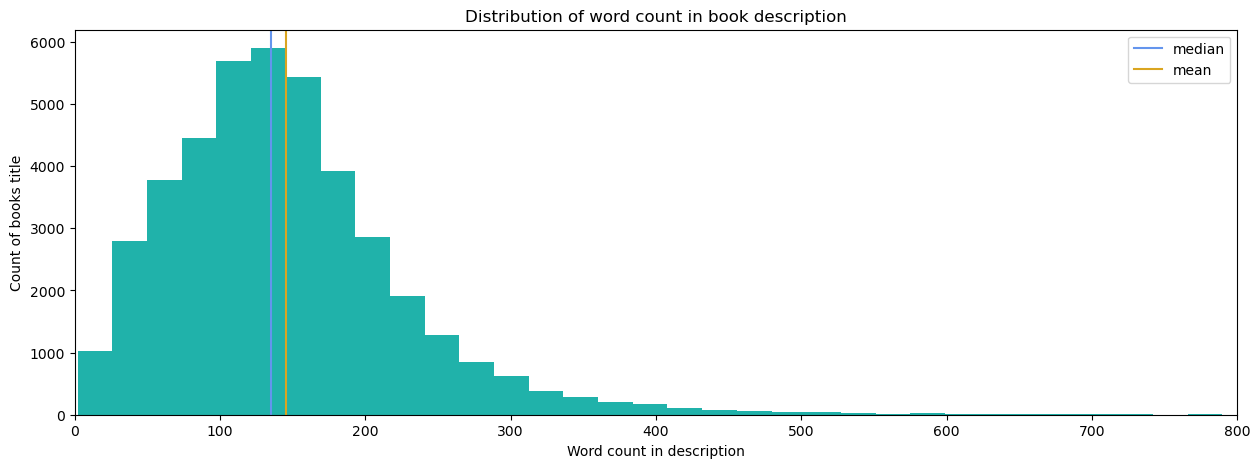

In [106]:
#plotting the values to look at the distribution
plt.figure(figsize=[15,5])
plt.hist(books_df['word_count_description'],bins=150, color='lightseagreen')
plt.xlim(0,800) #disregard outliers > 800 for plotting purposes

#overplot mean and median
plt.axvline(books_df['word_count_description'].median(), color='cornflowerblue', label='median')
plt.axvline(books_df['word_count_description'].mean(), color='goldenrod', label='mean')

plt.title('Distribution of word count in book description')
plt.xlabel('Word count in description')
plt.ylabel('Count of books title')
plt.legend()

plt.show()

The distribution is fairly normal around the mean, with a bit of a right tail, as expected since longer descriptions are less common.

In [107]:
#What's next?
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42047 entries, 0 to 42046
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   book_id                 42047 non-null  object 
 1   title                   42047 non-null  object 
 2   avg_rating              42047 non-null  float64
 3   description             42047 non-null  object 
 4   isbn                    42047 non-null  object 
 5   genres                  42047 non-null  object 
 6   characters              42047 non-null  object 
 7   book_format             41642 non-null  object 
 8   edition                 3800 non-null   object 
 9   pages                   40806 non-null  object 
 10  publisher               39665 non-null  object 
 11  publish_date            41705 non-null  object 
 12  first_publish_date      25649 non-null  object 
 13  awards                  42047 non-null  object 
 14  num_ratings             42047 non-null

### 3.7 ISBN

We start by looking at the null values.

In [108]:
#Checking null values
books_df['isbn'].isna().sum()

0

There are none. How many unqiue values are there? We expect to have the same as the number of rows.

In [109]:
#How many unique values
books_df['isbn'].nunique()

4247

There are 4247 unique ISBN number for 42,047 books.... ISBN is supposed to be a unique number, but it isn't the case here, which makes us wonder the use of this column. Let's look at the value count:

In [110]:
#Checking the value count
books_df['isbn'].value_counts()

1E+13          2311
9.78006E+12    2311
9.78014E+12    1294
9.78045E+12    1287
9.78055E+12    1142
               ... 
B018FNBDOK        1
B012B9L0DI        1
B00Y0HIIWQ        1
B00TE3PKQI        1
B005IGOSCC        1
Name: isbn, Length: 4247, dtype: int64

The data type is set as an integer, but it really should be a string. However we won't be to use this column in or analysis as a string, and it doesn't add much value to our analysis anyway. We decide to drop the column.

In [111]:
#Dropping ISBN
books_df.drop('isbn',axis=1,inplace=True)

In [112]:
#Checking the new shape
books_df.shape

(42047, 22)

The new shape is 42,047 rows and 22 columns.

In [113]:
#Next
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42047 entries, 0 to 42046
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   book_id                 42047 non-null  object 
 1   title                   42047 non-null  object 
 2   avg_rating              42047 non-null  float64
 3   description             42047 non-null  object 
 4   genres                  42047 non-null  object 
 5   characters              42047 non-null  object 
 6   book_format             41642 non-null  object 
 7   edition                 3800 non-null   object 
 8   pages                   40806 non-null  object 
 9   publisher               39665 non-null  object 
 10  publish_date            41705 non-null  object 
 11  first_publish_date      25649 non-null  object 
 12  awards                  42047 non-null  object 
 13  num_ratings             42047 non-null  int64  
 14  rating_by_stars         42047 non-null

### 3.8 Genres

From info, we see that there aren't any null values. Let's look a bit more into it.

In [114]:
books_df['genres'][0:5]

0    ['Young Adult', 'Fiction', 'Dystopia', 'Fantas...
1    ['Fantasy', 'Young Adult', 'Fiction', 'Magic',...
2    ['Classics', 'Fiction', 'Historical Fiction', ...
3    ['Classics', 'Fiction', 'Romance', 'Historical...
4    ['Young Adult', 'Fantasy', 'Romance', 'Vampire...
Name: genres, dtype: object

The format of genres is a string. Let's turn it into a list, but we'll put this list in a new column for now in case we need the string to perform some searches. [This article](https://towardsdatascience.com/dealing-with-list-values-in-pandas-dataframes-a177e534f173) was really useful to help us deal with lists in Pandas dataframe.

In [115]:
#Creating a new column with genres as a list
books_df['genres_list']=books_df['genres'].apply(eval)

In [116]:
#Looking at the new format
books_df['genres_list'][0:5]

0    [Young Adult, Fiction, Dystopia, Fantasy, Scie...
1    [Fantasy, Young Adult, Fiction, Magic, Childre...
2    [Classics, Fiction, Historical Fiction, School...
3    [Classics, Fiction, Romance, Historical Fictio...
4    [Young Adult, Fantasy, Romance, Vampires, Fict...
Name: genres_list, dtype: object

This new column is now is a list format. We can do basic operations, like looking at the rows that do not have any elements in the list.

In [117]:
#Finding the rows that do not have any elements in the list
sum(books_df['genres_list'].str.len()==0)

2568

In [118]:
#in percentage
sum(books_df['genres_list'].str.len()==0)/books_df.shape[0]*100

6.107451185578044

6.1% of the data does not have any genre listed. In fact, we will had the count of genres listed in a new column.

In [119]:
#Creating a column with the number of elements in the list (i.e number of genres listed)
books_df['genres_count']=books_df['genres_list'].apply(len)
books_df['genres_count']

0        10
1        10
2        10
3        10
4        10
         ..
42042    10
42043     2
42044    10
42045    10
42046    10
Name: genres_count, Length: 42047, dtype: int64

In [120]:
# What's the most genres that a book has? What is it in proportion of the total?
books_df['genres_count'].value_counts(normalize=True)*100

10    73.907770
0      6.107451
1      2.751683
4      2.221324
5      2.214189
6      2.180893
2      2.180893
8      2.173758
3      2.171380
9      2.159488
7      1.931172
Name: genres_count, dtype: float64

74% of the books have 10 genres listed, and 6% have no genre listed at all.

In order to perform some analysis on the different genres, we will turn the lists into a series instead.

In [121]:
#Create a function to turn list into a 1D array

def to_1D(series):
    """
    Turn a series of lists into a series of invidual items in the list
    -----
    Input: series of lists
    Output: a series of individual items
    
    Example:
    Input: [cat,dog,bird],[cat,elephant,girafe]
    Output: cat,dog,bird,cat,elephant,girafe
    """
    return pd.Series([x for _list in series for x in _list])

In [122]:
#Creating a series with the genres
genres_df=to_1D(books_df['genres_list'])
genres_df.head()

0        Young Adult
1            Fiction
2           Dystopia
3            Fantasy
4    Science Fiction
dtype: object

In [123]:
#Counting how many unique genres
genres_df.nunique()

966

In [124]:
#Calculating how many genre tags there are in total through the dataset
sum(genres_df.value_counts())

351551

There are 966 unique genres and 351,551 genre tags through the whole dataset. That's a lot. For our modelling, we want to turn the genres into boolean columns, for example 'Fiction' True or False. Since we cannot do that with 966 different genres, let's try to reduce to list to 20-30. We look at the most mentioned genres:

In [125]:
#top 30 most mentioned genres
genres_df.value_counts(normalize=True)[0:30]*100

Fiction                    7.665460
Romance                    3.858331
Fantasy                    3.815378
Young Adult                2.990178
Contemporary               2.574875
Adult                      2.145066
Mystery                    1.976954
Nonfiction                 1.916080
Historical Fiction         1.876541
Audiobook                  1.861181
Adventure                  1.653245
Novels                     1.642151
Paranormal                 1.600621
Historical                 1.585545
Classics                   1.545437
Science Fiction            1.386996
Childrens                  1.276060
Literature                 1.205231
Thriller                   1.152322
Magic                      1.122739
Humor                      1.036265
Contemporary Romance       0.938413
Crime                      0.935284
Urban Fantasy              0.926466
Suspense                   0.909683
Science Fiction Fantasy    0.877255
Middle Grade               0.867868
Chick Lit                  0

In [126]:
#Calculating the proportion of the top 30 genres
sum(genres_df.value_counts()[0:30])/sum(genres_df.value_counts())*100

53.9130880014564

The most mentioned genre is Fiction. 

We saw above that the top 30 genres represent 54% of all the genre tags. We also saw that some genres have variations of the same word, like 'Fiction', 'Historical Fiction', 'American Fiction'. 

Let's look at all the genres that have Fiction in them.

In [127]:
#Finding all the genres with 'Fiction' in it
genres_df[genres_df.str.contains('Fiction')].unique()

array(['Fiction', 'Science Fiction', 'Science Fiction Fantasy',
       'Historical Fiction', 'Christian Fiction', 'Realistic Fiction',
       'Adult Fiction', 'Literary Fiction', 'Biblical Fiction',
       'Speculative Fiction', 'Military Fiction', 'Animal Fiction',
       'Weird Fiction', 'Womens Fiction', 'Christian Non Fiction',
       'Lds Non Fiction', 'Young Adult Historical Fiction',
       'Christian Historical Fiction', 'Fan Fiction',
       'Young Adult Science Fiction', 'Science Fiction Romance',
       'Hard Science Fiction', 'Lds Fiction', 'Military Science Fiction',
       'American Fiction', 'Lesbian Fiction', 'Gay Fiction',
       'Bizarro Fiction', 'Climate Change Fiction', 'Slash Fiction',
       'Amish Fiction', 'Naval Historical Fiction',
       'Christian Contemporary Fiction', 'M M Science Fiction'],
      dtype=object)

In [128]:
#How many different type of fiction?
genres_df[genres_df.str.contains('Fiction')].nunique()

34

There are 34 genres that have Fiction in their name!

In [129]:
#Finding all the genres with 'Young Adult' in it
genres_df[genres_df.str.contains('Young Adult')].unique()

array(['Young Adult', 'Young Adult Fantasy', 'Young Adult Contemporary',
       'Young Adult Romance', 'Young Adult Paranormal',
       'Young Adult Historical Fiction', 'Young Adult Science Fiction',
       'M M Young Adult'], dtype=object)

In [130]:
#How many different type of young adult?
genres_df[genres_df.str.contains('Young Adult')].nunique()

8

And 8 genres have Young Adult in their name. Most of the times though, books that are tagged 'Young Adult Fantasy' will also have a tag 'Yound adult' and a tag 'Fantasy'. We decide to not spend too much time on those variations of genres, and focus on the main ones.

In [131]:
#Expanding the column width
pd.options.display.max_colwidth=150

Since we're going to limit the list of genres, we want to make sure that the books that have only 1 genre listed are included in that list.

In [132]:
#How many books have Young Adult in their genres tags?
books_df['genres'].str.contains('Young Adult').sum()

10521

In [133]:
#What are the genres listed when there is only 1 listed?
books_df['genres_list'][books_df['genres_count']==1].value_counts(normalize=True)[0:30]

[Fiction]               0.109767
[Fantasy]               0.090752
[Childrens]             0.070873
[Nonfiction]            0.057908
[Poetry]                0.054451
[Romance]               0.044944
[Science Fiction]       0.031979
[Historical Fiction]    0.031115
[Horror]                0.024201
[Mystery]               0.022472
[Young Adult]           0.020743
[Thriller]              0.017286
[Islam]                 0.017286
[Paranormal]            0.017286
[Urban]                 0.014693
[History]               0.012965
[Biography]             0.012965
[Spirituality]          0.012965
[Philosophy]            0.012100
[Short Stories]         0.011236
[Business]              0.010372
[Erotica]               0.009507
[Zombies]               0.008643
[African American]      0.007779
[Contemporary]          0.007779
[Christian]             0.006914
[Politics]              0.006914
[Psychology]            0.006914
[Music]                 0.006914
[Christian Fiction]     0.005186
Name: genr

Out of the books that have only 1 genre listed, how many books in percentage do those 30 most mentioned genres captures?

In [134]:
#Out of the books that have only 1 genre listed, how many books in percentage do those 30 most mentioned genres captures?
sum(books_df['genres_list'][books_df['genres_count']==1].value_counts(normalize=True)[0:30])

0.7649092480553156

We see that most of the genres in the 1-genre list are also in the top 30 genres. Let's create a list of 'standardized genres' i.e the genres we want to keep for our analysis.

In [135]:
#Creating a list of standardized genre based on the top 30 genres:
genres_standardized=genres_df.value_counts(normalize=True).index[0:20].tolist()
genres_standardized

['Fiction',
 'Romance',
 'Fantasy',
 'Young Adult',
 'Contemporary',
 'Adult',
 'Mystery',
 'Nonfiction',
 'Historical Fiction',
 'Audiobook',
 'Adventure',
 'Novels',
 'Paranormal',
 'Historical',
 'Classics',
 'Science Fiction',
 'Childrens',
 'Literature',
 'Thriller',
 'Magic']

We see that 'Audiobook' is listed as a genre, but it's not. We remove it from the list.

In [136]:
#Cleaning up the list of standardized genres
#Removing audiobook

genres_standardized.remove('Audiobook')
genres_standardized

['Fiction',
 'Romance',
 'Fantasy',
 'Young Adult',
 'Contemporary',
 'Adult',
 'Mystery',
 'Nonfiction',
 'Historical Fiction',
 'Adventure',
 'Novels',
 'Paranormal',
 'Historical',
 'Classics',
 'Science Fiction',
 'Childrens',
 'Literature',
 'Thriller',
 'Magic']

Now, we will create a function that will convert the original list of genres for a book, into a "standardized" list. The standardized list will keep only the top genres that we have selected earlier. 

We will compare the full list of genres to the standardized list for each row, and put the results into a dictionary where the key is the index number and the value is the new list of genre.

In [137]:
#Create a new list with only the standardized genres for each row in the dataset
#Create a dictionary {index: new_list_of_genres}


dict_genres={}

def genres_standardizer(list1,list2):
        """
        Compared 2 lists and returns only the common elements that are present in both lists. 
        The common elements are put in a dictionary where the key is the index of the row, 
        and the value is a list of the common elements.
        The dictionary is turned into a dataframe where the key is the index and the value is a list.
        ------
        Input: list 1, list 2
        Output: 1 column dataframe where index=index of list 1, and column value= list of comoon elements 
        ------
        Example:
        Input List 1 = ['Young Adult','Fiction','Dystopia','Fantasy','Teen','Post Apocalyptic']
        Input List 2 = ['Yound Adult','Fiction','Fantasy','Romance']
        Output= {0:['Young Adult','Fiction','Fantasy']}
        """
    
        #populate the dictionary with index(key): genres_standardized_list (values)
        for x in range(0,books_df.shape[0]):
            dict_genres[x]= [i for i in list1[x] 
                                       for genre in list2
                                      if i==genre]
        #pass the dictionary into a df
        genres_standardized_df=pd.DataFrame.from_dict({'genres_standardized':dict_genres.values()})

        return genres_standardized_df

Let's apply this function on our genres_list:

In [138]:
#Creating a dataframe with the standardized genres
genres_standardized_df=genres_standardizer(books_df['genres_list'],genres_standardized)

We can check that it worked by looking at the genres_list of the first row, and the output list.

In [139]:
#Looking at the genres of the first row
books_df['genres_list'][0]

['Young Adult',
 'Fiction',
 'Dystopia',
 'Fantasy',
 'Science Fiction',
 'Romance',
 'Adventure',
 'Teen',
 'Post Apocalyptic',
 'Action']

In [140]:
#Looking at the standarized genres of the first row
genres_standardized_df

,genres_standardized
0,"[Young Adult, Fiction, Fantasy, Science Fiction, Romance, Adventure]"
1,"[Fantasy, Young Adult, Fiction, Magic, Childrens, Adventure, Classics]"
2,"[Classics, Fiction, Historical Fiction, Literature, Young Adult, Historical, Novels]"
3,"[Classics, Fiction, Romance, Historical Fiction, Literature, Historical, Novels, Adult]"
4,"[Young Adult, Fantasy, Romance, Fiction, Paranormal]"
...,...
42042,"[Paranormal, Young Adult, Romance, Fantasy, Magic]"
42043,"[Mystery, Young Adult]"
42044,"[Fantasy, Young Adult, Paranormal, Romance, Fiction]"
42045,"[Fiction, Mystery, Historical Fiction, Adventure, Historical]"


We see that Dystopia, Teen, Post Apocalyptic and Action were dropped, which is what we expected. We can now merge those results with this original dataframe:

In [141]:
#merge with the original df (Run this cell only once!)
books_df=pd.merge(books_df,genres_standardized_df,left_index=True,right_index=True)
books_df.head()

,book_id,title,avg_rating,description,genres,characters,book_format,edition,pages,publisher,...,setting,price,word_count_title,is_series,main_author,book_count_by_author,word_count_description,genres_list,genres_count,genres_standardized
0,2767052-the-hunger-games,The Hunger Games,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CERTAIN DEATH.THE HUNGER GAMES HAVE BEGUN. . . .In the ruins of a place once known as North America li...,"['Young Adult', 'Fiction', 'Dystopia', 'Fantasy', 'Science Fiction', 'Romance', 'Adventure', 'Teen', 'Post Apocalyptic', 'Action']","['Katniss Everdeen', 'Peeta Mellark', 'Cato (Hunger Games)', 'Primrose Everdeen', 'Gale Hawthorne', 'Effie Trinket', 'Haymitch Abernathy', 'Cinna'...",Hardcover,First Edition,374,Scholastic Press,...,"['District 12, Panem', 'Capitol, Panem', 'Panem (United States)']",5.09,3,1,Suzanne Collins,12,147,"[Young Adult, Fiction, Dystopia, Fantasy, Science Fiction, Romance, Adventure, Teen, Post Apocalyptic, Action]",10,"[Young Adult, Fiction, Fantasy, Science Fiction, Romance, Adventure]"
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,4.50,"There is a door at the end of a silent corridor. And it’s haunting Harry Pottter’s dreams. Why else would he be waking in the middle of the night,...","['Fantasy', 'Young Adult', 'Fiction', 'Magic', 'Childrens', 'Adventure', 'Audiobook', 'Middle Grade', 'Classics', 'Science Fiction Fantasy']","['Sirius Black', 'Draco Malfoy', 'Ron Weasley', 'Petunia Dursley', 'Vernon Dursley', 'Dudley Dursley', 'Severus Snape', 'Rubeus Hagrid', 'Lord Vol...",Paperback,US Edition,870,Scholastic Inc.,...,"['Hogwarts School of Witchcraft and Wizardry (United Kingdom)', 'London, England']",7.38,8,1,J.K. Rowling,24,136,"[Fantasy, Young Adult, Fiction, Magic, Childrens, Adventure, Audiobook, Middle Grade, Classics, Science Fiction Fantasy]",10,"[Fantasy, Young Adult, Fiction, Magic, Childrens, Adventure, Classics]"
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,4.28,"The unforgettable novel of a childhood in a sleepy Southern town and the crisis of conscience that rocked it, To Kill A Mockingbird became both an...","['Classics', 'Fiction', 'Historical Fiction', 'School', 'Literature', 'Young Adult', 'Historical', 'Novels', 'Read For School', 'High School']","['Scout Finch', 'Atticus Finch', 'Jem Finch', 'Arthur Radley', 'Mayella Ewell', 'Aunt Alexandra', 'Bob Ewell', 'Calpurnia (housekeeper)', 'Tom Rob...",Paperback,NaN,324,Harper Perennial Modern Classics,...,"['Maycomb, Alabama (United States)']",NaN,4,1,Harper Lee,2,137,"[Classics, Fiction, Historical Fiction, School, Literature, Young Adult, Historical, Novels, Read For School, High School]",10,"[Classics, Fiction, Historical Fiction, Literature, Young Adult, Historical, Novels]"
3,1885.Pride_and_Prejudice,Pride and Prejudice,4.26,"Alternate cover edition of ISBN 9780679783268Since its immediate success in 1813, Pride and Prejudice has remained one of the most popular novels ...","['Classics', 'Fiction', 'Romance', 'Historical Fiction', 'Literature', 'Historical', 'Novels', 'Historical Romance', 'Classic Literature', 'Adult']","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', 'Elizabeth Bennet', 'Mary Bennet', 'Kitty Bennet', 'Lydia Bennet', 'Louisa Hurst', 'Caroline Bingley'...",Paperback,"Modern Library Classics, USA / CAN",279,Modern Library,...,"['United Kingdom', 'Derbyshire, England (United Kingdom)', 'England', 'Hertfordshire, England (United Kingdom)']",NaN,3,0,Jane Austen,14,100,"[Classics, Fiction, Romance, Historical Fiction, Literature, Historical, Novels, Historical Romance, Classic Literature, Adult]",10,"[Classics, Fiction, Romance, Historical Fiction, Literature, Historical, Novels, Adult]"
4,41865.Twilight,Twilight,3.60,"About three things I was absolutely positive.\n\nFirst, Edward was a vampire.\n\nSecond, there was a part of him—and I didn't know how dominant th...","['Young Adult', 'Fantasy', 'Romance', 'Vampires', 'Fiction', 'Paranormal', 'Para

We see that some genres got dropped between the old list and the new list, which is what we wanted. Let's see how many books don't have any genres now (it was 2568 before).

In [142]:
#Finding the rows that do not have any genres in the new list
sum(books_df['genres_standardized'].str.len()==0)

3515

In [143]:
#How much is that in %?
sum(books_df['genres_standardized'].str.len()==0)/books_df.shape[0]

0.08359692724807953

8.3% of values missing,compared to 6.1% before, that's not great. Let's see if we can refine the list of standardized genres to capture more books.

To simplify the task, we are going to count how many genres we have now after the conversion.

In [144]:
#Creating a new count column
books_df['genres_standardized_count']=books_df['genres_standardized'].apply(len)
books_df['genres_standardized_count']

0        6
1        7
2        7
3        8
4        5
        ..
42042    5
42043    2
42044    5
42045    5
42046    7
Name: genres_standardized_count, Length: 42047, dtype: int64

Let's look at the books that had 1 genre before and now have 0.

In [145]:
#Get the head of books that had 1 genre before and now have 0
books_df[(books_df['genres_standardized_count']==0) & (books_df['genres_count']==1)].head()

,book_id,title,avg_rating,description,genres,characters,book_format,edition,pages,publisher,...,price,word_count_title,is_series,main_author,book_count_by_author,word_count_description,genres_list,genres_count,genres_standardized,genres_standardized_count
1576,52775419-the-steps,The Steps: 12 Secrets To Raising Happy and Successful Kids,4.65,"As parents, we are always searching for ways to raise our children smarter, better and happier. In The Steps: 12 Secrets to Raising Happy and Su...",['Parenting'],[],Kindle Edition,NaN,289,900647,...,NaN,10,0,Andrew Watson,1,369,[Parenting],1,[],0
1617,7673244-carnal,Carnal: Somewhere Over 40 Winks,3.77,"Have you heard of a place called Mong where the dream world intersects with the real world? At Mong, rules are easily bent and intuition often ove...",['Psychology'],[],Paperback,NaN,222,Lulu.com,...,13.54,5,0,Rom LcO'Feer,1,139,[Psychology],1,[],0
2756,18334644-meeting-with-christ-and-other-poems,Meeting With Christ and Other Poems,4.54,Poetry book - 'Meeting with Christ and Other Poems' is written by internationally renowned poet Deepak Chaswal. His poetry has been widely appreci...,['Poetry'],[],Kindle Edition,1,80,NaN,...,NaN,6,0,Deepak Chaswal,1,649,[Poetry],1,[],0
4635,18150272-the-infinite-jeff,The Infinite Jeff: A Parable of Change (Part 1),4.65,"Stanley, an out of work tech writer, is deeply unsatisfied with the lack of meaning in his life. Of the three places he feels should provide meani...",['Spirituality'],[],ebook,NaN,NaN,Smashwords,...,22.17,9,0,Will Holcomb,1,113,[Spirituality],1,[],0
5383,25769260-demented,Demented (Sinister Tales Book 1),4.78,"""Sometimes it's best to stay out where you're not welcome."" Demented will chill you to the bone, for these are not your usual bedtime stories. ...",['Horror'],[],Kindle Edition,NaN,174,Blvnp Publishing Incorporated,...,NaN,5,0,Anna Gallegos,4,158,[Horror],1,[],0


What were the most reoccuring genres in the books that now have zero genres?

In [146]:
#Finding the most reoccuring genres in the books that have now 0 genres
books_df['genres_list'][(books_df['genres_standardized_count']==0) & (books_df['genres_count']==1)].value_counts(normalize=True).head(10)

[Poetry]           0.117318
[Horror]           0.052142
[Islam]            0.037244
[Urban]            0.031657
[History]          0.027933
[Biography]        0.027933
[Spirituality]     0.027933
[Philosophy]       0.026071
[Short Stories]    0.024209
[Business]         0.022346
Name: genres_list, dtype: float64

We can add Poetry, Horror, Islam, Urban, History and Biography to our list and standardized genres and see if that makes a difference in the total of books with no genres.

In [147]:
#Appending new genres to the standardized list
genres_standardized.append('Poetry')
genres_standardized.append('Horror')
genres_standardized.append('Islam')
genres_standardized.append('Urban')
genres_standardized.append('History')
genres_standardized.append('Biography')

In [148]:
#Rerunning the standardizer
genres_standardized_df=genres_standardizer(books_df['genres_list'],genres_standardized)
genres_standardized_df

,genres_standardized
0,"[Young Adult, Fiction, Fantasy, Science Fiction, Romance, Adventure]"
1,"[Fantasy, Young Adult, Fiction, Magic, Childrens, Adventure, Classics]"
2,"[Classics, Fiction, Historical Fiction, Literature, Young Adult, Historical, Novels]"
3,"[Classics, Fiction, Romance, Historical Fiction, Literature, Historical, Novels, Adult]"
4,"[Young Adult, Fantasy, Romance, Fiction, Paranormal]"
...,...
42042,"[Paranormal, Young Adult, Romance, Fantasy, Magic]"
42043,"[Mystery, Young Adult]"
42044,"[Fantasy, Young Adult, Paranormal, Romance, Fiction]"
42045,"[Fiction, Mystery, Historical Fiction, Adventure, Historical]"


In [149]:
#Updating the new genres_standardized and the count
books_df['genres_standardized']=genres_standardized_df
books_df['genres_standardized_count']=books_df['genres_standardized'].apply(len)


In [150]:
#How many books don't have a genres now?
sum(books_df['genres_standardized_count']==0)/books_df.shape[0]

0.07665231764454063

After rerunning the function with the updated standardized genres list, we have 7.7% instead of 8.3% books with no genres. That is better, but still not great. The genres are too spread out to capture a big proportion of the data at this point. 

In [151]:
#How many genres do we have in the standardized list?
len(genres_standardized)

25

We already have 25 genres in the list, and remember, each genre will be a new column so we don't want to add too many.

In [152]:
#Count of genres per book
books_df['genres_standardized_count'].value_counts(normalize=True)*100

4     20.691131
5     19.780246
3     13.710847
6     13.677551
2      9.158798
1      8.316883
0      7.665232
7      5.377316
8      1.446001
9      0.171237
10     0.004757
Name: genres_standardized_count, dtype: float64

We notice that now, very few books have 10 genre tags, most books have 4 or 5.

Since we already have 25 standardized genres that we will turn into Transaction Encoder (i.e 24 additional columns, we don't want to add much more. We'll name 'Other'the books that don't have any standardized_genre.

We have used [this code](http://rasbt.github.io/mlxtend/user_guide/preprocessing/TransactionEncoder/) to help us with the Transaction Encoder. A reminder that we need to be in the 'bigdata_ml' enviroment to run the next cells as we need the mlxtend package.

In [153]:
from mlxtend.preprocessing import TransactionEncoder

The Transaction Encoder is very helpful to turn a list into One-Hot Encoded columns. It first turns the list into a numpy array of boolean values, that we can then convert into a data frame by using the elements of the list as column names. In this case, we'll also add "genre_" in front of the column name, that might be useful later if we want to filter genres columns in or out.

In [154]:
#Transform genres_standardized into an array
te = TransactionEncoder()
te_ary = te.fit(books_df['genres_standardized']).transform(books_df['genres_standardized'])
te_ary

array([[False,  True, False, ..., False, False,  True],
       [False,  True, False, ..., False, False,  True],
       [False, False, False, ..., False, False,  True],
       ...,
       [False, False, False, ..., False, False,  True],
       [False,  True, False, ..., False, False, False],
       [False,  True, False, ..., False, False,  True]])

In [155]:
#Converting the boolean array into binary
te_ary=te_ary.astype("int64")

In [156]:
#Get the columns
te.columns_

['Adult',
 'Adventure',
 'Biography',
 'Childrens',
 'Classics',
 'Contemporary',
 'Fantasy',
 'Fiction',
 'Historical',
 'Historical Fiction',
 'History',
 'Horror',
 'Islam',
 'Literature',
 'Magic',
 'Mystery',
 'Nonfiction',
 'Novels',
 'Paranormal',
 'Poetry',
 'Romance',
 'Science Fiction',
 'Thriller',
 'Urban',
 'Young Adult']

In [157]:
#add 'genre_' in front of the column name
new_name=[]
for i in te.columns_:
    col_name='genre_'+i
    new_name.append(col_name)

In [158]:
#check
new_name

['genre_Adult',
 'genre_Adventure',
 'genre_Biography',
 'genre_Childrens',
 'genre_Classics',
 'genre_Contemporary',
 'genre_Fantasy',
 'genre_Fiction',
 'genre_Historical',
 'genre_Historical Fiction',
 'genre_History',
 'genre_Horror',
 'genre_Islam',
 'genre_Literature',
 'genre_Magic',
 'genre_Mystery',
 'genre_Nonfiction',
 'genre_Novels',
 'genre_Paranormal',
 'genre_Poetry',
 'genre_Romance',
 'genre_Science Fiction',
 'genre_Thriller',
 'genre_Urban',
 'genre_Young Adult']

In [159]:
#See all columns
pd.set_option('display.max_columns', None)

In [160]:
#turn the array into a dataframe
te_genres=pd.DataFrame(te_ary, columns=new_name)
te_genres

,genre_Adult,genre_Adventure,genre_Biography,genre_Childrens,genre_Classics,genre_Contemporary,genre_Fantasy,genre_Fiction,genre_Historical,genre_Historical Fiction,genre_History,genre_Horror,genre_Islam,genre_Literature,genre_Magic,genre_Mystery,genre_Nonfiction,genre_Novels,genre_Paranormal,genre_Poetry,genre_Romance,genre_Science Fiction,genre_Thriller,genre_Urban,genre_Young Adult
0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
1,0,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
3,1,0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42042,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1
42043,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
42044,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
42045,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


We now have all the standardized genres into a dataframe, with binary values! We want to make sure that each row has at least one genre. for the ones that don't have any, we'll create an "Other" column.

In [161]:
#How many rows that have a sum of zero ,i.e no genres
sum(te_genres.sum(axis=1)==0)/te_genres.shape[0]*100

7.665231764454063

In [162]:
#Create a new column 'Other' and add 1 for books that don't have any genres
te_genres['genre_Other']=np.where(te_genres.sum(axis=1)==0,1,0)
te_genres['genre_Other'].sum()

3223

In [163]:
#Check again
sum(te_genres.sum(axis=1)==0)/te_genres.shape[0]*100

0.0

We have now created an "Other" column and put 1 for the rows that did not have any genres in this new dataframe. We are ready to merge this dataframe with our original dataframe. The index is the same.

In [164]:
#merge te_genres with the main df
books_df=pd.merge(books_df,te_genres,left_index=True,right_index=True)

Let's to a random check on one Book, and see how the original genres were converted.

In [165]:
#Random check
books_df[23000:23005]

,book_id,title,avg_rating,description,genres,characters,book_format,edition,pages,publisher,publish_date,first_publish_date,awards,num_ratings,rating_by_stars,setting,price,word_count_title,is_series,main_author,book_count_by_author,word_count_description,genres_list,genres_count,genres_standardized,genres_standardized_count,genre_Adult,genre_Adventure,genre_Biography,genre_Childrens,genre_Classics,genre_Contemporary,genre_Fantasy,genre_Fiction,genre_Historical,genre_Historical Fiction,genre_History,genre_Horror,genre_Islam,genre_Literature,genre_Magic,genre_Mystery,genre_Nonfiction,genre_Novels,genre_Paranormal,genre_Poetry,genre_Romance,genre_Science Fiction,genre_Thriller,genre_Urban,genre_Young Adult,genre_Other
23000,129956.Gustave_Flaubert_Madame_Bovary,"Gustave Flaubert, Madame Bovary",3.66,"This novel achieved immediate notoriety through its questioning of marriage, sex and the role of women. Stephen Heath shows how this landmark text...",['Classics'],[],Paperback,NaN,180,Cambridge University Press,September 4th 1992,04/24/92,[],91,"['21', '31', '29', '7', '3']",[],4.43,4,1,Stephen Heath,1,70,[Classics],1,[Classics],1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23001,1404411.The_Warning_Voice,The Warning Voice,4.43,"""The Story of the Stone (c. 1760)"", also known by the title of ""The Dream of the Red Chamber"", is the great novel of manners in Chinese literature...","['China', 'Fiction', 'Classics', 'Chinese Literature', 'Literature', 'Historical Fiction', 'Asia', '18th Century', 'Asian Literature', 'Novels']",[],Paperback,NaN,640,Penguin Group,January 29th 1981,01/03/91,[],576,"['327', '175', '66', '8', '0']",[],3.51,3,1,Cao Xueqin,7,125,"[China, Fiction, Classics, Chinese Literature, Literature, Historical Fiction, Asia, 18th Century, Asian Literature, Novels]",10,"[Fiction, Classics, Literature, Historical Fiction, Novels]",5,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
23002,2338190.First_Person_Last_Straw,"First Person, Last Straw",4.00,"First Person, Last Straw is a collection of psychotic rants, pub crawls, and run-ins with the wrong kind of people. It''''s tirades include: smoki...",[],[],Paperback,NaN,220,Authorhouse,August 11th 2005,NaN,[],3,[],[],15.8,4,0,Tom Waters,4,110,[],0,[],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
23003,7150757-chains-of-fire,Chains of Fire,4.11,From the New York Times bestselling author of Storm of Shadows Fourth in the thrilling series... Samuel Faa is a Gypsy lawyer with the power to...,"['Paranormal', 'Paranormal Romance', 'Romance', 'Fantasy', 'Contemporary', 'Adult', 'Fiction', 'Urban Fantasy', 'Supernatural', 'Romantic Suspense']","['Irving Shea', 'Samuel Faa', 'Isabelle Mason']",Mass Market Paperback,NaN,448,Penguin Group,September 7th 2010,2001-01-10,[],2482,"['938', '993', '457', '70', '24']","['Switzerland', 'United States of America']",3.38,3,1,Christina Dodd,14,108,"[Paranormal, Paranormal Romance, Romance, Fantasy, Contemporary, Adult, Fiction, Urban Fantasy, Supernatural, Romantic Suspense]",10,"[Paranormal, Romance, Fantasy, Contemporary, Adult, Fiction]",6,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
23004,227789.The_Wives_of_Bath,The Wives of Bath,3.43,"In The Wives of Bath, Susan Swan penetrates the world of a girls' boarding school and tells a story - at once shocking and wickedly funny - that e...","['Fiction', 'LGBT', 'Canada', 'Queer', 'Boarding School', 'Lesbian', 'Coming Of Age', 'Contemporary', 'Young Adult', 'Adult Fiction']",[],Paperback,NaN,256,Granta Books,November 21st 1998,10/30/93,[],583,"['102', '198', '174', '69', '40']",['Ontario (Canada)'],4.79,4,0,Susan Swan,1,289,"[Fiction, LGBT, Canada, Queer, Boarding School, Lesbian, Coming Of Age, Contemporary, Young Adult, Adult Fiction]",10,"[Fiction, Contemporary, Young Adult]",3,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


We see that the genres were converted propertly to the new list, then converted into binary columns.

We can now drop the 'genres' and 'genres_list' columns.

In [166]:
#Dropping the columns that we don't longer need for the genres (keeping the genres_standardized_count)
books_df.drop(['genres','genres_list','genres_count','genres_standardized'],axis=1,inplace=True)

In [167]:
books_df.shape

(42047, 48)

We now have 48 columns!

### 3.9 Characters

The characters are also in the form of a list, but are not ecognized as such so we will use the same fuction as before to turn the values into lists so we can do counts and other operations.

In [168]:
#Turning Characters into a list
books_df['characters']=books_df['characters'].apply(eval)

How many rows do not have any characters?

In [169]:
#Finding the rows that do not have any elements in the list
sum(books_df['characters'].str.len()==0)/books_df.shape[0]

0.699098627726116

Almost 70% of our dataset doesn't have any characters.

We decide to drop the characters column, as they are so many values missing.

In [170]:
#Dropping the characters column
books_df.drop('characters',axis=1,inplace=True)

In [171]:
#checking the new shape, expecting 47 columns
books_df.shape

(42047, 47)

We have one less column, 47.

In [172]:
#Next?
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42047 entries, 0 to 42046
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    42047 non-null  object 
 1   title                      42047 non-null  object 
 2   avg_rating                 42047 non-null  float64
 3   description                42047 non-null  object 
 4   book_format                41642 non-null  object 
 5   edition                    3800 non-null   object 
 6   pages                      40806 non-null  object 
 7   publisher                  39665 non-null  object 
 8   publish_date               41705 non-null  object 
 9   first_publish_date         25649 non-null  object 
 10  awards                     42047 non-null  object 
 11  num_ratings                42047 non-null  int64  
 12  rating_by_stars            42047 non-null  object 
 13  setting                    42047 non-null  obj

### 3.10 Book format

How many null values do we have?

In [173]:
#How many null values?
books_df['book_format'].isna().sum()

405

In [174]:
#Calculating percentage of total
books_df['book_format'].isna().sum()/books_df.shape[0]*100

0.9632078388470044

About 1% of the total are null values.

In [175]:
#How many unique values?
books_df['book_format'].nunique()

89

And we have 89 unique book formats! That's a lot, we are going to have to reduce that. Let's look at the most represented format in the dataset.

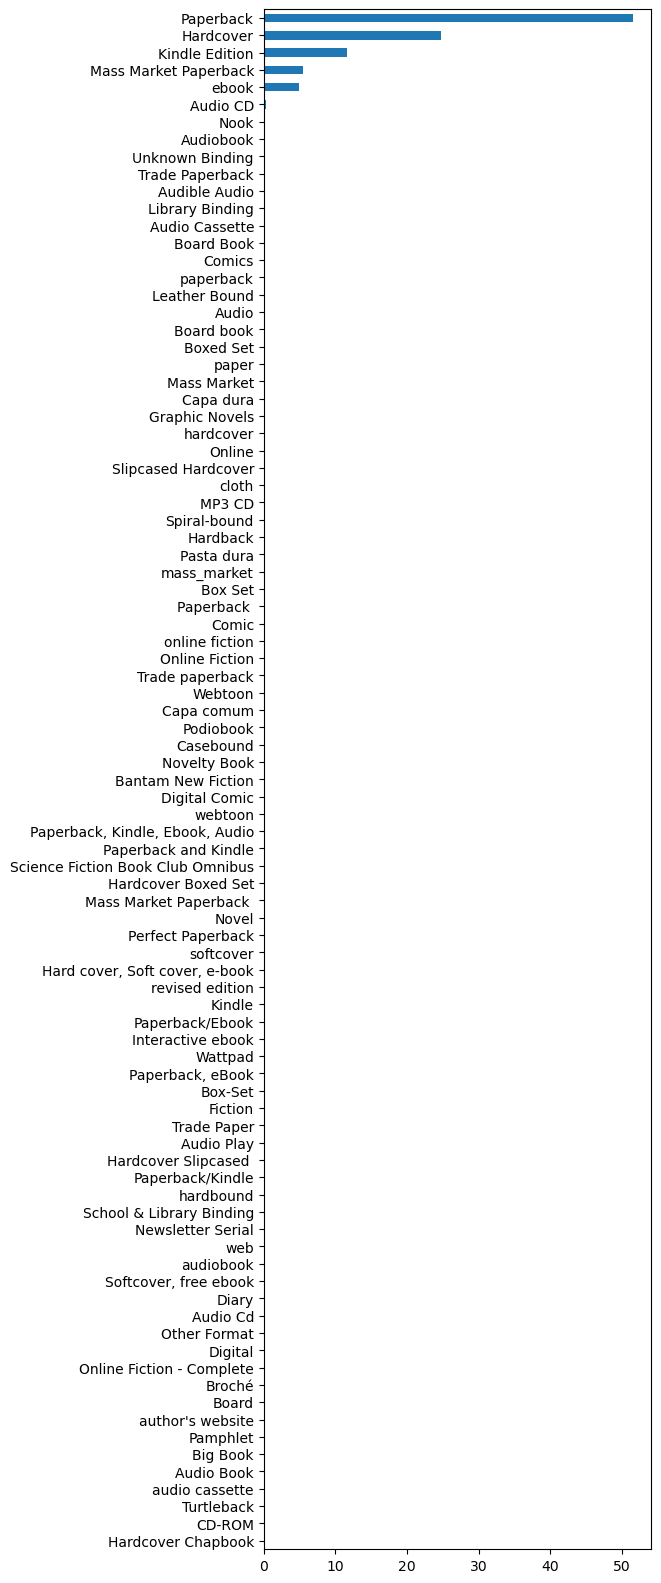

In [176]:
#Most and least represented book formats in this dataset
plt.figure(figsize=[5,20])
(books_df['book_format'].value_counts(normalize=True).sort_values()*100).plot(kind='barh')
plt.show()

We see that some values are the same but in a slightly different spelling, like paperback Paper Back, Paper back, or sometimes several types of formats separated by a comma or /.

In [177]:
#Look at the distribution in % of total
books_df['book_format'].value_counts(normalize=True)*100

Paperback                51.517698
Hardcover                24.770664
Kindle Edition           11.646895
Mass Market Paperback     5.453629
ebook                     4.906104
                           ...    
Fiction                   0.002401
Trade Paper               0.002401
Audio Play                0.002401
Digital Comic             0.002401
Bantam New Fiction        0.002401
Name: book_format, Length: 89, dtype: float64

In [178]:
#What are the top 10 book format?
books_df['book_format'].value_counts(normalize=True).sort_values(ascending=False)[:10]*100

Paperback                51.517698
Hardcover                24.770664
Kindle Edition           11.646895
Mass Market Paperback     5.453629
ebook                     4.906104
Audio CD                  0.264156
Nook                      0.235339
Audiobook                 0.201719
Unknown Binding           0.136881
Trade Paperback           0.120071
Name: book_format, dtype: float64

In [179]:
#How much do they represent in total?
sum(books_df['book_format'].value_counts(normalize=True).sort_values(ascending=False)[:10])*100

99.25315786945873

The format the most represented is Paperback with 51%, followed by Hardcover at 24%. Since the top 10 book formats represent 99% of the values, we will group everything else under "Other".

In [180]:
#Creating a format_group column and duplicating the book_format values
books_df['format_group']=books_df['book_format']

In [181]:
#Creating a list with the top 10 formats
top10_formats=books_df['book_format'].value_counts(normalize=True).sort_values(ascending=False)[:10].index
top10_formats

Index(['Paperback', 'Hardcover', 'Kindle Edition', 'Mass Market Paperback',
       'ebook', 'Audio CD', 'Nook', 'Audiobook', 'Unknown Binding',
       'Trade Paperback'],
      dtype='object')

In [182]:
#Grouping all the formats not in the top 10 under 'Other'
books_df.loc[~books_df['format_group'].isin(top10_formats),'format_group']='Other'

In [183]:
#Checking
books_df['format_group'].value_counts(normalize=True)*100

Paperback                51.021476
Hardcover                24.532071
Kindle Edition           11.534711
Mass Market Paperback     5.401099
ebook                     4.858848
Other                     1.702856
Audio CD                  0.261612
Nook                      0.233073
Audiobook                 0.199776
Unknown Binding           0.135563
Trade Paperback           0.118915
Name: format_group, dtype: float64

The null values also went into the other category. Let's recalculate the proportion of book formats that is not 'Other':

In [184]:
100-1.70

98.3

We now have limited the book formats to 10 formats, which represent 98.3% of all the books. The rest is in an 'other' category.

We can even regroup this further by doing the following:
- grouping Kindle and Nook under ebook
- grouping Trade paperback with Paperback (see [this article](https://www.masterclass.com/articles/mass-market-paperback) for the difference between Mass Paperback, Paperback and Hardcover)
- Grouping Audio CD with Audiobook
- Grouping Unknown Binding with Other

In [185]:
#Renaming Trade Paperback > Paperback
books_df['format_group']=np.where(books_df['format_group']=='Trade Paperback','Paperback',books_df['format_group'])

#Renaming Kindle and Nook > ebook
books_df['format_group']=np.where(books_df['format_group']=='Kindle Edition','ebook',books_df['format_group'])
books_df['format_group']=np.where(books_df['format_group']=='Nook','ebook',books_df['format_group'])

#Renaming Audio CD > Audiobook
books_df['format_group']=np.where(books_df['format_group']=='Audio CD','Audiobook',books_df['format_group'])

#Renaming Unknown Binding > Other
books_df['format_group']=np.where(books_df['format_group']=='Unknown Binding','Other',books_df['format_group'])

In [186]:
#Recalculating the value count
books_df['format_group'].value_counts(normalize=True)*100

Paperback                51.140391
Hardcover                24.532071
ebook                    16.626632
Mass Market Paperback     5.401099
Other                     1.838419
Audiobook                 0.461388
Name: format_group, dtype: float64

We have now only 6 book formats: Paperback, Hardcover, ebook, Mass Market Paperback, Audiobook, and Other. We can turn it into dummy variables and use the Other category as a reference category.

In [187]:
#Turning the format into dummy variables
format_df=pd.get_dummies(books_df['format_group'],prefix='format')
format_df

,format_Audiobook,format_Hardcover,format_Mass Market Paperback,format_Other,format_Paperback,format_ebook
0,0,1,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
42042,0,0,0,0,0,1
42043,0,0,0,0,1,0
42044,0,0,0,0,1,0
42045,0,0,0,0,1,0


In [188]:
#Dropping Other as the reference category
format_df.drop('format_Other',axis=1,inplace=True)
format_df

,format_Audiobook,format_Hardcover,format_Mass Market Paperback,format_Paperback,format_ebook
0,0,1,0,0,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
42042,0,0,0,0,1
42043,0,0,0,1,0
42044,0,0,0,1,0
42045,0,0,0,1,0


We have put the dummy variables into a separate dataframe, that we can now merge with the original one, since the index is the same.

In [189]:
#Merge with the existing dataframe
books_df= pd.merge(books_df,format_df,left_index=True,right_index=True)

In [190]:
#Check
books_df.head()

,book_id,title,avg_rating,description,book_format,edition,pages,publisher,publish_date,first_publish_date,awards,num_ratings,rating_by_stars,setting,price,word_count_title,is_series,main_author,book_count_by_author,word_count_description,genres_standardized_count,genre_Adult,genre_Adventure,genre_Biography,genre_Childrens,genre_Classics,genre_Contemporary,genre_Fantasy,genre_Fiction,genre_Historical,genre_Historical Fiction,genre_History,genre_Horror,genre_Islam,genre_Literature,genre_Magic,genre_Mystery,genre_Nonfiction,genre_Novels,genre_Paranormal,genre_Poetry,genre_Romance,genre_Science Fiction,genre_Thriller,genre_Urban,genre_Young Adult,genre_Other,format_group,format_Audiobook,format_Hardcover,format_Mass Market Paperback,format_Paperback,format_ebook
0,2767052-the-hunger-games,The Hunger Games,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CERTAIN DEATH.THE HUNGER GAMES HAVE BEGUN. . . .In the ruins of a place once known as North America li...,Hardcover,First Edition,374,Scholastic Press,09/14/08,NaN,"['Locus Award Nominee for Best Young Adult Book (2009)', 'Georgia Peach Book Award (2009)', 'Buxtehuder Bulle (2009)', 'Golden Duck Award for Youn...",6376780,"['3444695', '1921313', '745221', '171994', '93557']","['District 12, Panem', 'Capitol, Panem', 'Panem (United States)']",5.09,3,1,Suzanne Collins,12,147,6,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,Hardcover,0,1,0,0,0
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,4.50,"There is a door at the end of a silent corridor. And it’s haunting Harry Pottter’s dreams. Why else would he be waking in the middle of the night,...",Paperback,US Edition,870,Scholastic Inc.,09/28/04,06/21/03,"['Bram Stoker Award for Works for Young Readers (2003)', 'Anthony Award for Young Adult (2004)', ""Mythopoeic Fantasy Award for Children's Literatu...",2507623,"['1593642', '637516', '222366', '39573', '14526']","['Hogwarts School of Witchcraft and Wizardry (United Kingdom)', 'London, England']",7.38,8,1,J.K. Rowling,24,136,7,0,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,Paperback,0,0,0,1,0
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,4.28,"The unforgettable novel of a childhood in a sleepy Southern town and the crisis of conscience that rocked it, To Kill A Mockingbird became both an...",Paperback,NaN,324,Harper Perennial Modern Classics,05/23/06,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie Award for Classic (2007)', 'National Book Award Finalist for Fiction (1961)', 'Alabama Author Award f...",4501075,"['2363896', '1333153', '573280', '149952', '80794']","['Maycomb, Alabama (United States)']",NaN,4,1,Harper Lee,2,137,7,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,Paperback,0,0,0,1,0
3,1885.Pride_and_Prejudice,Pride and Prejudice,4.26,"Alternate cover edition of ISBN 9780679783268Since its immediate success in 1813, Pride and Prejudice has remained one of the most popular novels ...",Paperback,"Modern Library Classics, USA / CAN",279,Modern Library,10/10/00,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '76770']","['United Kingdom', 'Derbyshire, England (United Kingdom)', 'England', 'Hertfordshire, England (United Kingdom)']",NaN,3,0,Jane Austen,14,100,8,1,0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,Paperback,0,0,0,1,0
4,41865.Twilight,Twilight,3.60,"About three things I was absolutely positive.\n\nFirst, Edward was a vampire.\n\nSecond, there was a part of him—and I didn't know how dominant th...",Paperback,NaN,501,"Little, Brown and Company",2009-06-06,2010-05-05,"['Georgia Peach Book Award (2007)', 'Buxtehuder Bulle (2006)', 'Kentucky Bluegrass Award for 9-12 (2007)', 'Prijs van de Kinder- en Jeugdjury Vlaa...",4964519,"['1751460', '1113682', '1008686', '542017', '548674']","['Forks, Washington (United States)', 'Phoenix, Arizona (United States)', 'Washington (state) (United States)']",2.1,1,1,Stephenie Meyer,14,55,5,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,Paperback,0,0,0,1,0

we will drop the format column since we do not need it anymore.

In [191]:
#Dropping the format columns
books_df.drop(['book_format','format_group'],axis=1,inplace=True)

In [192]:
books_df.shape

(42047, 51)

We now have 51 columns.

In [193]:
#Next?
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42047 entries, 0 to 42046
Data columns (total 51 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   book_id                       42047 non-null  object 
 1   title                         42047 non-null  object 
 2   avg_rating                    42047 non-null  float64
 3   description                   42047 non-null  object 
 4   edition                       3800 non-null   object 
 5   pages                         40806 non-null  object 
 6   publisher                     39665 non-null  object 
 7   publish_date                  41705 non-null  object 
 8   first_publish_date            25649 non-null  object 
 9   awards                        42047 non-null  object 
 10  num_ratings                   42047 non-null  int64  
 11  rating_by_stars               42047 non-null  object 
 12  setting                       42047 non-null  object 
 13  p

### 3.11 Edition

How many null values are there?

In [194]:
#How many null values?
books_df['edition'].isna().sum()

38247

In [195]:
#Calculating percentage of total
books_df['edition'].isna().sum()/books_df.shape[0]*100

90.96249435155896

There are 91% of missing values, that is too many so we will drop the column.

In [196]:
#Drop the column
books_df.drop('edition',axis=1,inplace=True)

In [197]:
#checking the new shape, expecting 50
books_df.shape

(42047, 50)

We now have 50 columns.

### 3.12 Pages

Let's check the number of missing values here.

In [198]:
#How many null values?
books_df['pages'].isna().sum()

1241

In [199]:
#Calculating percentage of total
books_df['pages'].isna().sum()/books_df.shape[0]*100

2.9514590815040314

Almost 3% of the books do not have a number of pages. That starts to be significant. Are there books with 0 pages?

In [200]:
#Are there any books with 0 pages?
books_df['pages'].str.match('0').sum()

109

Only 109 books have zero pages. In fact, let's look at the page count:

In [201]:
#Look at the count
books_df['pages'].value_counts(normalize=True)*100

320     2.225163
352     1.918835
288     1.840416
256     1.671323
304     1.666422
          ...   
2035    0.002451
1205    0.002451
966     0.002451
1177    0.002451
1613    0.002451
Name: pages, Length: 1258, dtype: float64

Since the page format is 'object' and has NaN, we can't do any statistical analysis. Since there are already books with zero pages and that is not physically possible, we can only conclude that the books with zero pages are just an unknown number of pages. We will therefore replace the NaN values with zero, and change the format to integer.

We might want to drop the zero values later, but for now we'll keep them.

In [202]:
#replacing NaN with zero
books_df['pages']=books_df['pages'].fillna(0)

In [203]:
#Checking
books_df['pages'].isna().sum()

0

All of the NaN values have been replaced by zero, we can look at the count again.

In [204]:
#Looking at the count again
books_df['pages'].value_counts(normalize=True)*100

0       2.951459
320     2.159488
352     1.862202
288     1.786097
256     1.621994
          ...   
2631    0.002378
3417    0.002378
1077    0.002378
972     0.002378
1613    0.002378
Name: pages, Length: 1259, dtype: float64

Before we change the data type, let's make sure we only have digits.

In [205]:
#counting the number of rows with non-digits
books_df['pages'].str.contains('\D',regex=True).sum()

14

14 rows have non-digits in them. The number is so small that we can set them all to zero as well.

In [206]:
#set book with non-digits characters to zero
books_df['pages']=np.where(books_df['pages'].str.contains('\D',regex=True),"0",books_df['pages'])

In [207]:
#checking
books_df['pages'].str.contains('\D',regex=True).sum()

0

In [208]:
#Looking at the count again
books_df['pages'].value_counts(normalize=True)*100

0       3.243989
320     2.159488
352     1.862202
288     1.786097
256     1.621994
          ...   
1240    0.002378
1390    0.002378
913     0.002378
3020    0.002378
1613    0.002378
Name: pages, Length: 1257, dtype: float64

Now that we have only digits in the page column, we can change the data type and look at the statistics on this column.

In [209]:
#Changing the data type
books_df['pages']=books_df['pages'].astype('int64')

In [210]:
#Look at the stats
books_df['pages'].describe()

count    42047.000000
mean       321.523081
std        249.381955
min          0.000000
25%        209.000000
50%        304.000000
75%        388.000000
max      14777.000000
Name: pages, dtype: float64

The books in this list have on average 321 pages, and the longest book has 14,777. Let's look at the distribution, we expect a normal distribution.

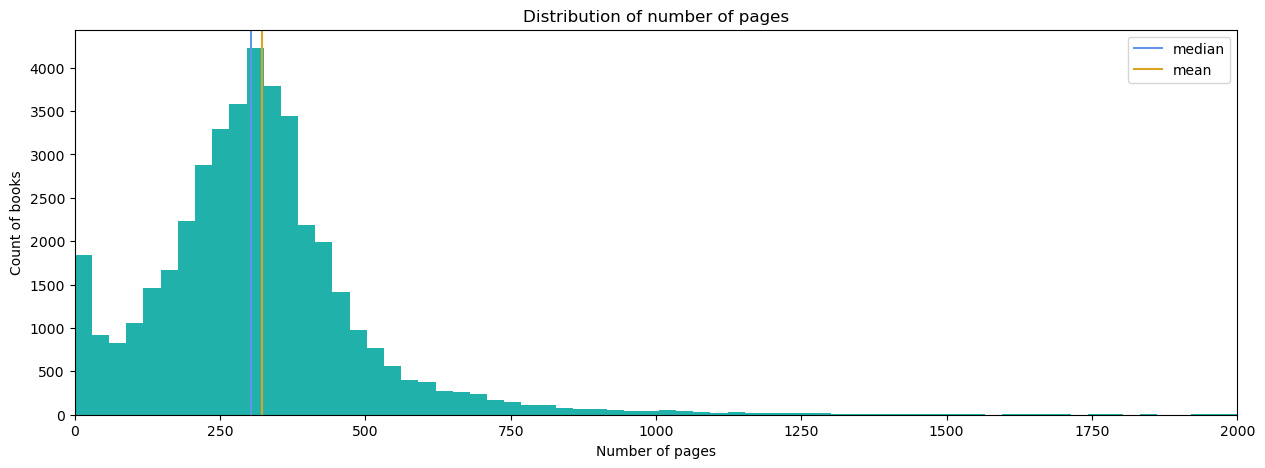

In [211]:
#plotting the values to look at the distribution
plt.figure(figsize=[15,5])
plt.hist(books_df['pages'],bins=500,color='lightseagreen')
plt.xlim(0,2000) #removing entries > 2000 for visualization purposes

#overplot mean and median
plt.axvline(books_df['pages'].median(), color='cornflowerblue', label='median')
plt.axvline(books_df['pages'].mean(), color='goldenrod', label='mean')

plt.title('Distribution of number of pages')
plt.xlabel('Number of pages')
plt.ylabel('Count of books')
plt.legend()

plt.show()

The distribution looks fairly normal, except for a spike of zeros (as expected).

We decide to drop the rows that have zero pages, since we want to use the number of pages as a feature in our modelling. That represents 3% of the data. It is not nothing, but acceptable.

In [212]:
#Create a list with the index of the rows to delete
index_pages=books_df['pages'][books_df['pages']==0].sort_index(ascending=False).index

In [213]:
#Loop over that list to delete the rows

for i in index_pages:
    books_df.drop(books_df.index[i],axis=0,inplace=True)

In [214]:
#Resetting the index
books_df.reset_index(drop=True,inplace=True)

In [215]:
#Checking the shape, expecting 
books_df.shape

(40683, 50)

In [216]:
#Checking gain books with 0 pages
sum(books_df['pages']==0)

0

We have now 40,683 rows.

In [217]:
#Next?
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40683 entries, 0 to 40682
Data columns (total 50 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   book_id                       40683 non-null  object 
 1   title                         40683 non-null  object 
 2   avg_rating                    40683 non-null  float64
 3   description                   40683 non-null  object 
 4   pages                         40683 non-null  int64  
 5   publisher                     38730 non-null  object 
 6   publish_date                  40466 non-null  object 
 7   first_publish_date            24970 non-null  object 
 8   awards                        40683 non-null  object 
 9   num_ratings                   40683 non-null  int64  
 10  rating_by_stars               40683 non-null  object 
 11  setting                       40683 non-null  object 
 12  price                         32718 non-null  object 
 13  w

### 3.13 Publisher

How many null values are there?

In [218]:
#Checking null values
books_df['publisher'].isna().sum()

1953

In [219]:
#In Percentage of total
books_df['publisher'].isna().sum()/books_df.shape[0]*100

4.800530934296881

Almost 5% of missing values, that's not ideal... Let's keep exploring to see what we can do.

In [220]:
#count unique values
books_df['publisher'].nunique()

7340

There are more than 7000 publishers, so again that wouldn't be realistic to turn those into dummy variables. Let's see if a few publishers make for a large percentage, just like the book format.

In [221]:
#count values
books_df['publisher'].value_counts(normalize=True)*100

Vintage                                    1.435580
HarperCollins                              1.275497
Penguin Books                              1.053447
Ballantine Books                           0.983734
Bantam                                     0.890782
                                             ...   
Heart Space Publications                   0.002582
Lynda Chance Books                         0.002582
Aziza Publishing                           0.002582
Simon & Shuster Books for Young Readers    0.002582
Bonneville                                 0.002582
Name: publisher, Length: 7340, dtype: float64

Unfortunately that is not the case, Vintage is the most represented publisher through the dataset but represent only 1.4% of the total. However, it seems that some names are variations of the same name, like Harper, HarperCollins, HarperCollins Australia, etc. Maybe we can group them?

In [222]:
#How many publishers have "Harper" in their name?
books_df['publisher'][books_df['publisher'].str.contains('Harper',na=False)].nunique()

182

In [223]:
#Taking a peak at the publishers that have Harper in their name
books_df['publisher'][books_df['publisher'].str.contains('Harper',na=False)].value_counts()

HarperCollins                           494
HarperTeen                              264
Harper Perennial                        223
Harper                                  165
HarperCollins Publishers                148
                                       ... 
Tokyopop/Harper                           1
Harper Tempest                            1
Harper Collins Children's Books UK        1
HarperCollins Canada / Warriors (Wa)      1
HarperOne (NYC)                           1
Name: publisher, Length: 182, dtype: int64

In [224]:
#What is the percentage of books that have Harper in the publisher's name?
sum(books_df['publisher'].str.contains('Harper',na=False))/books_df.shape[0]*100

5.245434210849741

182 publishers have 'Harper' in their names, and yhey all look like a variant of Harper Collins. All together, they represent 5.2% of the total

That definitely increased the share of the HarperCollins publisher. Let's look at Penguin.

In [225]:
#How many publishers have "Penguin" in their name?
books_df['publisher'][books_df['publisher'].str.contains('Penguin',na=False)].nunique()

132

In [226]:
#How many books in total have Penguin in the publisher's name?
sum(books_df['publisher'].str.contains('Penguin',na=False))/books_df.shape[0]*100

3.087284615195536

132 publishers have Penguin in their name, and they represent 3% of the total.

In [227]:
#How many publishers have "Vintage" in their name?
books_df['publisher'][books_df['publisher'].str.contains('Vintage',na=False)].nunique()

26

In [228]:
#How many books in total have Vintage in the publisher's name?
sum(books_df['publisher'].str.contains('Vintage',na=False))/books_df.shape[0]*100

1.7452006980802792

26 publishers have vintage in their name, and they represent 1.7% of the total.

Unfortunately, the top 4 publishers represent only ~10% of all the publishers, and we have more than 4% missing values.  Since the publisher's name is too spread out through the dataset and therefore might not be very predictive, we decide to drop it.

In [229]:
#Dropping the publisher's column
books_df.drop(['publisher'],axis=1,inplace=True)

In [230]:
#Checking the new shape
books_df.shape

(40683, 49)

We have now 49 columns.

In [231]:
#Next?
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40683 entries, 0 to 40682
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   book_id                       40683 non-null  object 
 1   title                         40683 non-null  object 
 2   avg_rating                    40683 non-null  float64
 3   description                   40683 non-null  object 
 4   pages                         40683 non-null  int64  
 5   publish_date                  40466 non-null  object 
 6   first_publish_date            24970 non-null  object 
 7   awards                        40683 non-null  object 
 8   num_ratings                   40683 non-null  int64  
 9   rating_by_stars               40683 non-null  object 
 10  setting                       40683 non-null  object 
 11  price                         32718 non-null  object 
 12  word_count_title              40683 non-null  int64  
 13  i

### 3.14 Awards

As usual, we start by checking the null values.

In [232]:
#Check null values
books_df['awards'].isna().sum()

0

No null values! But we know that the format of this column is a list of all the awards received, so maybe some lists of zero elements in them. We can turn the values into a list to perform some counts.

In [233]:
#Turning Awards into a list
books_df['awards']=books_df['awards'].apply(eval)

In [234]:
# Percentage of rows that do not have any elements in the list
sum(books_df['awards'].str.len()==0)/books_df.shape[0]*100

76.8379912985768

77% of the books don't have awards. But that's not that surprising, as many books don't receive awards at all. It is unclear if those are missing values, or simply if it is because the book hasn't received an award. LEt's put the count of awards in a separate column.

In [235]:
#Counting how many awards each book has received and creating a new column with the number of awards
books_df['num_awards']=books_df['awards'].str.len()

In [236]:
#counting the values
books_df['num_awards'].describe()

count    40683.000000
mean         0.505813
std          1.391199
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         41.000000
Name: num_awards, dtype: float64

In [237]:
books_df['num_awards'].value_counts()

0     31260
1      5157
2      1892
3       904
4       542
5       331
6       183
7       124
8        86
9        61
10       48
11       19
13       18
12       14
14       10
15        7
16        6
17        4
22        4
20        3
28        2
18        2
21        2
41        1
24        1
25        1
27        1
Name: num_awards, dtype: int64

Most books on this list have 0 or 1 award. The most awards that a book has had is 41. 

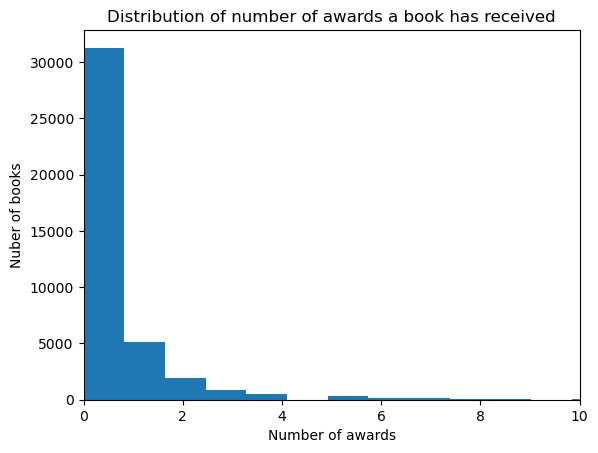

In [238]:
#plotting the distribution
plt.figure()
plt.hist(books_df['num_awards'],bins=50)
plt.title("Distribution of number of awards a book has received")
plt.xlabel("Number of awards")
plt.ylabel("Nuber of books")
plt.xlim(0,10)
plt.show()

Evem though some awards might be more prestigious than others and influence the readers and popularity, we will focus on whether or not a book has received awards, so we'll keep the num_awards column, but drop the 'awards' one.

In [239]:
#Dropping awards
books_df.drop('awards',axis=1,inplace=True)

In [240]:
#checking the new shape, expecting 49
books_df.shape

(40683, 49)

We now have 49 columns.

Are books that have more awards more popular? We can plot awards vs star rating to see if there is a pattern.

<Figure size 1500x1500 with 0 Axes>

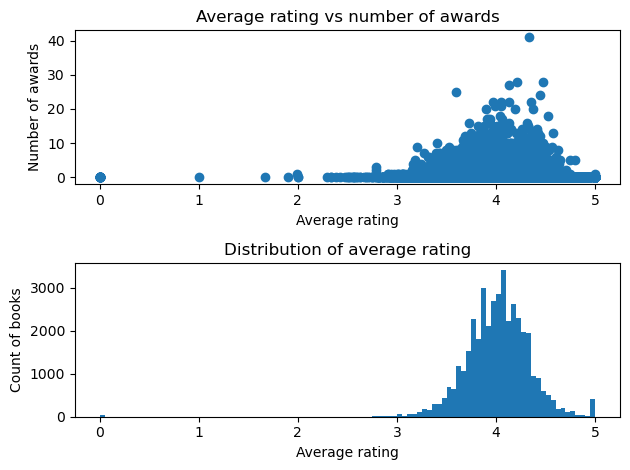

In [241]:
#plotting number of awards vs average rating, and distribution of ratings

plt.figure(figsize=(15,15))

plt.subplots(2,1)

plt.subplot(2,1,1)
plt.scatter(books_df['avg_rating'],books_df['num_awards'],)
plt.title("Average rating vs number of awards")
plt.xlabel("Average rating")
plt.ylabel("Number of awards")

plt.subplot(2,1,2)
plt.hist(books_df['avg_rating'],bins=100)
plt.title("Distribution of average rating")
plt.xlabel("Average rating")
plt.ylabel("Count of books")

plt.tight_layout()

plt.show()

If the number of awards was predictive of a book's popularity, we would have expected to see some sort of linear distribution on the scatterplot, but instead it simply mirrors the distribution of the ratings.

For our analysis, we could create a new column that simply indicates whether the book has received awards or not.

In [242]:
# Percentage of books with zero awards
books_df['has_awards']=np.where(books_df['num_awards']>0,1,0)

In [243]:
#checking the distribution
books_df['has_awards'].value_counts(normalize=True)

0    0.76838
1    0.23162
Name: has_awards, dtype: float64

It is pretty unbalanced as 77% of the books have not received an award, but it might still help is our analysis. We'll drop the num_awards column since it is redundant.

In [244]:
#Dropping num_awards
books_df.drop('num_awards',axis=1,inplace=True)

In [245]:
#Checking shape
books_df.shape

(40683, 49)

We have 49 columns.

### 3.15 Setting

Again, the info() tells us that there are no null values, but the setting is in a list format.

In [246]:
#Check null values
books_df['setting'].isna().sum()

0

In [247]:
#Turning Setting into a list
books_df['setting']=books_df['setting'].apply(eval)

In [248]:
# Percentage of rows that do not have any elements in the list
sum(books_df['setting'].str.len()==0)/books_df.shape[0]*100

74.57906250768134

75% of the books do not have a setting indicated, that's way too many.

In [249]:
#Counting how many settings per book
books_df['setting'].str.len().value_counts(normalize=True)*100

0      74.579063
1      18.172210
2       4.793157
3       1.351916
4       0.538308
5       0.221223
6       0.130276
7       0.078657
8       0.036870
9       0.034412
10      0.014748
11      0.012290
12      0.009832
16      0.004916
14      0.004916
15      0.002458
82      0.002458
13      0.002458
135     0.002458
22      0.002458
55      0.002458
18      0.002458
Name: setting, dtype: float64

Again, there are too many missing values for this column to be useful, we'll drop it as well.

In [250]:
#Dropping the column 
books_df.drop('setting',axis=1,inplace=True)

#checking the new shape, expecting 29
books_df.shape

(40683, 48)

We now have 48 columns.

### 3.16 Average Rating

This is a variable we are very interested in, since it will be our target variable in the modelling. Let's look at the stats.

In [251]:
#check that the data type is float
books_df['avg_rating'].dtype

dtype('float64')

In [252]:
#checking the stats
books_df['avg_rating'].describe()

count    40683.000000
mean         4.013413
std          0.327607
min          0.000000
25%          3.830000
50%          4.020000
75%          4.210000
max          5.000000
Name: avg_rating, dtype: float64

The average star rating is 4.01, and the median is 4.0. We expect a fairly normal distribution. but before we plot it, let's see if there are any null values, or if there are some ratings with a 0 value.

In [253]:
#check for n/a
books_df['avg_rating'].isna().sum()

0

In [254]:
#check if any rating has a zero value
sum(books_df['avg_rating']==0)

31

31 ratings have a zero value. We'll have to drop those. Do those have any reviews?

In [255]:
#check if the zero ratings have any reviews
books_df[(books_df['avg_rating']==0)&(books_df['num_ratings']!=0)]

,book_id,title,avg_rating,description,pages,publish_date,first_publish_date,num_ratings,rating_by_stars,price,word_count_title,is_series,main_author,book_count_by_author,word_count_description,genres_standardized_count,genre_Adult,genre_Adventure,genre_Biography,genre_Childrens,genre_Classics,genre_Contemporary,genre_Fantasy,genre_Fiction,genre_Historical,genre_Historical Fiction,genre_History,genre_Horror,genre_Islam,genre_Literature,genre_Magic,genre_Mystery,genre_Nonfiction,genre_Novels,genre_Paranormal,genre_Poetry,genre_Romance,genre_Science Fiction,genre_Thriller,genre_Urban,genre_Young Adult,genre_Other,format_Audiobook,format_Hardcover,format_Mass Market Paperback,format_Paperback,format_ebook,has_awards


All of the books that have a zero rating don't have any reviews.

In [256]:
#check if there are books that have an avg_rating but zero reviews
books_df[(books_df['avg_rating']!=0)&(books_df['num_ratings']==0)]

,book_id,title,avg_rating,description,pages,publish_date,first_publish_date,num_ratings,rating_by_stars,price,word_count_title,is_series,main_author,book_count_by_author,word_count_description,genres_standardized_count,genre_Adult,genre_Adventure,genre_Biography,genre_Childrens,genre_Classics,genre_Contemporary,genre_Fantasy,genre_Fiction,genre_Historical,genre_Historical Fiction,genre_History,genre_Horror,genre_Islam,genre_Literature,genre_Magic,genre_Mystery,genre_Nonfiction,genre_Novels,genre_Paranormal,genre_Poetry,genre_Romance,genre_Science Fiction,genre_Thriller,genre_Urban,genre_Young Adult,genre_Other,format_Audiobook,format_Hardcover,format_Mass Market Paperback,format_Paperback,format_ebook,has_awards


All books that have an average rating also have at least one review.

We decide to drop the rows that have a zero rating, since we want to look at the book's popularity.

In [257]:
#Create a list with the index of the rows to delete
index_zerorating=books_df['avg_rating'][books_df['avg_rating']==0].sort_index(ascending=False).index

In [258]:
#Loop over that list to delete the rows

for i in index_zerorating:
    books_df.drop(books_df.index[i],axis=0,inplace=True)

In [259]:
#Resetting the index
books_df.reset_index(drop=True,inplace=True)

In [260]:
#Checking the shape, expecting 42,047-37 = 42,010
books_df.shape

(40652, 48)

Great, we can now look at the distribution.

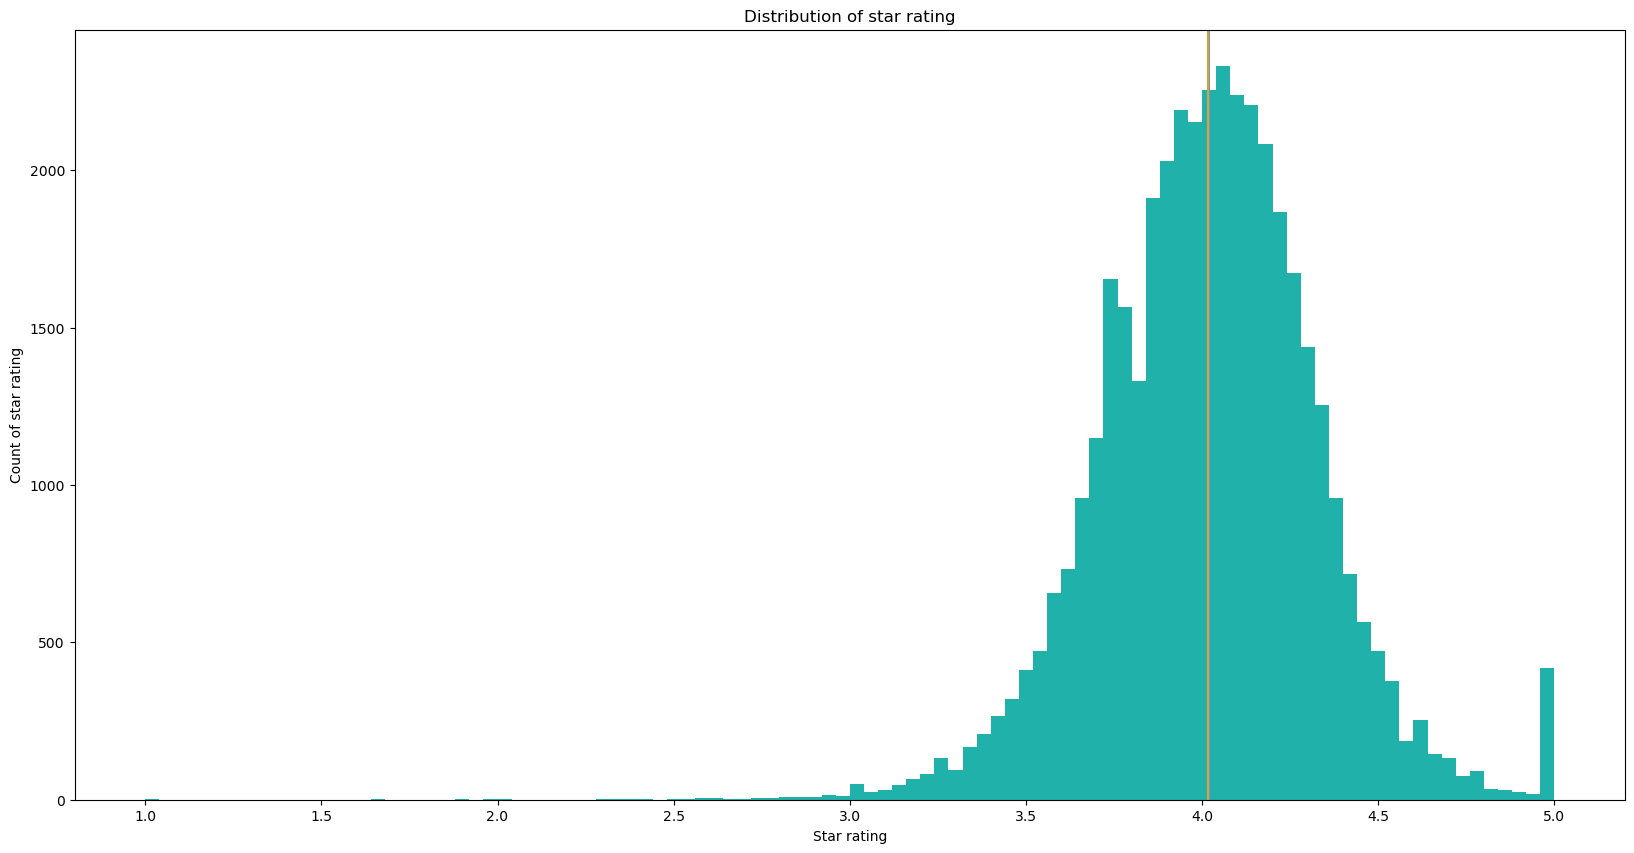

In [261]:
#Let's look at the distribution
plt.figure(figsize=[20,10])
plt.hist(books_df['avg_rating'],bins=100, color='lightseagreen')


#overplot mean and median
plt.axvline(books_df['avg_rating'].median(), color='cornflowerblue', label='median')
plt.axvline(books_df['avg_rating'].mean(), color='goldenrod', label='mean')

plt.xlabel("Star rating")
plt.ylabel("Count of star rating")
plt.title("Distribution of star rating")
plt.show()

The distribution seems to be fairly normal, except for a peak of 5.0 star ratings. Let's look more into those.

In [262]:
#Let's have a look at the 5.0 ratings
(sum(books_df['avg_rating']==5.0))/books_df.shape[0]*100

1.0134802715733544

1% of all books have a perfect score of 5.0. We wonder how many reviews those books have...

In [263]:
#we can look at how many reviews those books have
books_df[books_df['avg_rating']==5.0]['num_ratings'].value_counts(normalize=True)*100

1     28.883495
2     27.912621
3     16.504854
4     11.893204
5      2.912621
6      2.912621
7      2.184466
9      1.456311
8      1.213592
11     0.970874
10     0.970874
17     0.485437
15     0.485437
36     0.242718
12     0.242718
32     0.242718
24     0.242718
16     0.242718
Name: num_ratings, dtype: float64

83% of the books that got a 5.0 rating have 4 or less reviews. Since we want to use the average rating as our target variable, we should make sure that it is indeed an average... and books with only one 5-star review skewed the data a bit. 
For this analysis, we'll keep only books that have at least 10 reviews.

In [264]:
#How much is that?
sum(books_df['num_ratings']<=10)/books_df.shape[0]*100

3.069959657581423

Books that have 10 reviews or less represent 3% of the total. That's not insignificant, but it is important for our modelling that the star rating is indeed an average and has enough inputs to be meaningful. We will drop the rows that have less than 10 reviews.

In [265]:
#Get the index of the rows that have less than 10 reviews
index_reviews=books_df['num_ratings'][books_df['num_ratings']<=10].sort_index(ascending=False).index
index_reviews

Int64Index([40625, 40553, 40542, 40527, 40391, 40328, 40320, 40286, 40245,
            40234,
            ...
             7918,  7708,  7640,  7634,  6299,  6233,  5296,  4651,  4621,
             4110],
           dtype='int64', length=1248)

In [266]:
#Loop over the list to remove the rows
for i in index_reviews:
    books_df.drop(books_df.index[i],axis=0,inplace=True)

In [267]:
#checking the shape
books_df.shape

(39404, 48)

In [268]:
#Reset the index
books_df.reset_index(drop=True,inplace=True)

In [269]:
#Checking the last index
books_df.index[-1]

39403

In [270]:
#Sanity check
sum(books_df['num_ratings']<=10)/books_df.shape[0]*100

0.0

We now have 39,403 rows and 48 columns.

### 3.17 Number of reviews

Number of reviews or (num_ratings here) is also important because it is an indicator of how many people have read the book. Whether or not they liked it is another question...

In [271]:
#checking that the data type is integer
books_df['num_ratings'].dtype

dtype('int64')

In [272]:
#Let's look at the stats
books_df['num_ratings'].describe()

count    3.940400e+04
mean     2.288737e+04
std      1.193003e+05
min      1.100000e+01
25%      8.180000e+02
50%      3.759000e+03
75%      1.316725e+04
max      7.048471e+06
Name: num_ratings, dtype: float64

Books in this dataset have 22,283 reviews on average, but the median is 3,555. The different between those 2 metrics is because some books have a huge amount of reviews. The most reviews a book has gotten is 7 millions! Which book is it?

In [273]:
#Which book is it?
books_df['title'][books_df['num_ratings']>7000000]

32    Harry Potter and the Sorcerer's Stone
Name: title, dtype: object

Harry Potter of course.

### 3.18 Number of reviews by star rating

The original column "Rating by star" is a list of 5 values for the number of ratings for 1,2,3,4 and 5 stars. Let's split it into 5 different columns.

In [274]:
books_df['rating_by_stars']

0          ['3444695', '1921313', '745221', '171994', '93557']
1            ['1593642', '637516', '222366', '39573', '14526']
2          ['2363896', '1333153', '573280', '149952', '80794']
3           ['1617567', '816659', '373311', '113934', '76770']
4        ['1751460', '1113682', '1008686', '542017', '548674']
                                 ...                          
39399                        ['442', '384', '142', '48', '12']
39400                              ['16', '14', '5', '2', '0']
39401                   ['2109', '1868', '1660', '647', '390']
39402                            ['77', '78', '59', '19', '5']
39403                           ['106', '73', '42', '17', '8']
Name: rating_by_stars, Length: 39404, dtype: object

We know from info() that there are no null values. We also need to make sure before we split the column that each list contains 5 elements.

In [275]:
#Convert the string as a list
books_df['rating_by_stars']=books_df['rating_by_stars'].apply(eval)

In [276]:
#looking at the lists
books_df['rating_by_stars']

0          [3444695, 1921313, 745221, 171994, 93557]
1            [1593642, 637516, 222366, 39573, 14526]
2          [2363896, 1333153, 573280, 149952, 80794]
3           [1617567, 816659, 373311, 113934, 76770]
4        [1751460, 1113682, 1008686, 542017, 548674]
                            ...                     
39399                        [442, 384, 142, 48, 12]
39400                              [16, 14, 5, 2, 0]
39401                   [2109, 1868, 1660, 647, 390]
39402                            [77, 78, 59, 19, 5]
39403                           [106, 73, 42, 17, 8]
Name: rating_by_stars, Length: 39404, dtype: object

Are there any rows that do not have 5 elements in the list?

In [277]:
#Finding the rows that do not have 5 elements in the rating_by_star list
sum(books_df['rating_by_stars'].str.len()!=5)

1

There is only 1, we can replace it by 0.

In [278]:
#Replace by 0
books_df['rating_by_stars']=np.where(books_df['rating_by_stars'].str.len()!=5,"0",books_df['rating_by_stars'])

We'll put the broken down star ratings into a new dataframe.

In [279]:
#Creating a new DF with the star rating broken down
stars_df=books_df['rating_by_stars'].apply(pd.Series)
stars_df.head()

,0,1,2,3,4
0,3444695,1921313,745221,171994,93557
1,1593642,637516,222366,39573,14526
2,2363896,1333153,573280,149952,80794
3,1617567,816659,373311,113934,76770
4,1751460,1113682,1008686,542017,548674


In [280]:
#Replacing null values by 0
stars_df.fillna(0,inplace=True)

We rename the columns of the dataframe to a more descriptive name.

In [281]:
#Changing the name of the stars_df columns
cols=['five_stars','four_stars','three_stars','two_stars','one_star']
stars_df.columns=cols
stars_df.head()

,five_stars,four_stars,three_stars,two_stars,one_star
0,3444695,1921313,745221,171994,93557
1,1593642,637516,222366,39573,14526
2,2363896,1333153,573280,149952,80794
3,1617567,816659,373311,113934,76770
4,1751460,1113682,1008686,542017,548674


We can now merge the dataframe with the broken down star rating by star with the main dataframe.

In [282]:
#Merging the new data frame with books_df
books_df=pd.merge(books_df,stars_df,left_index=True,right_index=True)
books_df.head(1)

,book_id,title,avg_rating,description,pages,publish_date,first_publish_date,num_ratings,rating_by_stars,price,word_count_title,is_series,main_author,book_count_by_author,word_count_description,genres_standardized_count,genre_Adult,genre_Adventure,genre_Biography,genre_Childrens,genre_Classics,genre_Contemporary,genre_Fantasy,genre_Fiction,genre_Historical,genre_Historical Fiction,genre_History,genre_Horror,genre_Islam,genre_Literature,genre_Magic,genre_Mystery,genre_Nonfiction,genre_Novels,genre_Paranormal,genre_Poetry,genre_Romance,genre_Science Fiction,genre_Thriller,genre_Urban,genre_Young Adult,genre_Other,format_Audiobook,format_Hardcover,format_Mass Market Paperback,format_Paperback,format_ebook,has_awards,five_stars,four_stars,three_stars,two_stars,one_star
0,2767052-the-hunger-games,The Hunger Games,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CERTAIN DEATH.THE HUNGER GAMES HAVE BEGUN. . . .In the ruins of a place once known as North America li...,374,09/14/08,NaN,6376780,"[3444695, 1921313, 745221, 171994, 93557]",5.09,3,1,Suzanne Collins,12,147,6,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,3444695,1921313,745221,171994,93557


We change the datatype to integer.

In [283]:
#change the datatype to int
books_df['five_stars']=books_df['five_stars'].astype('int64')
books_df['four_stars']=books_df['four_stars'].astype('int64')
books_df['three_stars']=books_df['three_stars'].astype('int64')
books_df['two_stars']=books_df['two_stars'].astype('int64')
books_df['one_star']=books_df['one_star'].astype('int64')

Let's perform some quick math to make sure that the sum of the broken down ratings = the total number of ratings, and that the weighted individual ratings equal the average_rating.

In [284]:
#check that avg_rating = weighted average of individual star ratings
books_df['check_star']=round(((books_df['five_stars']*5)+(books_df['four_stars']*4)+(books_df['three_stars']*3)+(books_df['two_stars']*2)+(books_df['one_star']*1))/books_df['num_ratings'],2)-books_df['avg_rating']

In [285]:
#check_star should be equal to zero or negative if there is a rating but no individual star rating
#check how many books have a check>0, i.e there is a a breakdown but no avg_rating
sum(books_df['check_star']>0)

0

In [286]:
#check how many books have a check<0, i.e there is an avg_rating but no breakdown
sum(books_df['check_star']<0)

54

In [287]:
#checking the data type of the new column
books_df['check_star'].dtype

dtype('float64')

In [288]:
#How many entries have a check_star not equal to zero and do have a star breakdown
sum((books_df['check_star']!=0)&(books_df['five_stars']!=0))

53

In [289]:
# Get the rows that have a discrepancy higher than -0.05
books_df[(books_df['check_star']<-0.05)&(books_df['five_stars']!=0)]

,book_id,title,avg_rating,description,pages,publish_date,first_publish_date,num_ratings,rating_by_stars,price,word_count_title,is_series,main_author,book_count_by_author,word_count_description,genres_standardized_count,genre_Adult,genre_Adventure,genre_Biography,genre_Childrens,genre_Classics,genre_Contemporary,genre_Fantasy,genre_Fiction,genre_Historical,genre_Historical Fiction,genre_History,genre_Horror,genre_Islam,genre_Literature,genre_Magic,genre_Mystery,genre_Nonfiction,genre_Novels,genre_Paranormal,genre_Poetry,genre_Romance,genre_Science Fiction,genre_Thriller,genre_Urban,genre_Young Adult,genre_Other,format_Audiobook,format_Hardcover,format_Mass Market Paperback,format_Paperback,format_ebook,has_awards,five_stars,four_stars,three_stars,two_stars,one_star,check_star


There are no row that have a discrepancy between the avg_rating and the breakdown by star that is higher than 0.05. We will leave it as it then.

In [290]:
#check if num_ratings = sum of rating_breakdown
books_df['check_num_ratings']=(books_df['five_stars']+books_df['four_stars']+books_df['three_stars']+books_df['two_stars']+books_df['one_star'])-books_df['num_ratings']

In [291]:
#How many books have a star breakdown but no num_ratings
sum(books_df['check_num_ratings']>0)

0

In [292]:
#How many books have a num_ratings but no star breakdown
sum(books_df['check_num_ratings']<0)

1

In [293]:
#How many books have no num_ratings and no star breakdown
sum((books_df['num_ratings']==0)&(books_df['five_stars']==0))

0

Now that we are happy with the checks, we can drop the checks columns and the original rating_by_stars columns.

In [294]:
#Drop check_star
books_df.drop(['check_star','check_num_ratings','rating_by_stars'],axis=1,inplace=True)

In [295]:
#checking the columns
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39404 entries, 0 to 39403
Data columns (total 52 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   book_id                       39404 non-null  object 
 1   title                         39404 non-null  object 
 2   avg_rating                    39404 non-null  float64
 3   description                   39404 non-null  object 
 4   pages                         39404 non-null  int64  
 5   publish_date                  39205 non-null  object 
 6   first_publish_date            24635 non-null  object 
 7   num_ratings                   39404 non-null  int64  
 8   price                         32148 non-null  object 
 9   word_count_title              39404 non-null  int64  
 10  is_series                     39404 non-null  int64  
 11  main_author                   39404 non-null  object 
 12  book_count_by_author          39404 non-null  int64  
 13  w

In [296]:
#check shape
books_df.shape

(39404, 52)

We have 39,404 rows and 52 columns.

### 3.19 Price

In [297]:
#check n/a
books_df['price'].isna().sum()/books_df.shape[0]*100

18.41437417521064

20% of the rows do not have a price information. That's too much to ignore. Let's replace by 0 for now, even if it will skew the stats.

In [298]:
#replacing NaN by 0
books_df['price']=books_df['price'].fillna(0)

In [299]:
#check
books_df['price'].isna().sum()/books_df.shape[0]*100

0.0

We want to conver the price datatype to a float, but we get an error... Some values seem to have 2 dots instead of one. Let's find them.

In [300]:
#convert price to float
# books_df['price'].astype('float64')
# this gives an error: could not convert string to float: '1.743.28'

In [301]:
#Let's find the rows that have more than one dot in the price
books_df[['title','price']][books_df['price'].str.contains(".*\..*\..*",regex=True,na=False)]

,title,price
12383,"The Cloister and the Hearth, Volume Three of Four by Charles Reade, Fiction, Classics",1.743.28
17483,Cows,1.743.28
22136,Way Of The Samurai,1.307.46
22375,"The Oxford India Ghalib: Life, Letters and Ghazals",8.715.51
22849,The Commander And The Den Asaan Rautu,1.775.18
26427,The Law and the Lady,1.734.84
36359,National Lampoon: 1964 High School Yearbook: 39th Reunion Edition,1.734.84


That's only 7 rows that have 2 dots. Since we can't guess the price, we'll set it to zero.

In [302]:
#Replacing those values by zero
books_df['price']=np.where(books_df['price'].str.contains(".*\..*\..*"),"0",books_df['price'])

We can now change the data type to float. How many books have a price that is less than 1?

In [303]:
#changing the data type to float
books_df['price']=books_df['price'].astype('float64')

In [304]:
#How many books have a value less than 1 but are not zero?
sum((books_df['price']!=0)&(books_df['price']<=1))

469

469 books have a price that is not zero but less than 1. We can look at the stats, but we know it includes 21 % of zeros.

In [305]:
#Let's looks at the stats (careful, then include 21% of zeros)
books_df['price'].describe()

count    39404.000000
mean         6.796086
std         19.064431
min          0.000000
25%          2.067500
50%          3.820000
75%          6.520000
max        898.640000
Name: price, dtype: float64

The average price seems to be 6, but the max price is 898. How many books have a price higher than 100?

In [306]:
#Are they any books with a price higher than 100?
sum(books_df['price']>100)

166

166 books have a price higher than 100. In fact, we are not even sure what the currency is in this data set. Considering the high percentage of missing data and the uncertainty around the accuracy of the price, we decide to drop this column.

In [307]:
#Dropping the column
books_df.drop('price',axis=1,inplace=True)

In [308]:
#Checking the new shape
books_df.shape

(39404, 51)

### 3.20 Publish Date

We start by looking at the publish date values.

In [309]:
#check the values
books_df['publish_date'].value_counts(normalize=True)*100

Published              0.369851
May 1st 2007           0.244867
2003                   0.191302
September 1st 2009     0.181099
2008                   0.165795
                         ...   
August 15th 2020       0.002551
August 6th 2001        0.002551
July 15th 1990         0.002551
September 14th 1993    0.002551
August 21st 2011       0.002551
Name: publish_date, Length: 9130, dtype: float64

There seems to be a lot of different formats. Particularly, 'Published" is not a date. Let's check for null values.

In [310]:
#count of N/A
books_df['publish_date'].isna().sum()

199

There are 199 null values, we set them as "" (blank) for now.

In [311]:
#fill n/a with "" for now
books_df['publish_date']=books_df['publish_date'].fillna("")

In [312]:
#check N/A
books_df['publish_date'].isna().sum()

0

We can also replace 'Published' with blank, since they represent only 0.5% of the data.

In [313]:
#Replacing 'Published' with ""
books_df['publish_date']=np.where(books_df['publish_date']=='Published',"",books_df['publish_date'])

In [314]:
#check the values again
books_df['publish_date'].value_counts(normalize=True)*100

                       0.873008
May 1st 2007           0.243630
2003                   0.190336
September 1st 2009     0.180185
2001                   0.164958
                         ...   
August 15th 2020       0.002538
August 6th 2001        0.002538
July 15th 1990         0.002538
September 14th 1993    0.002538
August 21st 2011       0.002538
Name: publish_date, Length: 9130, dtype: float64

We're also going to remove any white space at the beginning or the end of the string.

In [315]:
#Remove any white space at the beginning or the end of publish_date
books_df['publish_date']=books_df['publish_date'].str.strip()

Ok, now we have to deal with all those different formats.

Let's create some filters to capture all of the date formats that we think exist, and see what's left once we filter out the rows that don't match any of those formats.

In [316]:
#format like May 11th 2011
filter_date1=books_df['publish_date'].str.match("^\D{1,10}\ \d{1,2}\D{1,2}\ \d{4}$")

#format like 10/10/2010
filter_date2=books_df['publish_date'].str.match("^\d{1,2}\/\d{1,2}\/\d{4}")

#format like 2017
filter_date3=books_df['publish_date'].str.match("^\d{4}$")

#format like 2011-05-11
filter_date4=books_df['publish_date'].str.match("^\d{4}\-\d{2}\-\d{2}")

#format like Dec-10
filter_date5=books_df['publish_date'].str.match("^\D{3}\-\d{2}$")

#format ""
filter_date6=books_df['publish_date']==""

#format like 10/10/10
filter_date7=books_df['publish_date'].str.match("^\d{2}\/\d{2}\/\d{2}")

In [317]:
#What's left
books_df['publish_date'][(~filter_date1)&(~filter_date2)&(~filter_date3)&(~filter_date4)&(~filter_date5)&(~filter_date6)&(~filter_date7)].unique()

array(['April 18th 1', 'Expected publication: October 3rd 20136',
       'September 9th 214', 'Expected publication: October 25th 20121',
       'Expected publication: November 17th 2020',
       'LGBT Webcomics\n\n114 books — 172 voters\nWebcomics\n\n434 books — 217 voters',
       'Expected publication: March 30th 2021',
       'Expected publication: December 1st 2020',
       'Best of the Web\n\n377 books — 484 voters\nM/M Novels That Are/Were Available Online\n\n300 books — 483 voters',
       'Expected publication: December 31st 2035',
       'Expected publication: January 26th 2021',
       'Expected publication: March 16th 2021',
       'Expected publication: July 6th 2021',
       'Expected publication: October 26th 2112',
       'Expected publication: October 28th 2106',
       'Expected publication: May 6th 2021',
       'Expected publication: March 2nd 2021',
       '♥ This Is The Definition Of Urban Fiction ♥\n\n269 books — 298 voters\nSoccer Books to Read Next\n\n118 books

In [318]:
#How many rows?
books_df['publish_date'][(~filter_date1)&(~filter_date2)&(~filter_date3)&(~filter_date4)&(~filter_date5)&(~filter_date6)&(~filter_date7)].count()

21

There are 21 rows that are text strings and not a date at all. Some of them seem to contain a data but since the low count of rows, that is not worth the effort to pull those out. We can also replace that by "" again.

In [319]:
#Create a new filter to filter anything that is not a date
filter_not_date=books_df['publish_date'][(~filter_date1)&(~filter_date2)&(~filter_date3)&(~filter_date4)&(~filter_date5)&(~filter_date6)&(~filter_date7)]
filter_not_date

3691                                                                                                                  April 18th 1
4690                                                                                       Expected publication: October 3rd 20136
10161                                                                                                            September 9th 214
11221                                                                                     Expected publication: October 25th 20121
13294                                                                                     Expected publication: November 17th 2020
16536                                                LGBT Webcomics\n\n114 books — 172 voters\nWebcomics\n\n434 books — 217 voters
17650                                                                                        Expected publication: March 30th 2021
20304                                                                              

In [320]:
#Replacing anything that is not a date by ""
books_df['publish_date']=np.where(books_df['publish_date'].isin(filter_not_date),"",books_df['publish_date'])

In [321]:
#check the values again
books_df['publish_date'].value_counts(normalize=True)*100

                      0.926302
May 1st 2007          0.243630
2003                  0.190336
September 1st 2009    0.180185
2008                  0.164958
                        ...   
May 9th 1986          0.002538
August 23rd 2006      0.002538
June 13th 1996        0.002538
September 1st 1971    0.002538
August 21st 2011      0.002538
Name: publish_date, Length: 8716, dtype: float64

We're replaced only 0.9% of the data with "", that's not too bad. Let's try to convert this column to a datetime format now.

It seems that the format mmm-yy (e.g Dec-21) blocks the convertion to a date. We can convert everything else and deal with this one format separately.

In [322]:
#convert everything but mmm-dd
publish_date_converted1=books_df['publish_date'][~filter_date5].astype('datetime64')
publish_date_converted1

0       2008-09-14
1       2004-09-28
2       2006-05-23
3       2000-10-10
4       2009-06-06
           ...    
39399   2013-04-11
39400   2011-08-05
39401   2011-03-18
39402   2011-09-01
39403   2011-05-08
Name: publish_date, Length: 38437, dtype: datetime64[ns]

In [323]:
#Convert mmm-yy separately
publish_date_converted2=pd.to_datetime(books_df['publish_date'][filter_date5],format='%b-%y')
publish_date_converted2

848     2002-12-01
862     2003-10-01
923     2004-07-01
958     1999-03-01
975     2000-06-01
           ...    
39294   2010-12-01
39310   1969-01-01
39312   1971-04-01
39318   1989-03-01
39386   2010-11-01
Name: publish_date, Length: 967, dtype: datetime64[ns]

In [324]:
#Checking that publish_date_converted1 and publish_date_converted2 together add up to the total rows of the dataframe
publish_date_converted1.shape[0]+publish_date_converted2.shape[0]-books_df.shape[0]
#expect 0

0

We have now 2 dataframes after converting the different formats into a datetime format. We merge them together, then sort the index of the new dataframe to be in line with the original dataframe's index.

In [325]:
#Merging publish_date_converted2 with publish_date_converted1
publish_date_converted=pd.concat([publish_date_converted1,publish_date_converted2])
publish_date_converted.sort_index(inplace=True) #sort the index to be in the same order as the DF
publish_date_converted

0       2008-09-14
1       2004-09-28
2       2006-05-23
3       2000-10-10
4       2009-06-06
           ...    
39399   2013-04-11
39400   2011-08-05
39401   2011-03-18
39402   2011-09-01
39403   2011-05-08
Name: publish_date, Length: 39404, dtype: datetime64[ns]

The last index is 39403 as expected, and the total number of rows is 39404. We add a column wit the new data format.

In [326]:
#add a column with the new date format
books_df['publish_date_converted']=publish_date_converted
books_df['publish_date_converted']

0       2008-09-14
1       2004-09-28
2       2006-05-23
3       2000-10-10
4       2009-06-06
           ...    
39399   2013-04-11
39400   2011-08-05
39401   2011-03-18
39402   2011-09-01
39403   2011-05-08
Name: publish_date_converted, Length: 39404, dtype: datetime64[ns]

Let's check a random row and see if the publish date and publish date converted match.

In [327]:
#sanity check
books_df[['publish_date','publish_date_converted']].iloc[855,:]

publish_date                   June 14th 2011
publish_date_converted    2011-06-14 00:00:00
Name: 855, dtype: object

In [328]:
#sanity check
books_df[['publish_date','publish_date_converted']].iloc[2848,:]

publish_date                    July 8th 2014
publish_date_converted    2014-07-08 00:00:00
Name: 2848, dtype: object

How many null values do we have in the new column?

In [329]:
#How many null values in the new column?
books_df['publish_date_converted'].isna().sum()/books_df.shape[0]*100

0.9263018982844382

We could do dome research to figure out the missing published date, but this is beyond the scope of this project. Since it is only 0.9% of the values, we decide to drop the rows.

In [330]:
#Create a list with the index of the rows to delete
#Sorting the index in descending order to have the larges one first
index_nat=books_df['publish_date_converted'][books_df['publish_date_converted'].isna()].sort_index(ascending=False).index

In [331]:
index_nat

Int64Index([39199, 39183, 39158, 39152, 39063, 38911, 38809, 38552, 38316,
            38229,
            ...
             4062,  4046,  3943,  3691,  2367,  2172,  2162,  1552,   229,
              115],
           dtype='int64', length=365)

In [332]:
#Drop those rows

#Creating a loop to drop all the rows in index_duplicated:
for i in index_nat:
    books_df.drop(books_df.index[i],axis=0,inplace=True)

In [333]:
#Resetting the index
books_df.reset_index(drop=True,inplace=True)

In [334]:
#Checking the new shape, expecting 40,584-615 = 39,969
books_df.shape

(39039, 52)

In [335]:
#Checking the last index
books_df.index[-1]

39038

In [336]:
#Sanity check
books_df['publish_date_converted'].isna().sum()/books_df.shape[0]*100

0.0

We now have 39,039 rows and 52 columns. We decide to keep only the published year for our analysis, since we are interested in how old the book is, the month or day won't make much of a difference.

In [337]:
#Creating a publish-year column
books_df['publish_year']=pd.DatetimeIndex(books_df['publish_date_converted']).year
books_df[['publish_date','publish_date_converted','publish_year']]

,publish_date,publish_date_converted,publish_year
0,09/14/08,2008-09-14,2008
1,09/28/04,2004-09-28,2004
2,05/23/06,2006-05-23,2006
3,10/10/00,2000-10-10,2000
4,2009-06-06,2009-06-06,2009
...,...,...,...
39034,April 11th 2013,2013-04-11,2013
39035,August 5th 2011,2011-08-05,2011
39036,March 18th 2011,2011-03-18,2011
39037,September 1st 2011,2011-09-01,2011


How many years are there?

In [338]:
#How many years?
books_df['publish_year'].nunique()

117

117 years are represented. Let's look at the stats.

In [339]:
#Stats
books_df['publish_year'].describe()

count    39039.000000
mean      2006.036271
std          9.527831
min       1884.000000
25%       2002.000000
50%       2008.000000
75%       2012.000000
max       2069.000000
Name: publish_year, dtype: float64

There are books that have been published in 2069?? This dataset was prepared in 2020, so let's check any books that were published after that.

In [340]:
#How many books were publihed after 2020
sum(books_df['publish_year']>2020)

30

In [341]:
#Take a peak
books_df[['title','publish_date','publish_date_converted','publish_year']][books_df['publish_year']>2020]

,title,publish_date,publish_date_converted,publish_year
12,The Giving Tree,10/07/64,2064-10-07,2064
72,One Flew Over the Cuckoo's Nest,02/01/63,2063-02-01,2063
215,The Sun Also Rises,10/28/57,2057-10-28,2057
410,A Streetcar Named Desire,12/01/52,2052-12-01,2052
522,Are You My Mother?,10/28/62,2062-10-28,2062
549,Being and Time,08/01/62,2062-08-01,2062
756,Nausea,10/28/69,2069-10-28,2069
8314,All You Zombies,Mar-59,2059-03-01,2059
11459,The Gods of Mars,Jan-63,2063-01-01,2063
12525,Games People Play,Dec-64,2064-12-01,2064


A quick Google tells us that all these books were published in 19xx, not 20xx. We can replace 20- by 19-.

It does make us wonder though - what happened to the books that were published between 2000 and 2020? Are some of them actually from 1900?

In [342]:
#replacing 20-by 19-
books_df['publish_year']=np.where(books_df['publish_year']>2020,books_df['publish_year']-2000+1900,books_df['publish_year'])

In [343]:
#Checking again
sum(books_df['publish_year']>2020)

0

In [344]:
#random check
books_df[['title','publish_date','publish_date_converted','publish_year']].iloc[19190]

title                     Astounding Science-Fiction, July 1941
publish_date                                             Jul-41
publish_date_converted                      2041-07-01 00:00:00
publish_year                                               1941
Name: 19190, dtype: object

Let's look at the dates again.

In [345]:
#Stats
books_df['publish_year'].describe()

count    39039.000000
mean      2005.959425
std          9.523780
min       1884.000000
25%       2002.000000
50%       2008.000000
75%       2012.000000
max       2020.000000
Name: publish_year, dtype: float64

Now the latest year is 2020, and the average year is 2005. We can plot the distribution.

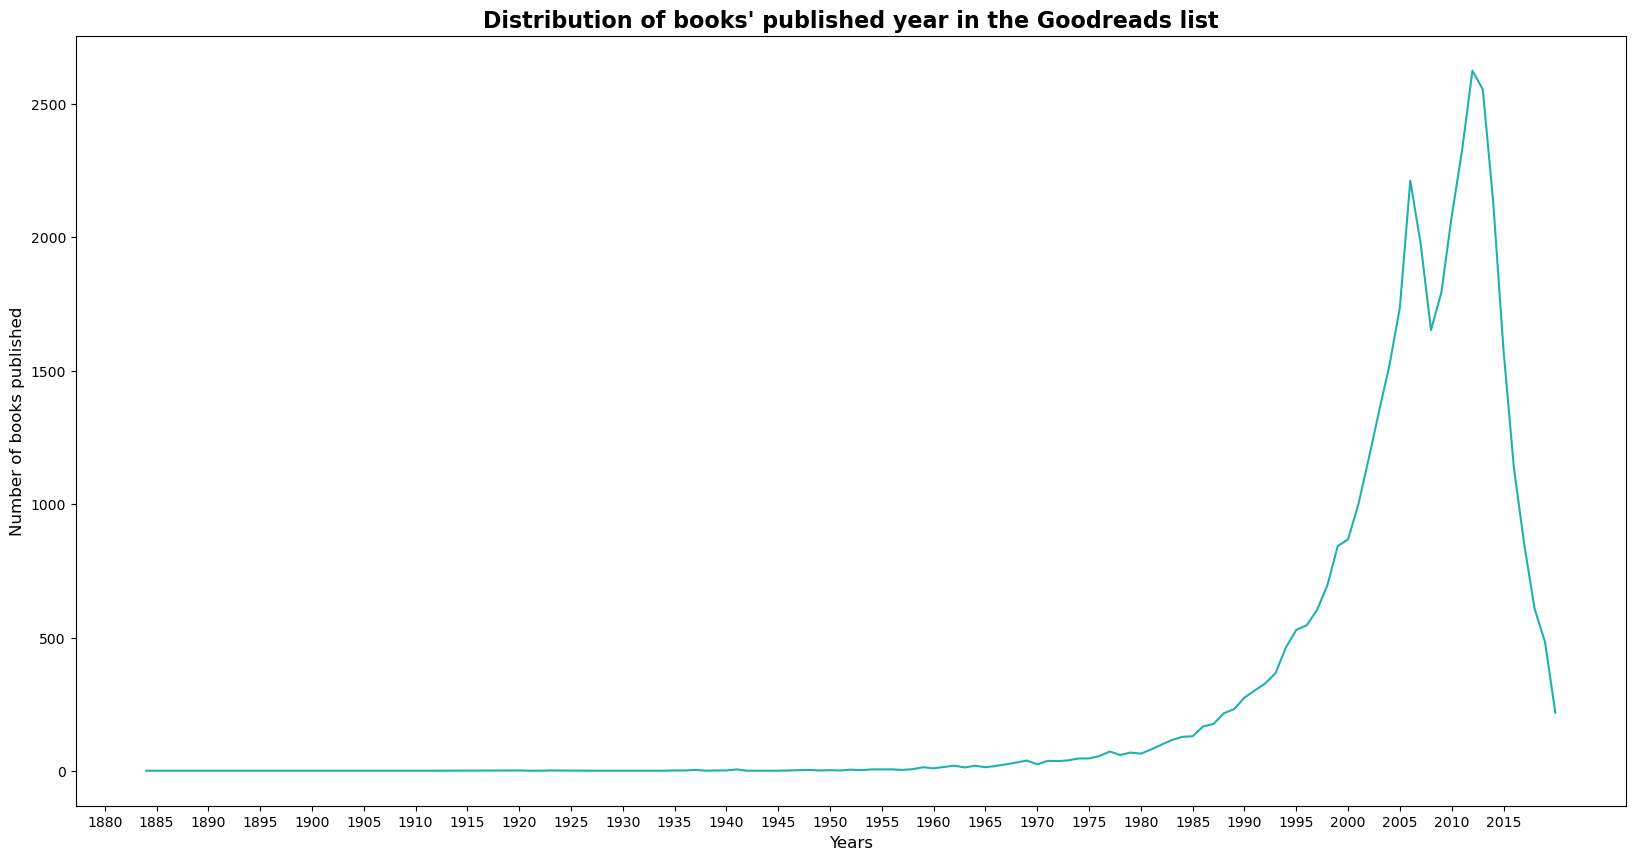

In [420]:
#distribtion
plt.figure()
books_df['publish_year'].value_counts().sort_index().plot(kind='line',figsize=(20,10), color='lightseagreen')
plt.title("Distribution of books' published year in the Goodreads list", weight='bold',fontsize=16)
plt.xlabel("Years", fontsize=12)
plt.xticks(range(1880,2020,5))
plt.ylabel("Number of books published", fontsize=12)
plt.show()

The published year of the books that made it to the GoodReads list seems to be mostly between 2000 and 2015, with a strange drop for books that were published in 2006-2007. After 2015, there seems the be less books that make it to the list.

This result is not necessarily suprising, more recent books might attract more readers and therefore their chances to make it to the Goodreads' list.

Let's check the books that were published in the 2000s and see if we can detect any anomalie on the date.

In [347]:
#Take a peak
books_df[['title','first_publish_date','publish_date','publish_date_converted','publish_year']][books_df['publish_year']>1999]

,title,first_publish_date,publish_date,publish_date_converted,publish_year
0,The Hunger Games,NaN,09/14/08,2008-09-14,2008
1,Harry Potter and the Order of the Phoenix,06/21/03,09/28/04,2004-09-28,2004
2,To Kill a Mockingbird,07/11/60,05/23/06,2006-05-23,2006
3,Pride and Prejudice,01/28/13,10/10/00,2000-10-10,2000
4,Twilight,2010-05-05,2009-06-06,2009-06-06,2009
...,...,...,...,...,...
39034,Unbelievable,March 30th 2013,April 11th 2013,2013-04-11,2013
39035,Anasazi,August 3rd 2011,August 5th 2011,2011-08-05,2011
39036,Marked,March 15th 2011,March 18th 2011,2011-03-18,2011
39037,Wayward Son,April 5th 2011,September 1st 2011,2011-09-01,2011


We know that some of those books were not published in the 2000s, like To Kill a Mockingbird. Frankly there is no way to tell if the date is in the correct century as the publish date is not the first publish date and it could be a new edition. We decide to keep the data as is knowing that it might not be perfect. 

Now that we have extracted the year out of the date, we can delete the publish-date and publish_date_converted columns.

In [348]:
#Dropping the columns
books_df.drop(['publish_date','publish_date_converted'],axis=1,inplace=True)

In [349]:
#Checking the shape
books_df.shape

(39039, 51)

We now have 39039 and 51 columns.

### 3.21 First Publish Date

In [350]:
#How many null values?
sum(books_df['first_publish_date'].isna())/books_df.shape[0]

0.3772381464689157

38% of the values are missing, and the format is just as messy as the previous column. Since we already have a date column, we decide to drop this column. It could be valuable to cross-check the publish_date and make sure the decade is correct, but this is beyond the scope of this project.

In [351]:
#Dropping the column
books_df.drop('first_publish_date',axis=1,inplace=True)

In [352]:
#Check the shape
books_df.shape

(39039, 50)

# 4. Final Clean up

Now that we have cleaned up the data and transform most of the non-numeric columns into numeric, we can start looking at some data insights.

Before we start, let's review one more time the data type of the columns.

In [353]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39039 entries, 0 to 39038
Data columns (total 50 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   book_id                       39039 non-null  object 
 1   title                         39039 non-null  object 
 2   avg_rating                    39039 non-null  float64
 3   description                   39039 non-null  object 
 4   pages                         39039 non-null  int64  
 5   num_ratings                   39039 non-null  int64  
 6   word_count_title              39039 non-null  int64  
 7   is_series                     39039 non-null  int64  
 8   main_author                   39039 non-null  object 
 9   book_count_by_author          39039 non-null  int64  
 10  word_count_description        39039 non-null  int64  
 11  genres_standardized_count     39039 non-null  int64  
 12  genre_Adult                   39039 non-null  int64  
 13  g

The only non-numeric columns are the book_id, the title, the author and the description. We don't need the book_id anymore (we can use the index) , so we'll drop it.

In [354]:
#dropping books_id
books_df.drop('book_id',axis=1,inplace=True)

### 4.1 Creating a binary variable for the target variable

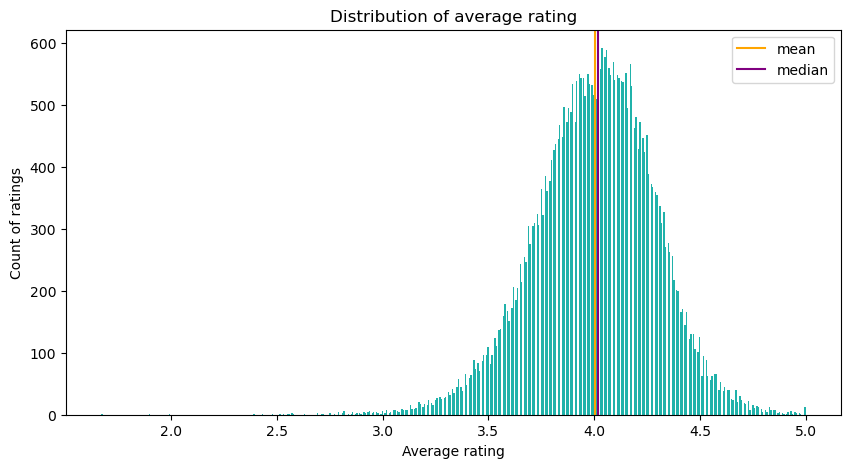

In [356]:
#Looking at the distribution of the average rating again
plt.figure(figsize=(10,5))
plt.hist(books_df['avg_rating'],bins=500, color='lightseagreen')
plt.axvline(books_df['avg_rating'].mean(),color='orange',label='mean')
plt.axvline(books_df['avg_rating'].median(),color='purple',label='median')
plt.legend()
plt.title("Distribution of average rating")
plt.xlabel("Average rating")
plt.ylabel("Count of ratings")
plt.show()

In [357]:
books_df['avg_rating'].describe()

count    39039.000000
mean         4.003647
std          0.285354
min          1.670000
25%          3.820000
50%          4.020000
75%          4.200000
max          5.000000
Name: avg_rating, dtype: float64

Since the median is 4.02, we could split the ratings between less than 4 as not popular, and more than 4 as popular. Let's see what this gives us:

In [358]:
#Calcuating the class balance
print("Percentage of books with an avg rating of 4 or less: ",sum(books_df['avg_rating']<=4.00)/books_df.shape[0]*100)
print("Percentage of books with an avg rating above 4: ",sum(books_df['avg_rating']>4.00)/books_df.shape[0]*100)

Percentage of books with an avg rating of 4 or less:  48.433617664386894
Percentage of books with an avg rating above 4:  51.566382335613106


We can create a new boolean column is_popular.

In [359]:
#Creating the new column
books_df['is_popular']=np.where(books_df['avg_rating']<=4.00,0,1)
books_df['is_popular'].value_counts(normalize=True)

1    0.515664
0    0.484336
Name: is_popular, dtype: float64

In [360]:
#Changing to int
books_df['is_popular']=books_df['is_popular'].astype('int64')

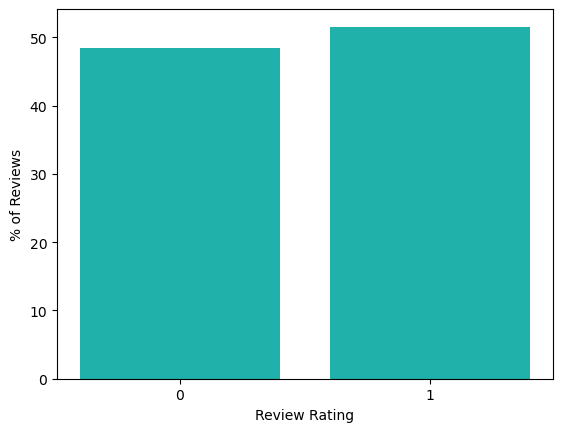

Class imbalance: [0.48 0.52]


In [361]:
#Plotting to visualize

values, counts = np.unique(books_df['is_popular'], return_counts=True)
normalized_counts = counts/counts.sum()

plt.figure()
plt.bar(["0", "1"], normalized_counts*100, color='lightseagreen') # plot normalized counts
plt.xlabel('Review Rating')
plt.ylabel('% of Reviews')
plt.show()

print(f"Class imbalance: {np.round(normalized_counts, 2)}")

That's great! Our target variable is pretty well balanced.

We can now run some visualizations to explore more of the relationships between variables.

### 4.2 Visualizations

#### 4.2.1 Final distribution

In [362]:
numeric_columns=books_df.columns.to_list()

In [363]:
numeric_columns.remove('title')
numeric_columns.remove('description')
numeric_columns.remove('main_author')

In [364]:
numeric_columns

['avg_rating',
 'pages',
 'num_ratings',
 'word_count_title',
 'is_series',
 'book_count_by_author',
 'word_count_description',
 'genres_standardized_count',
 'genre_Adult',
 'genre_Adventure',
 'genre_Biography',
 'genre_Childrens',
 'genre_Classics',
 'genre_Contemporary',
 'genre_Fantasy',
 'genre_Fiction',
 'genre_Historical',
 'genre_Historical Fiction',
 'genre_History',
 'genre_Horror',
 'genre_Islam',
 'genre_Literature',
 'genre_Magic',
 'genre_Mystery',
 'genre_Nonfiction',
 'genre_Novels',
 'genre_Paranormal',
 'genre_Poetry',
 'genre_Romance',
 'genre_Science Fiction',
 'genre_Thriller',
 'genre_Urban',
 'genre_Young Adult',
 'genre_Other',
 'format_Audiobook',
 'format_Hardcover',
 'format_Mass Market Paperback',
 'format_Paperback',
 'format_ebook',
 'has_awards',
 'five_stars',
 'four_stars',
 'three_stars',
 'two_stars',
 'one_star',
 'publish_year',
 'is_popular']

We can run a loop over the numeric columns to plot the distribution. Note that the scale is different for each column and that the plots might always look the best, but that can give us an idea of the final distribution nonetheless.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


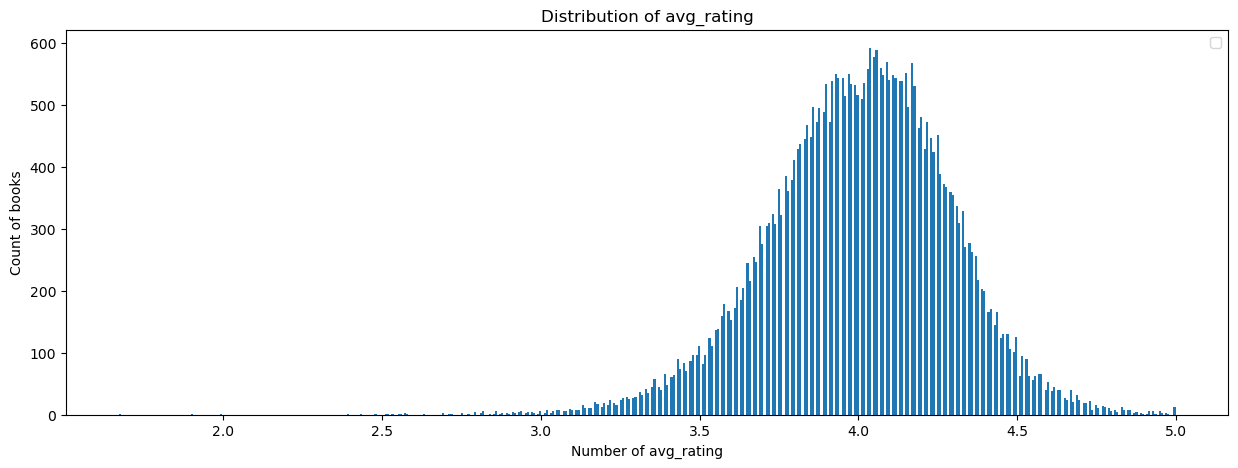

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


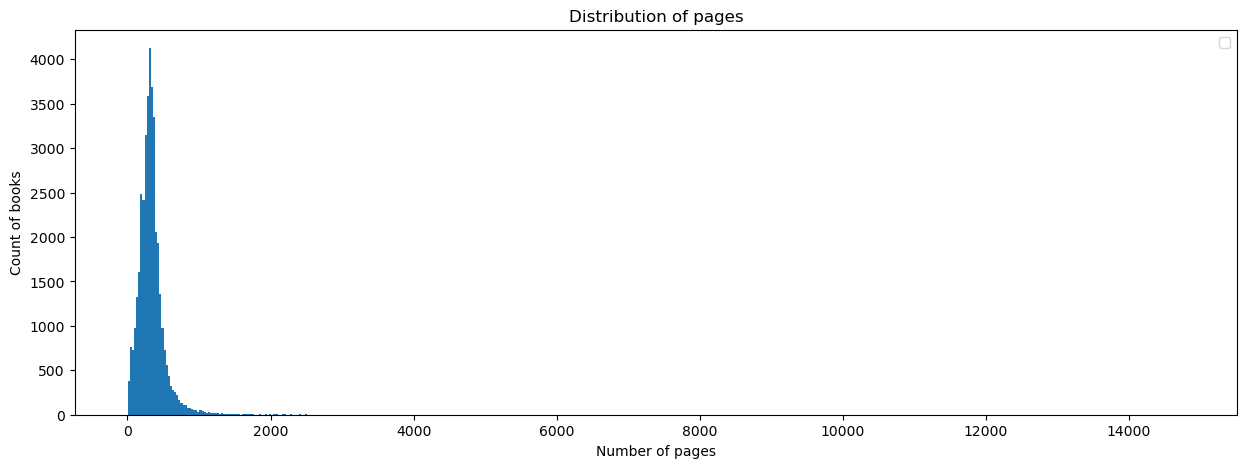

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


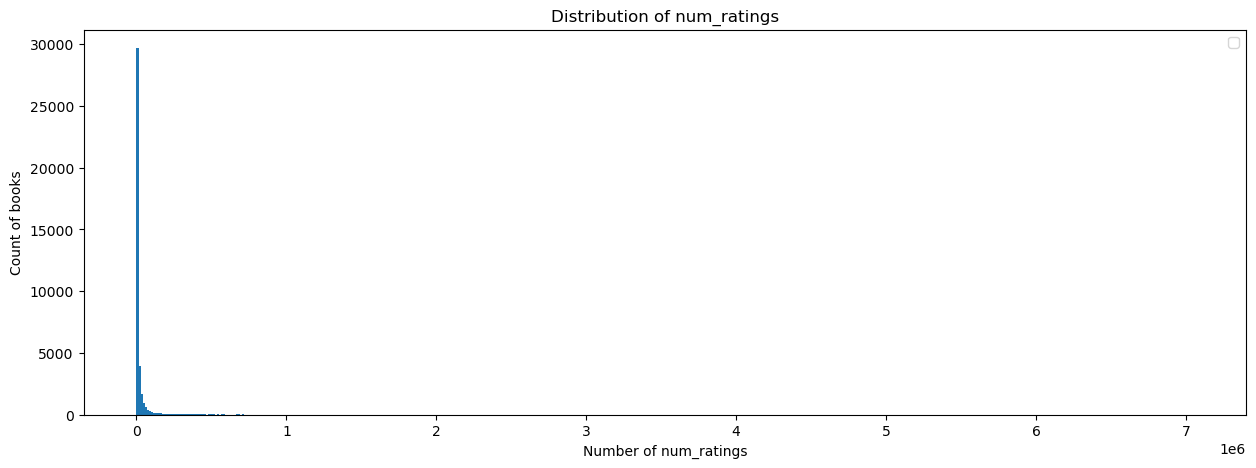

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


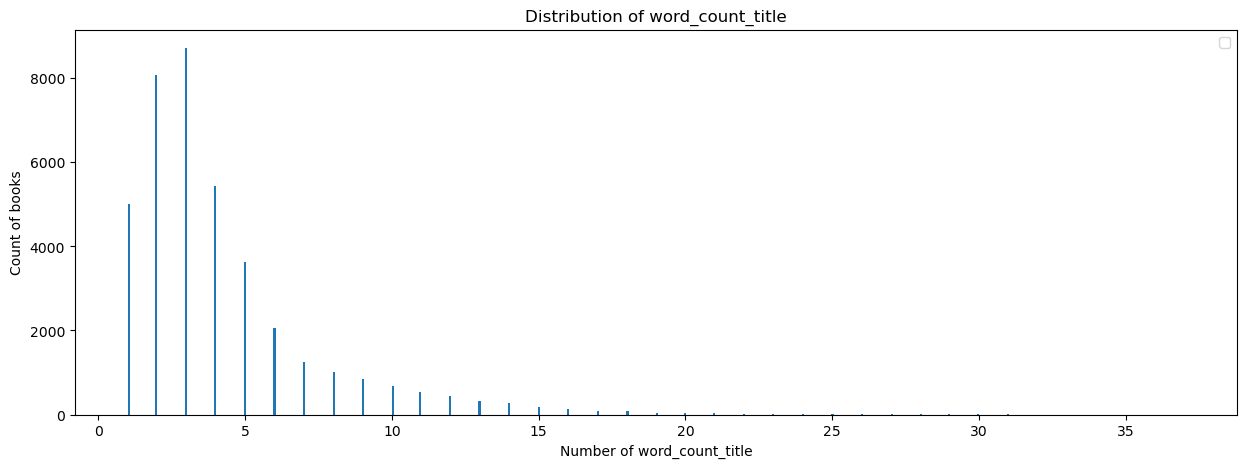

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


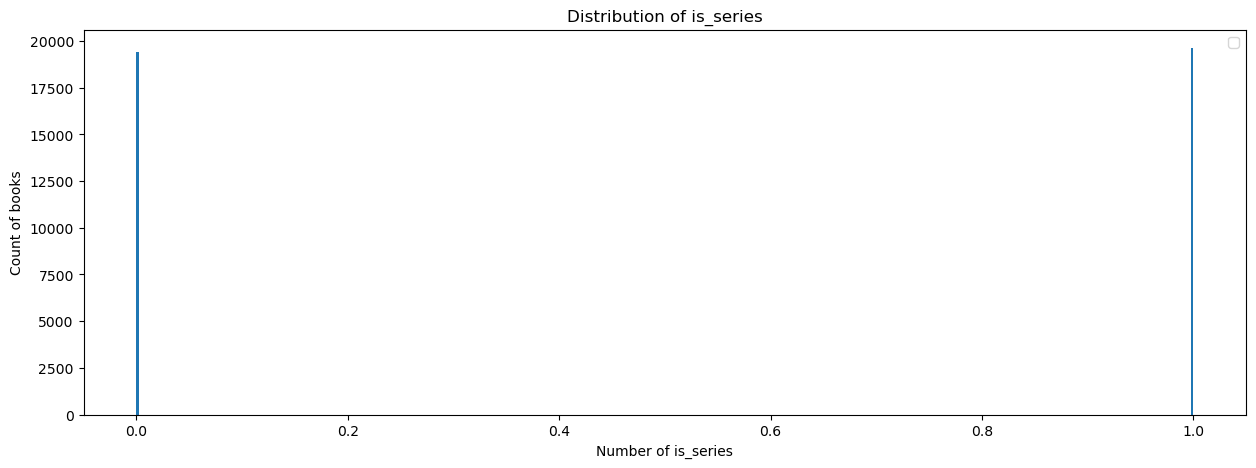

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


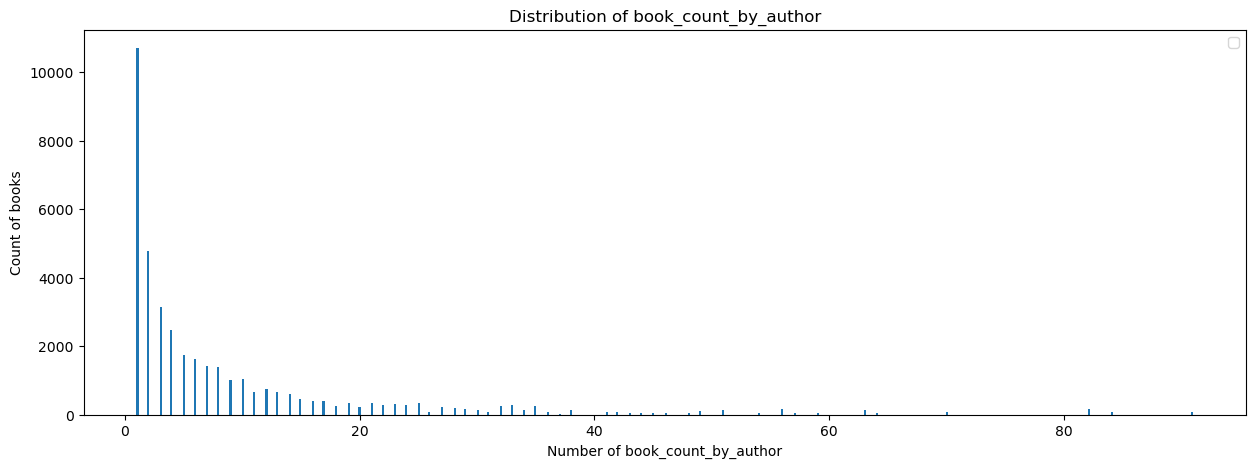

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


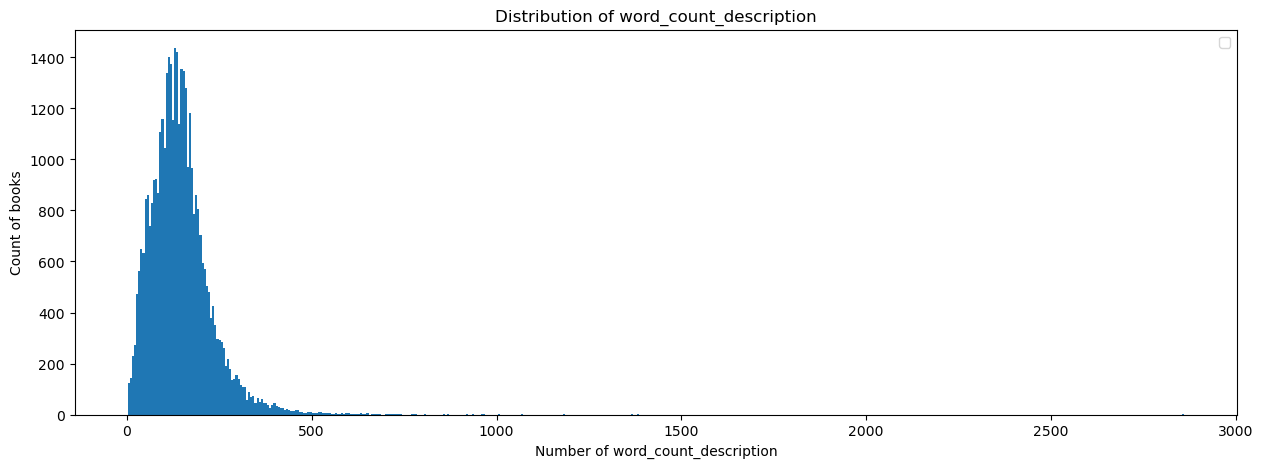

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


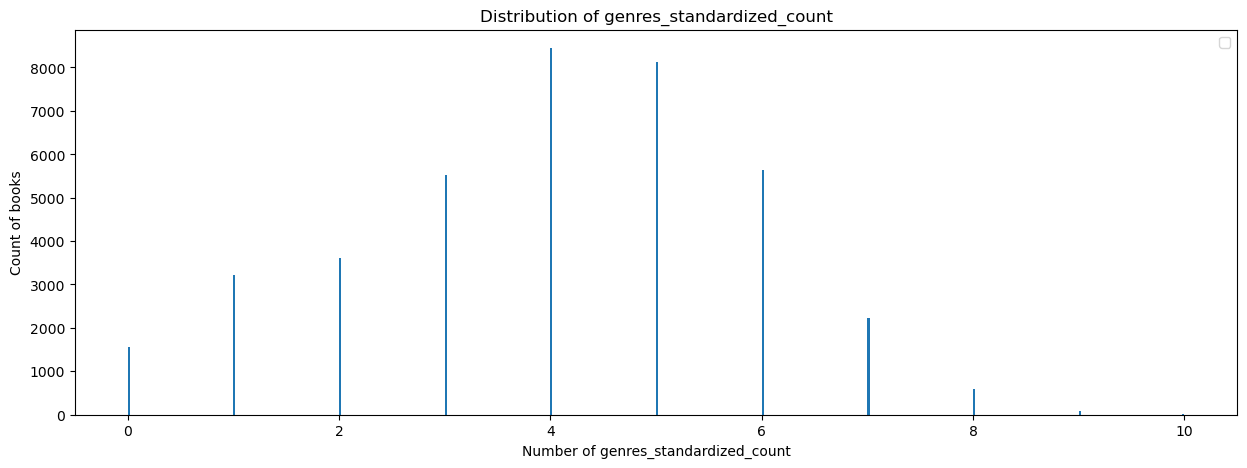

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


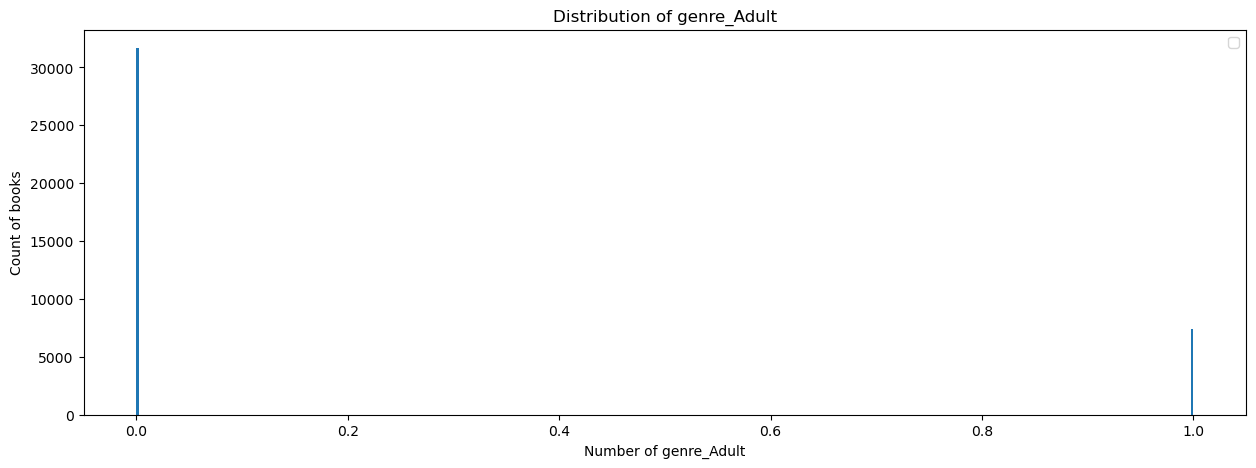

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


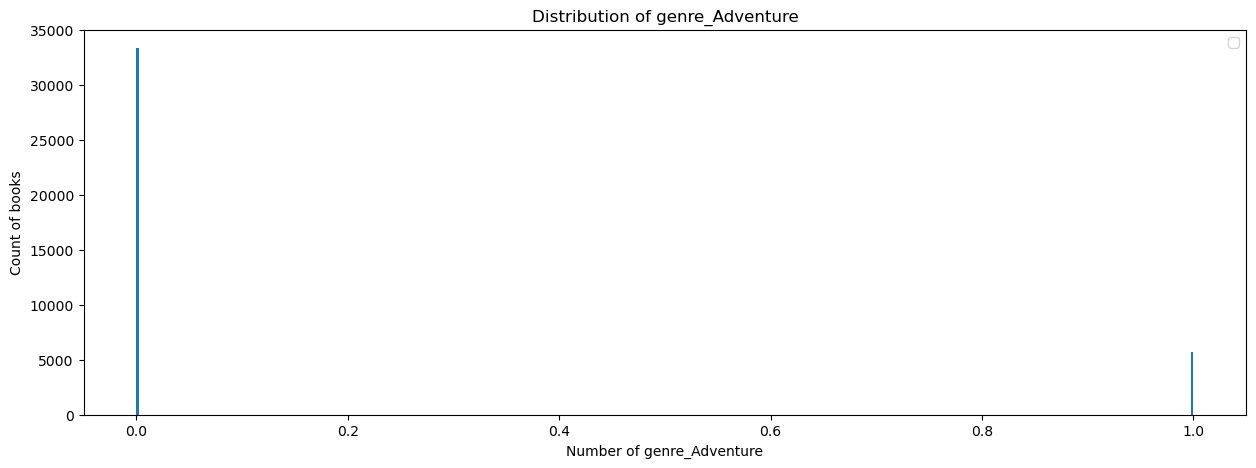

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


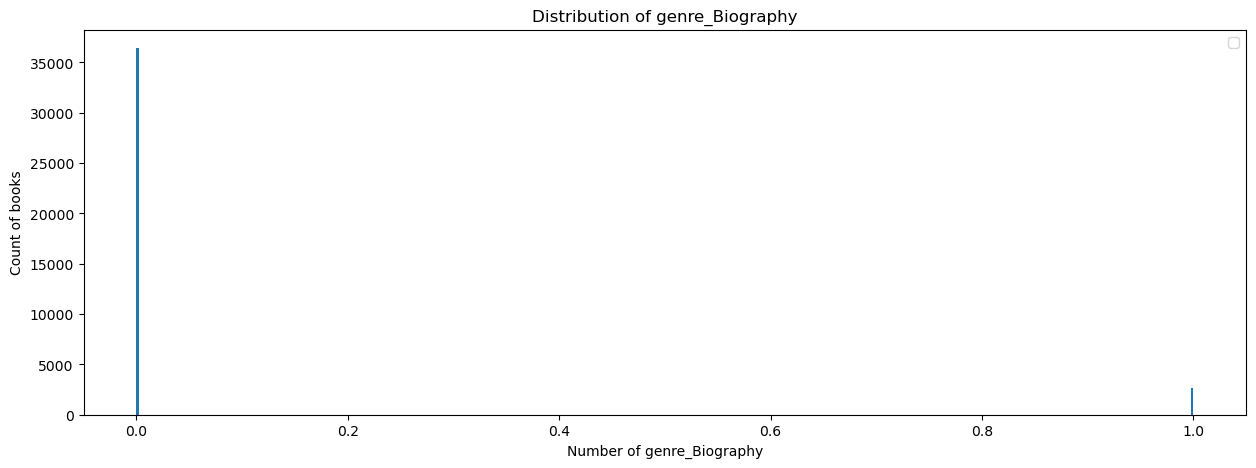

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


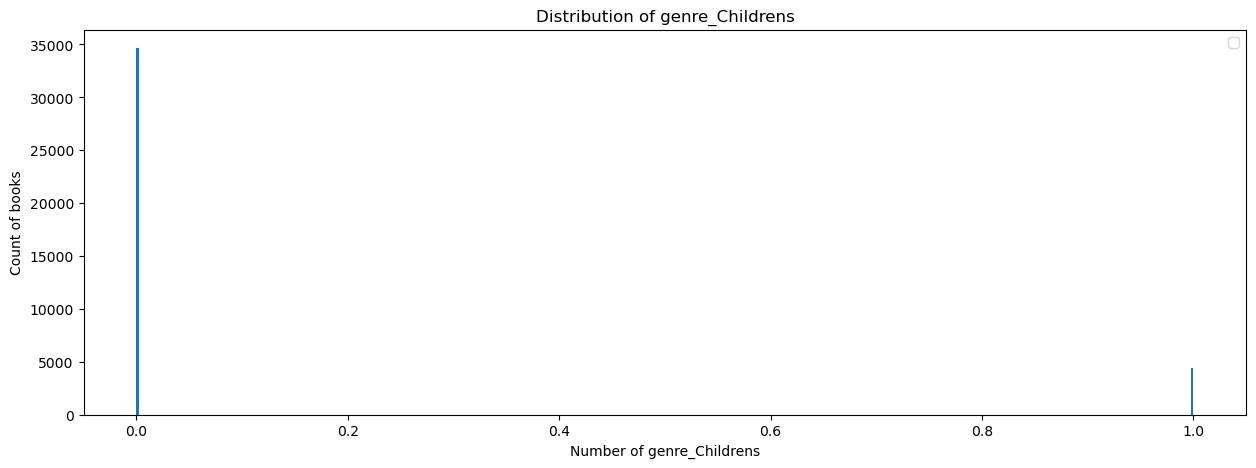

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


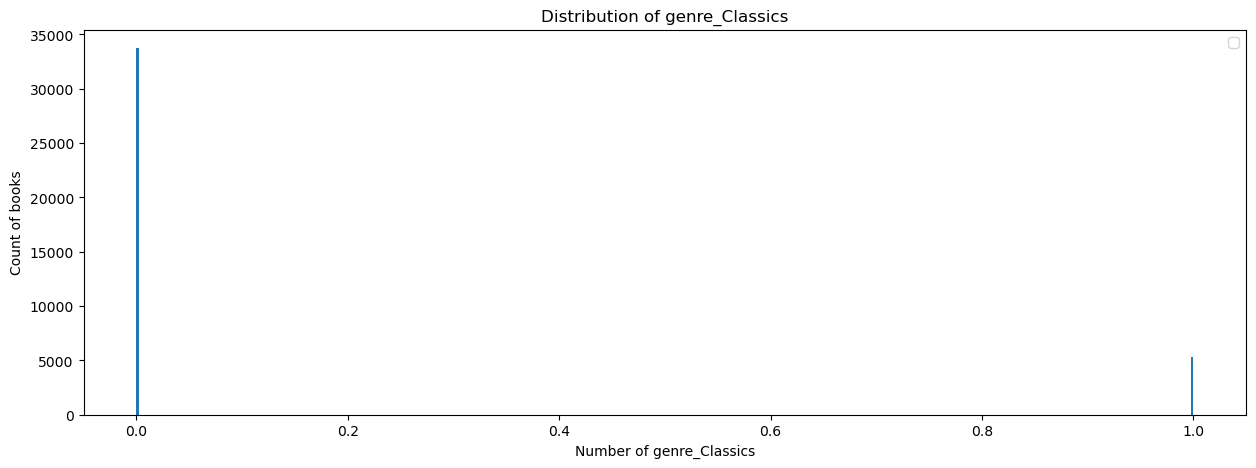

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


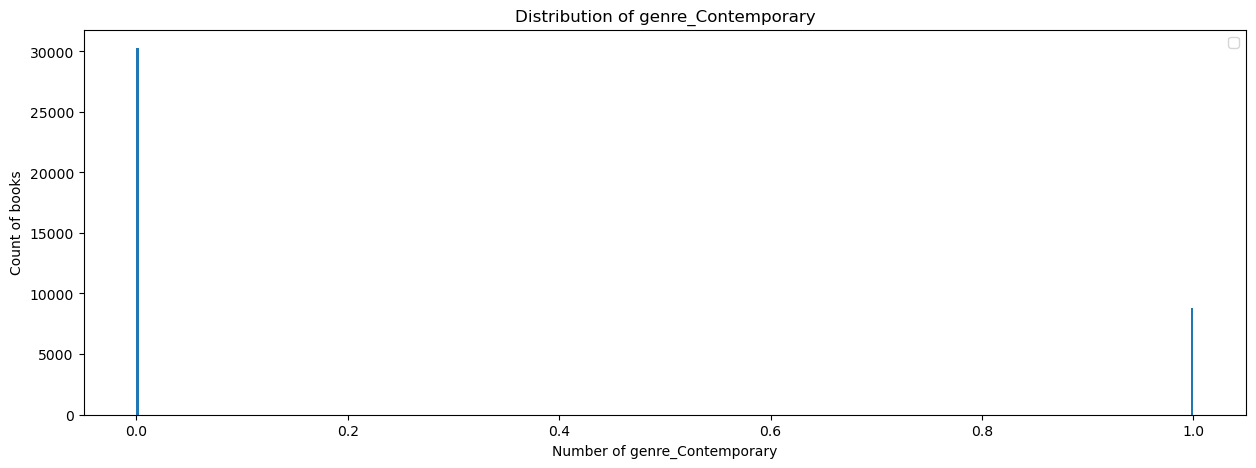

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


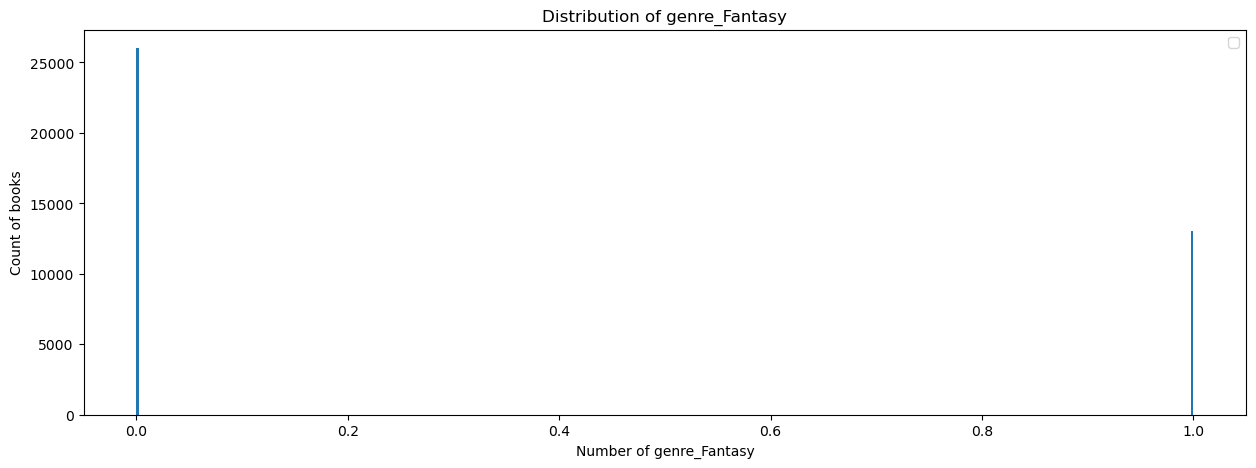

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


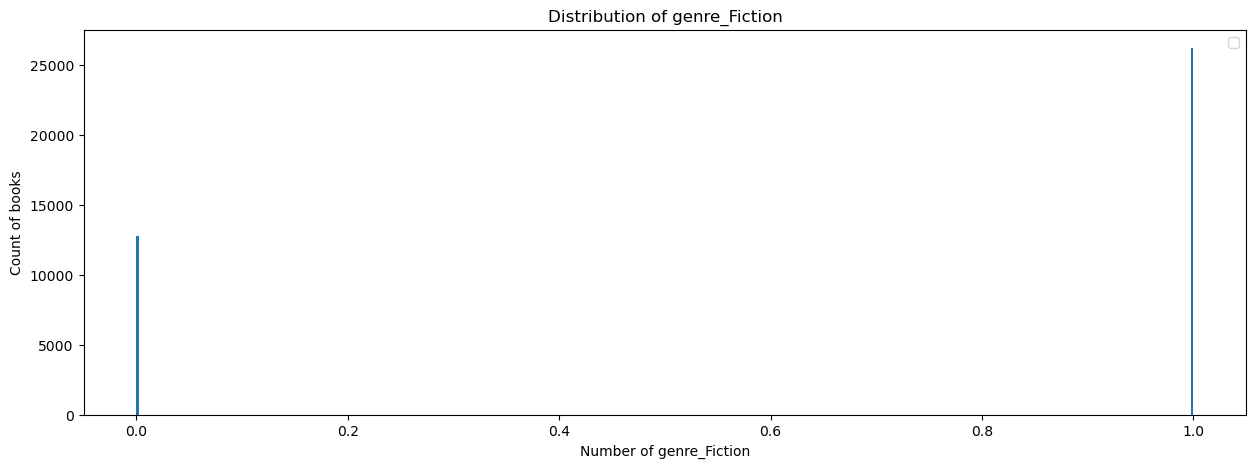

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


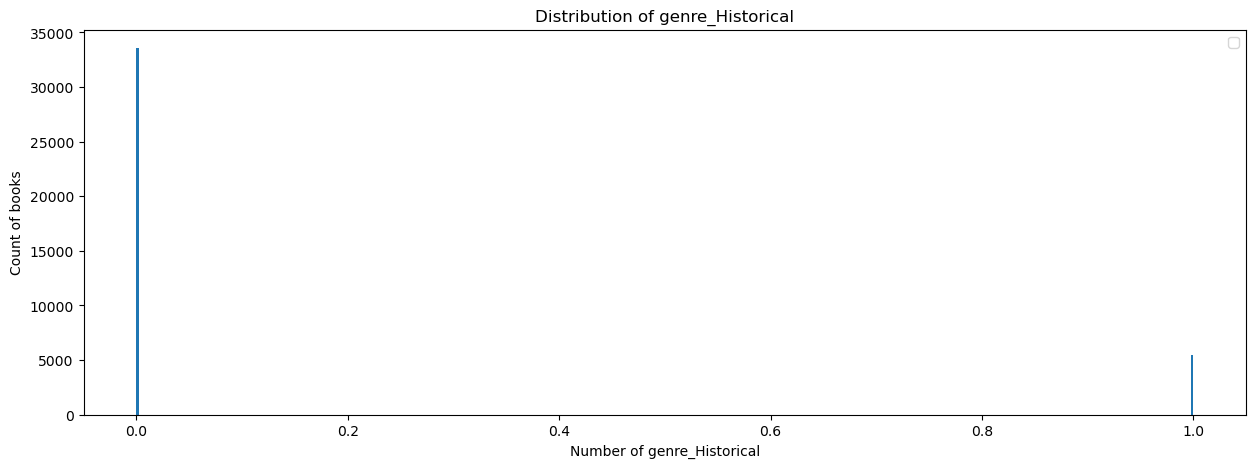

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


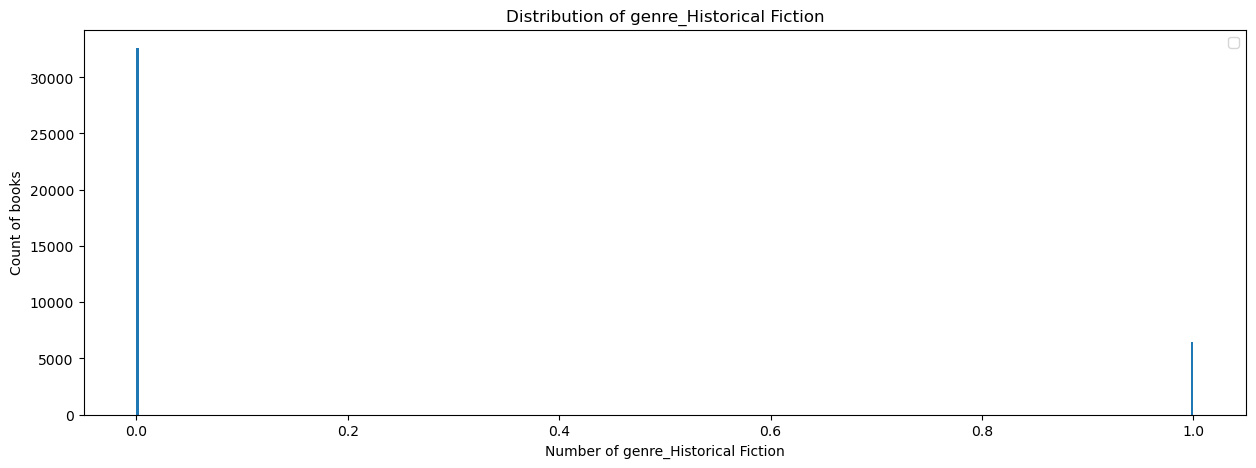

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


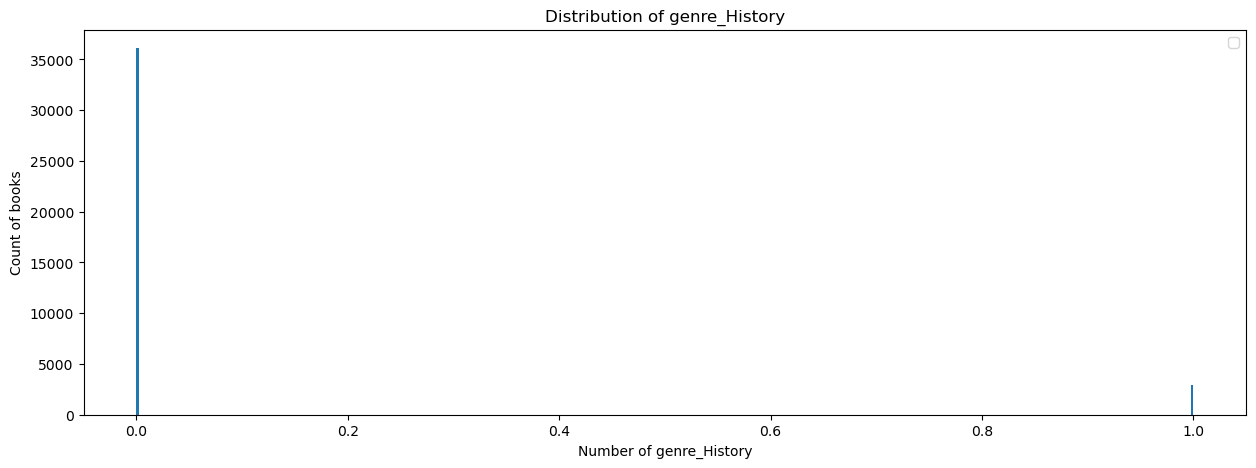

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


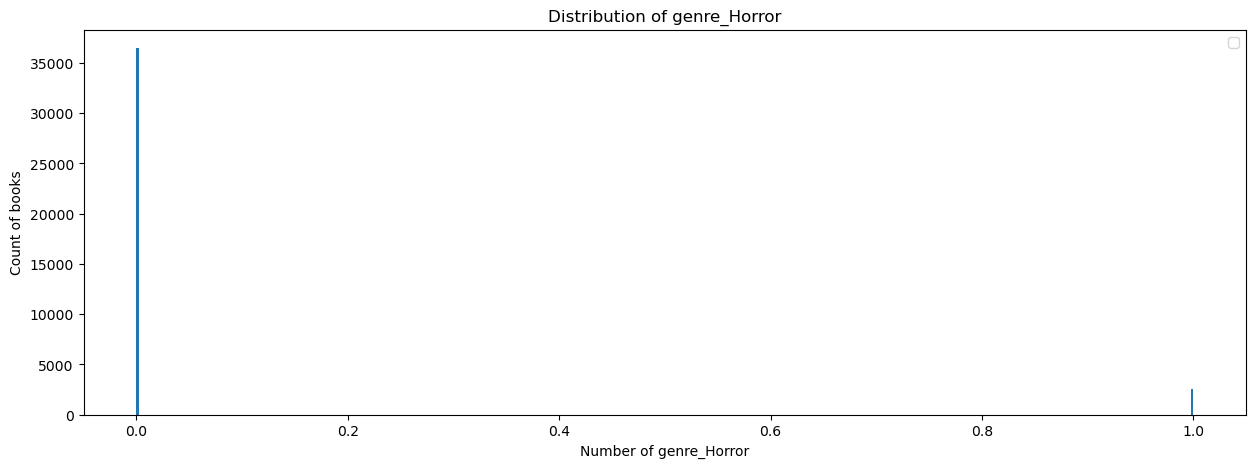

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


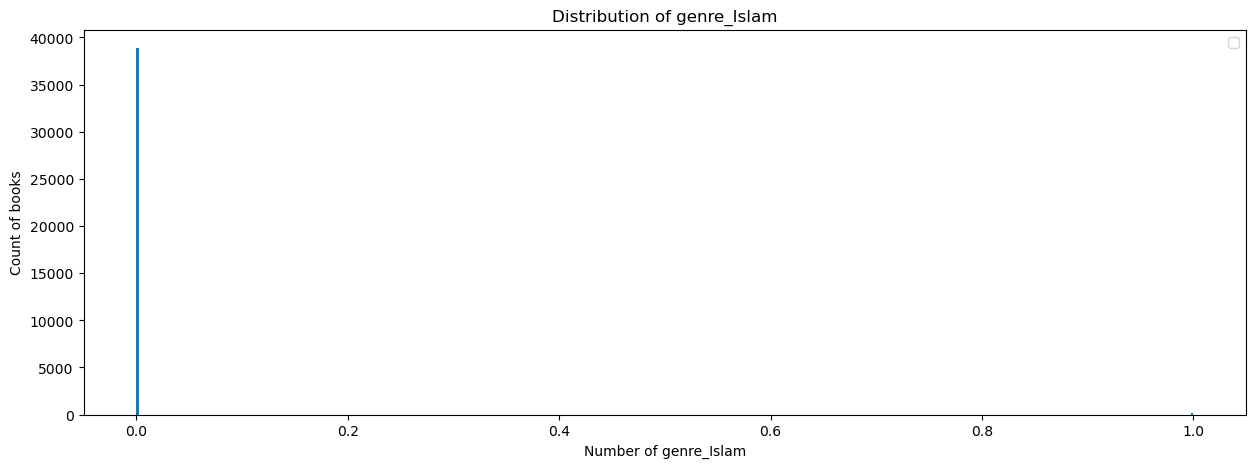

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


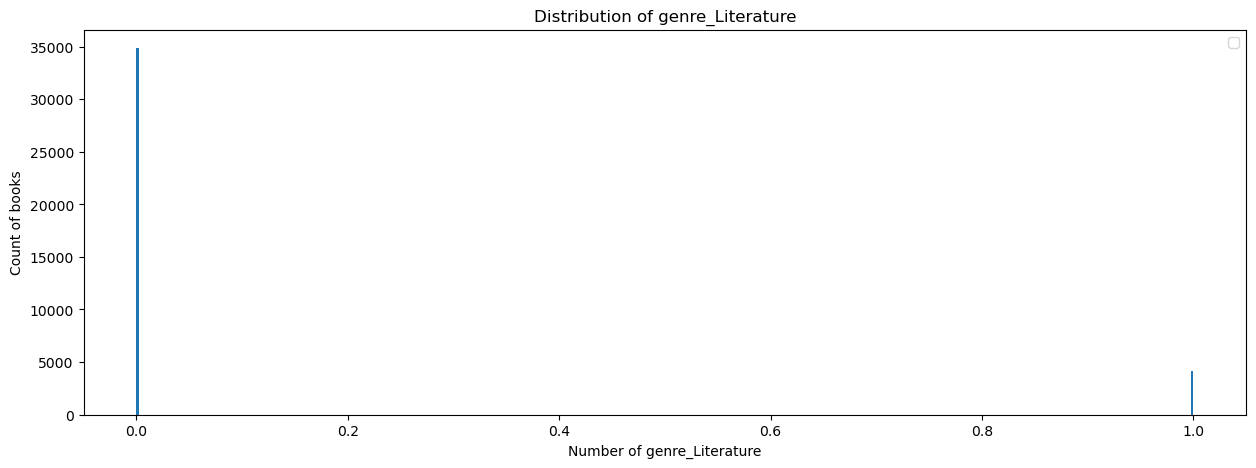

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


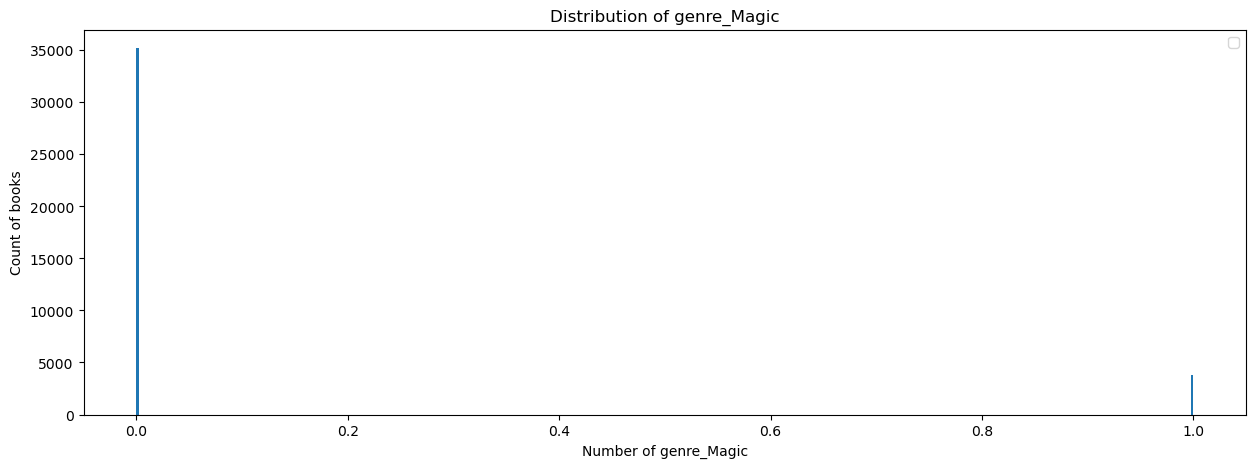

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


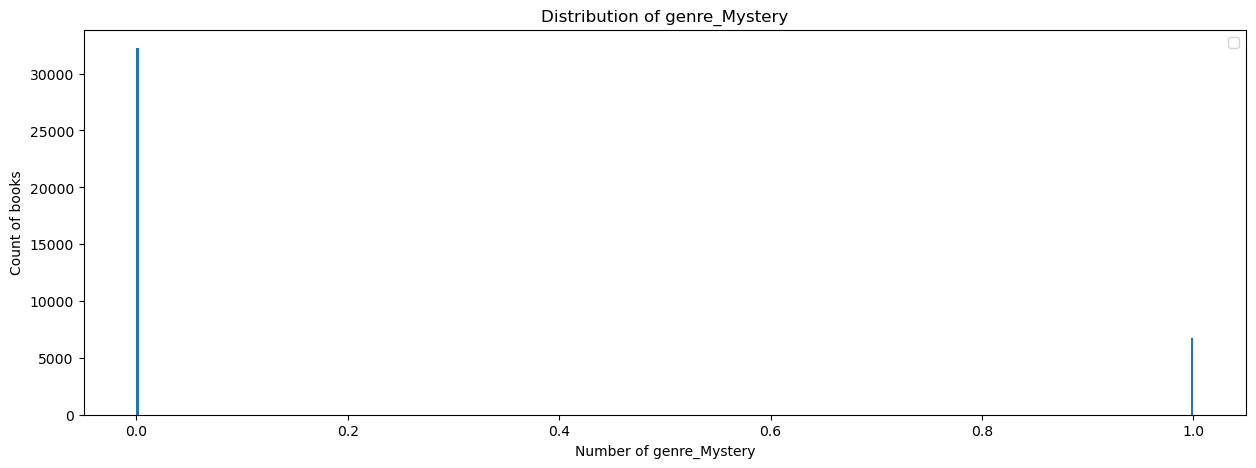

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


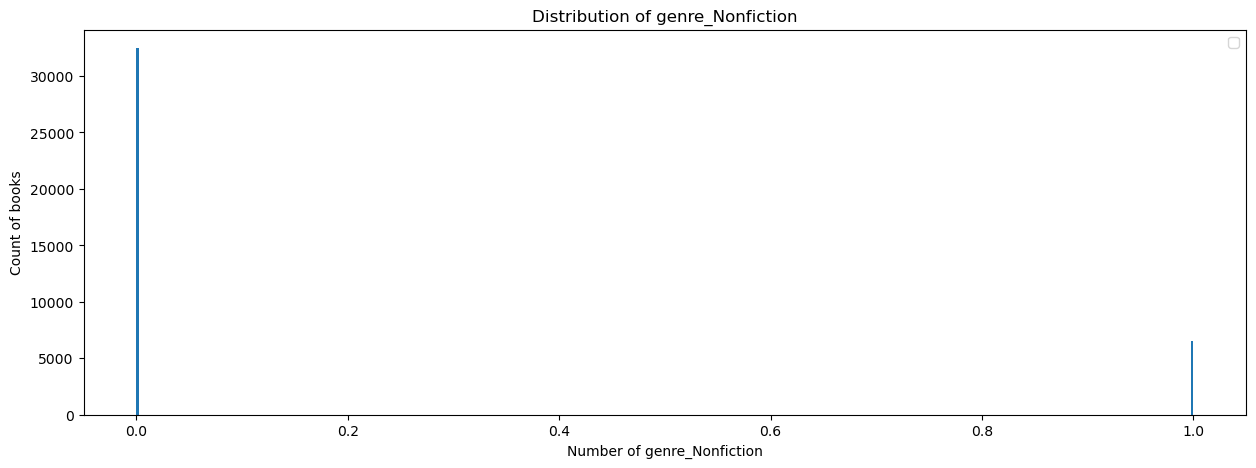

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


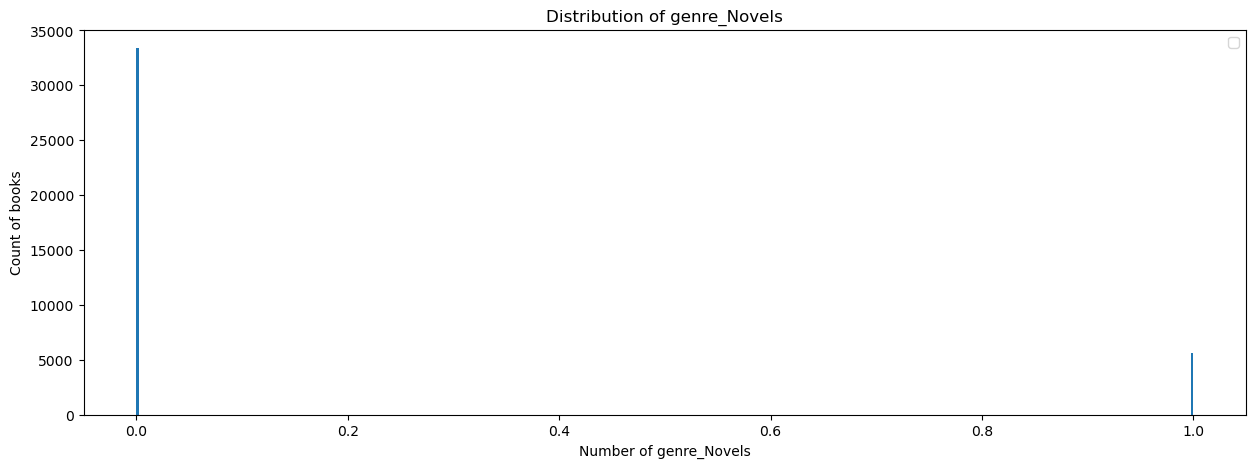

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


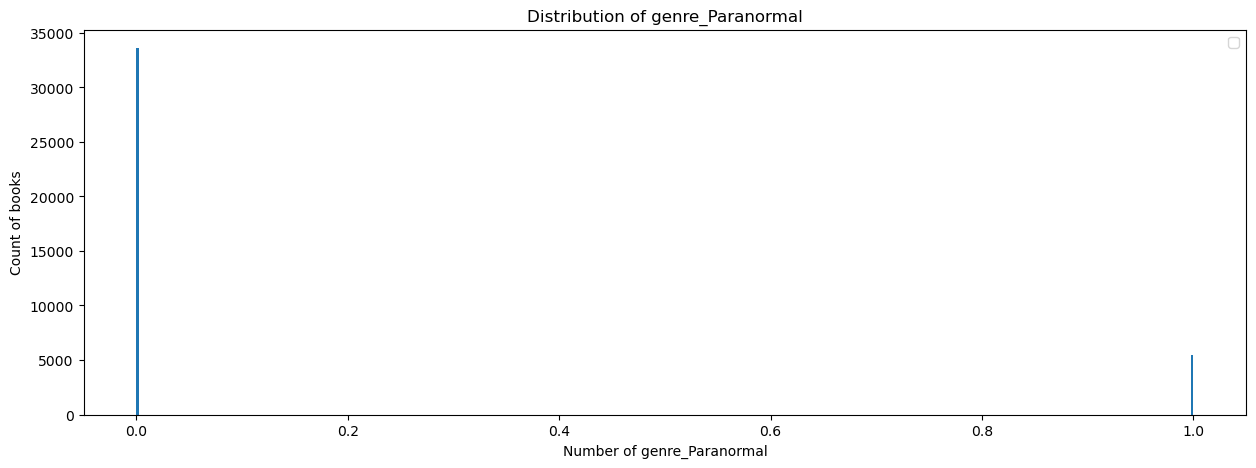

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


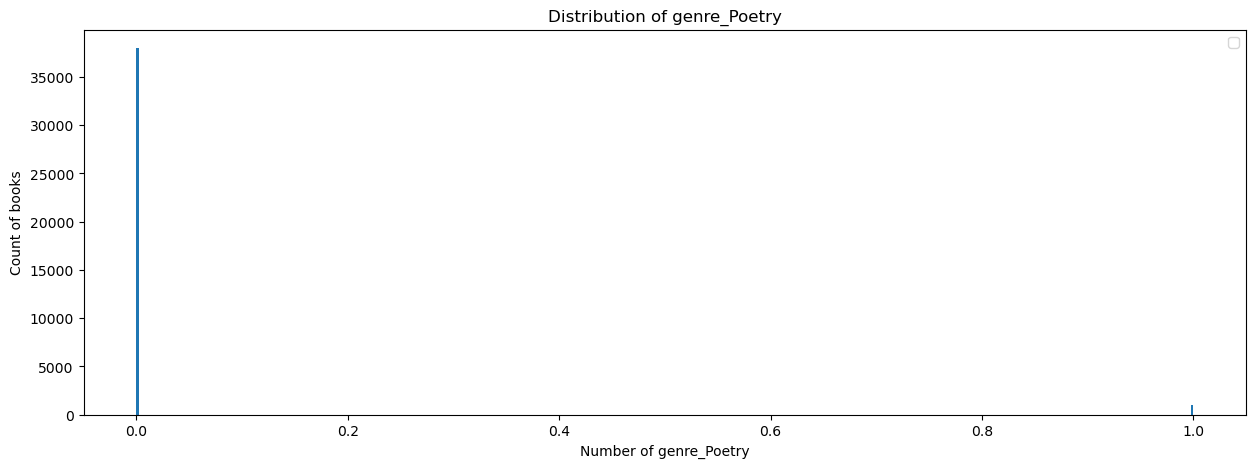

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


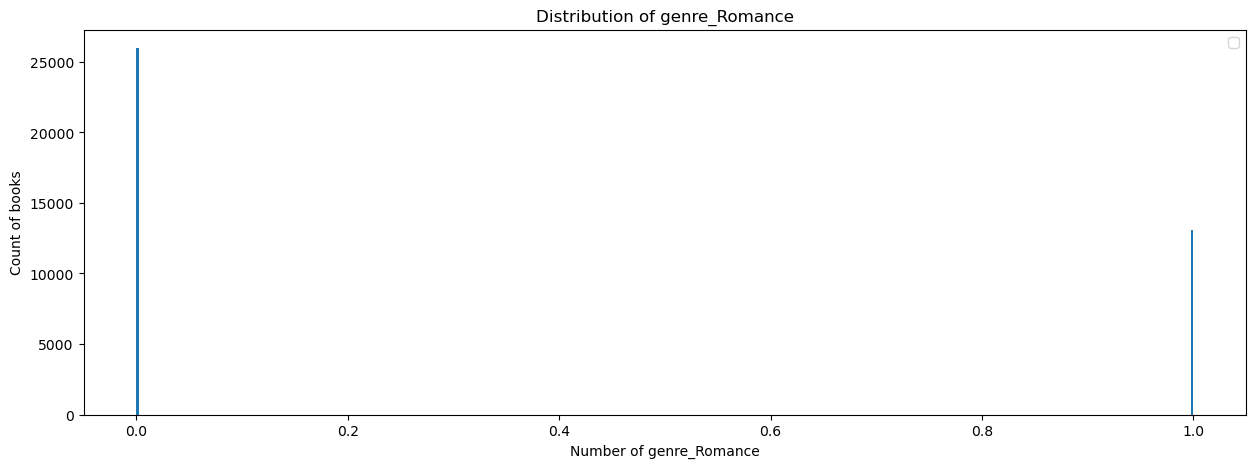

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


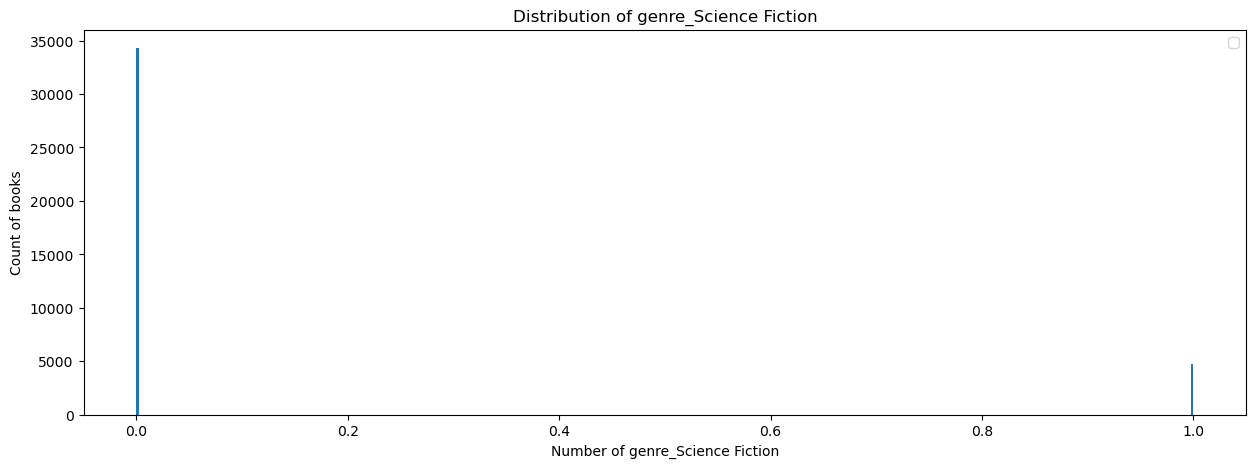

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


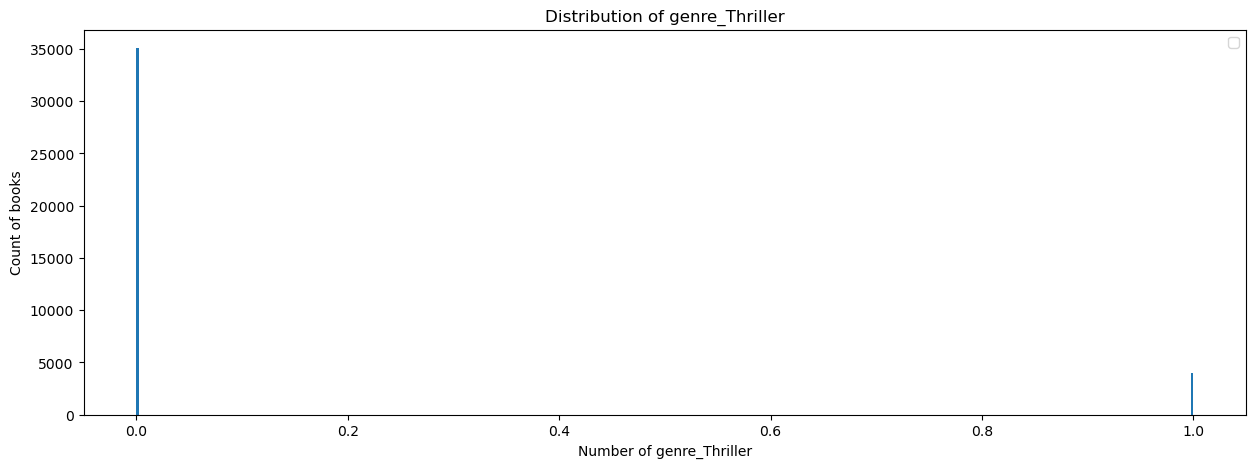

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


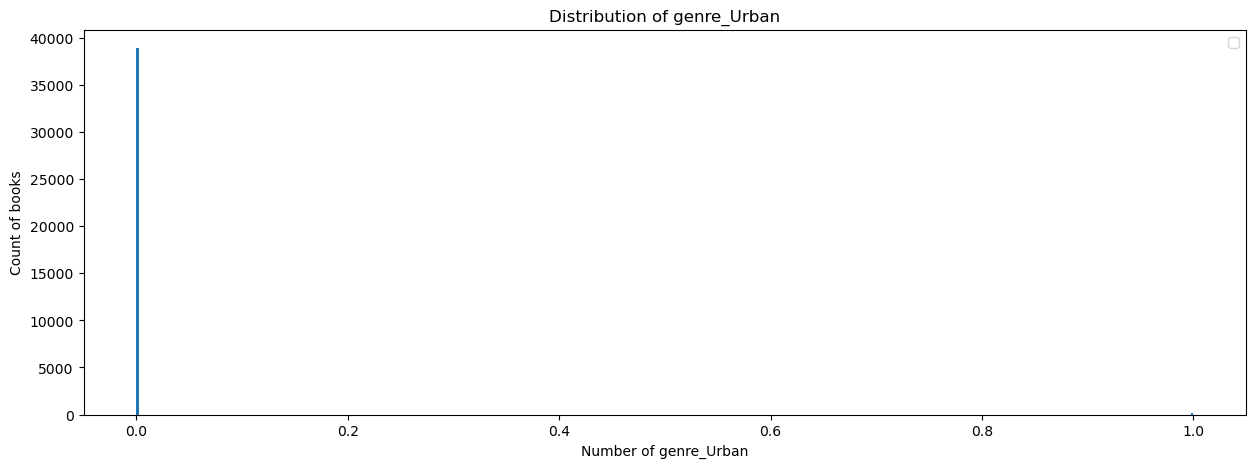

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


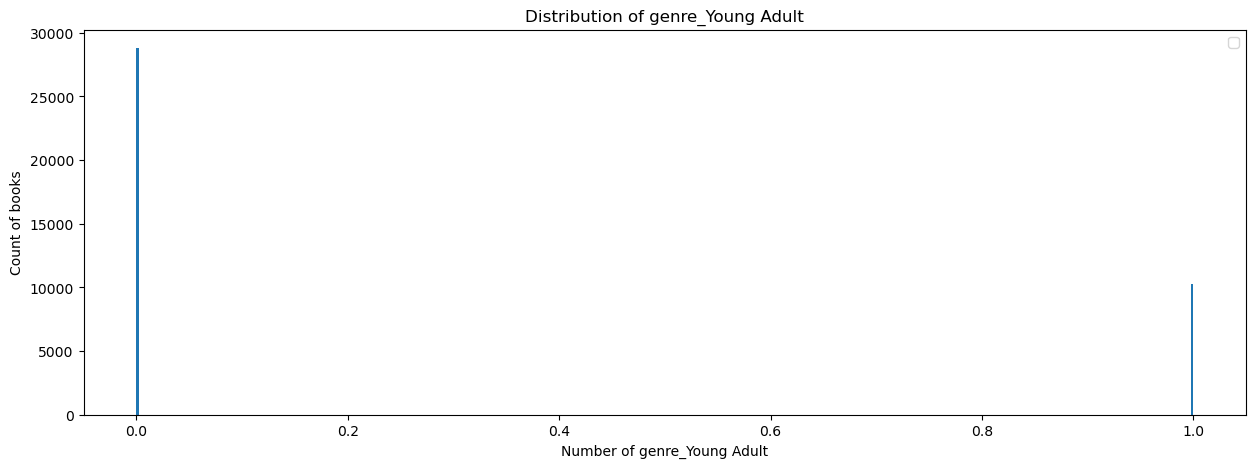

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


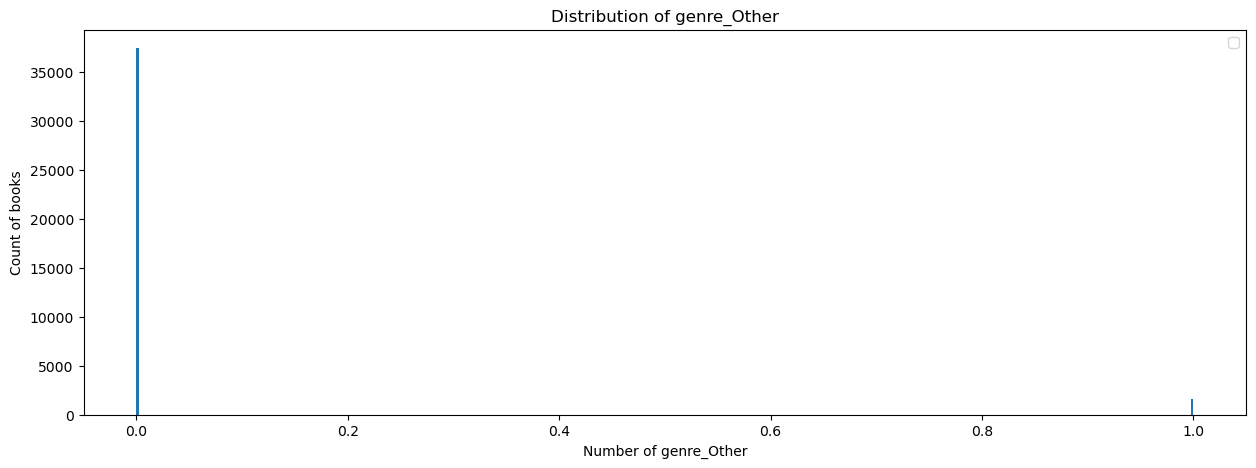

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


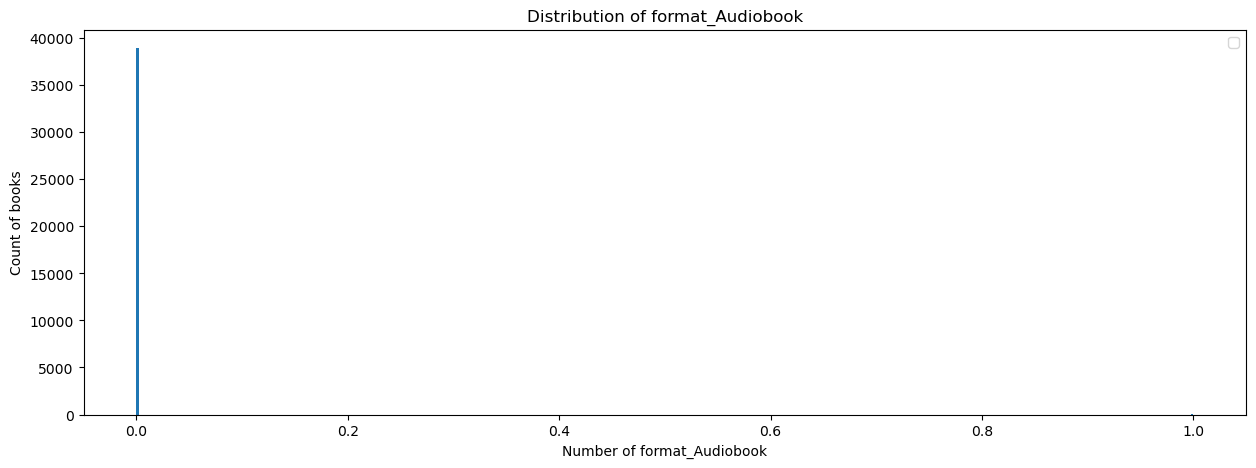

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


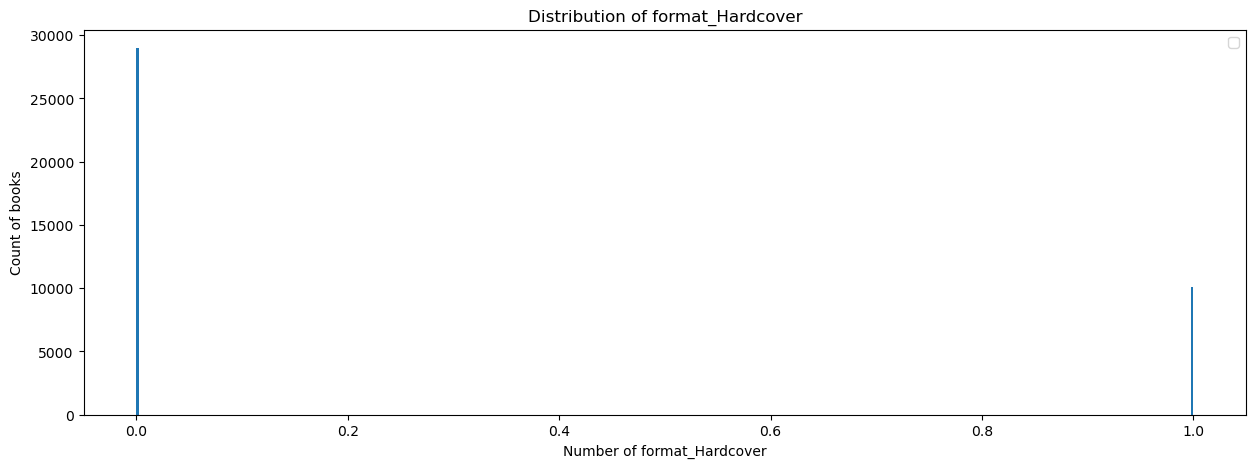

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


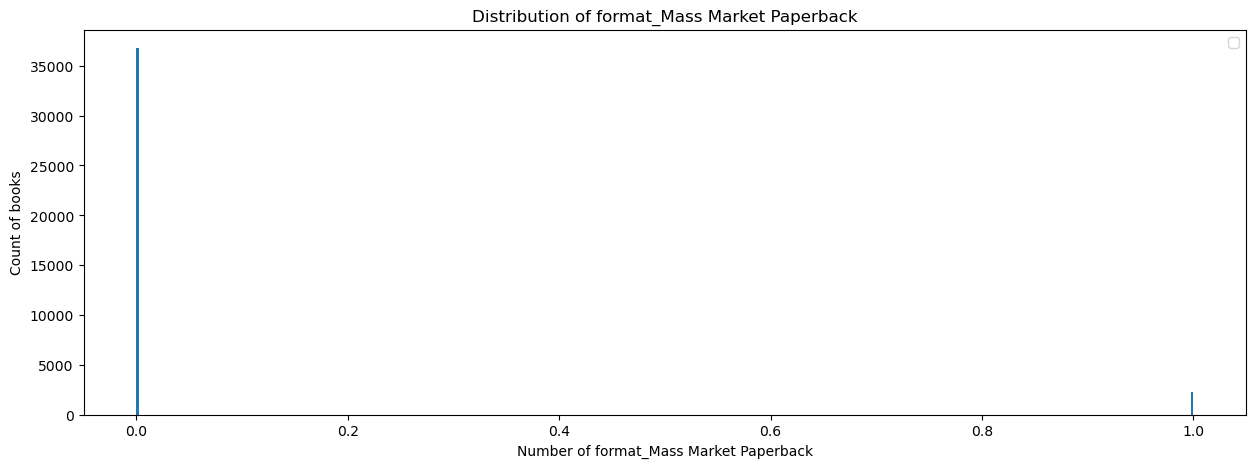

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


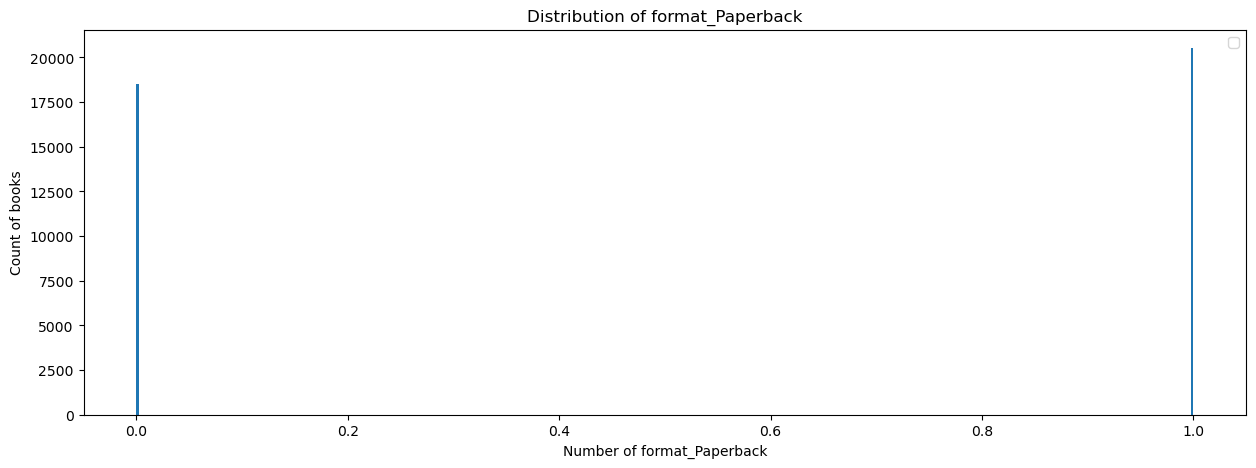

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


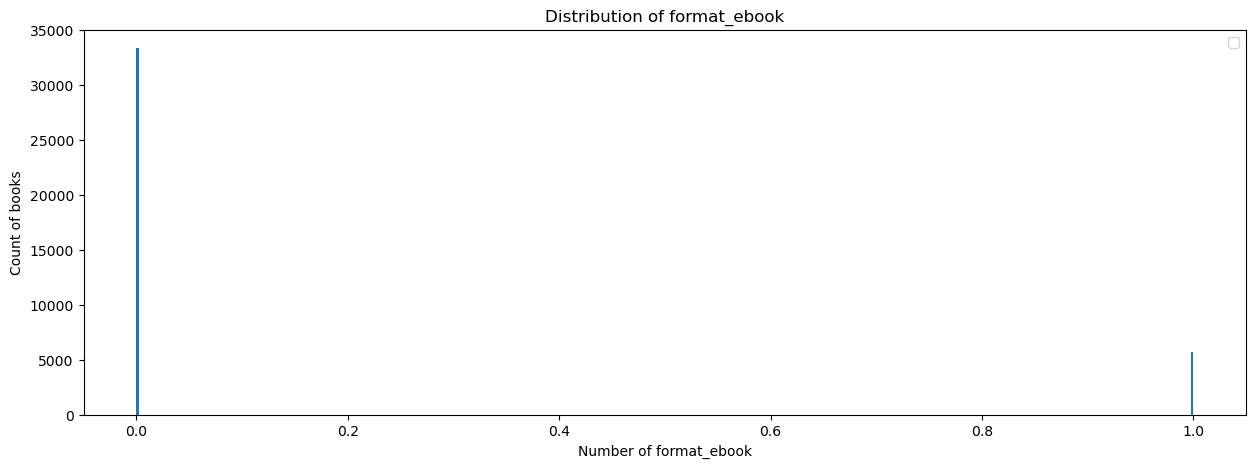

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


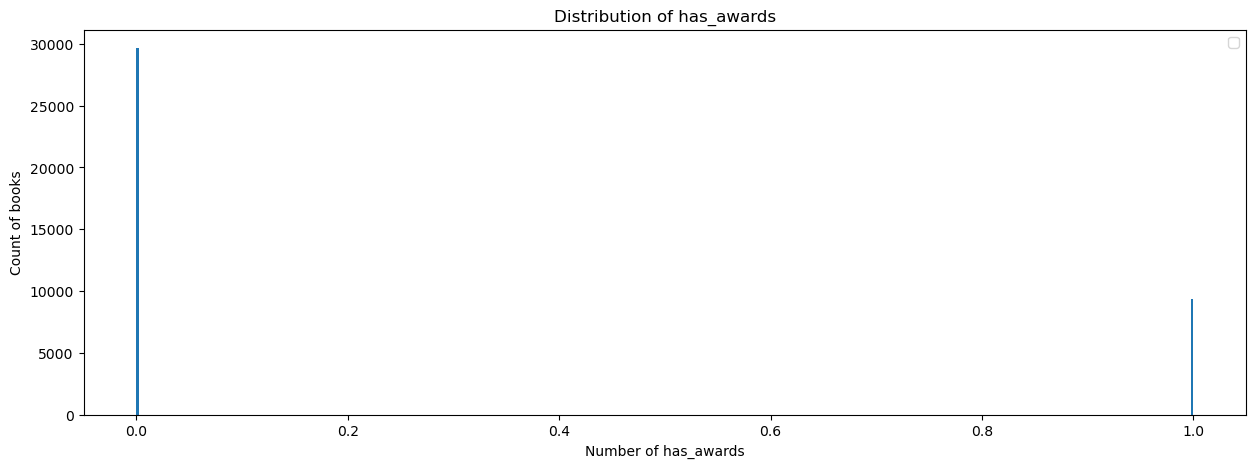

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


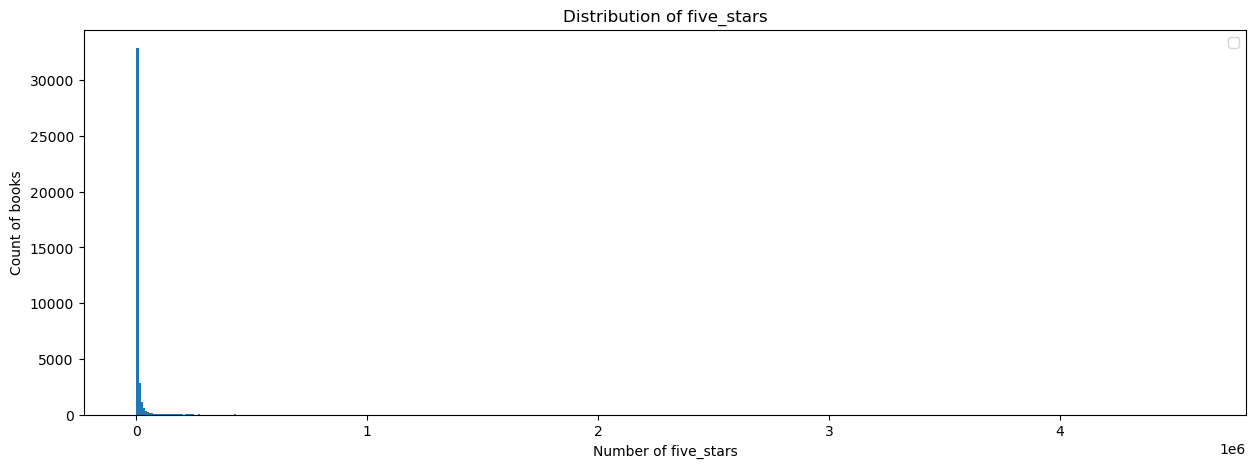

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


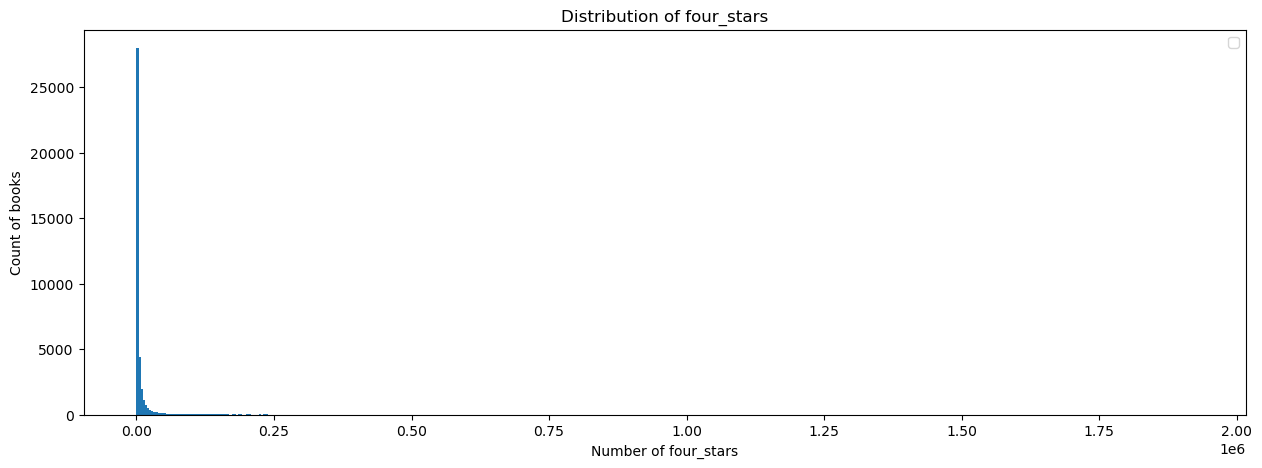

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


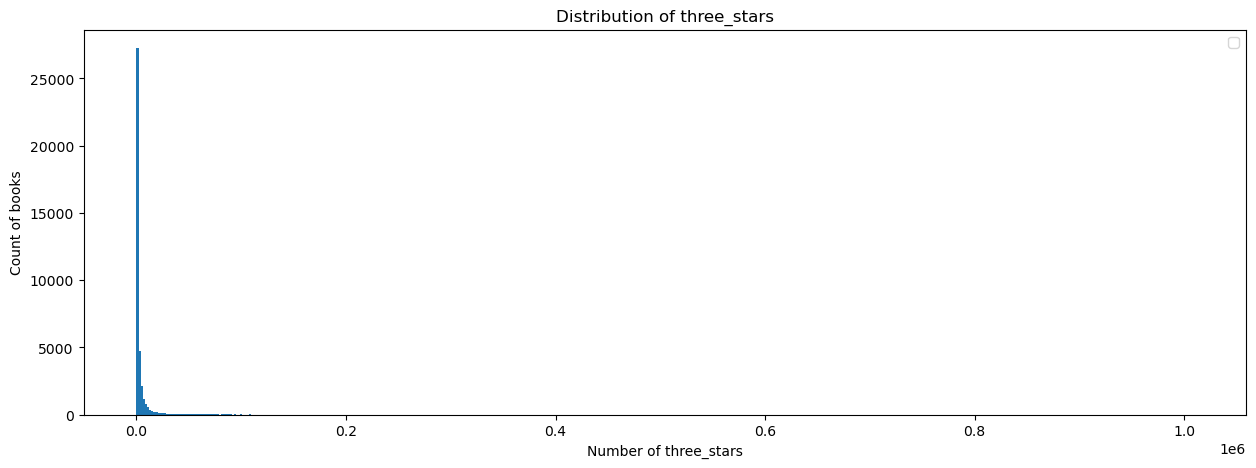

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


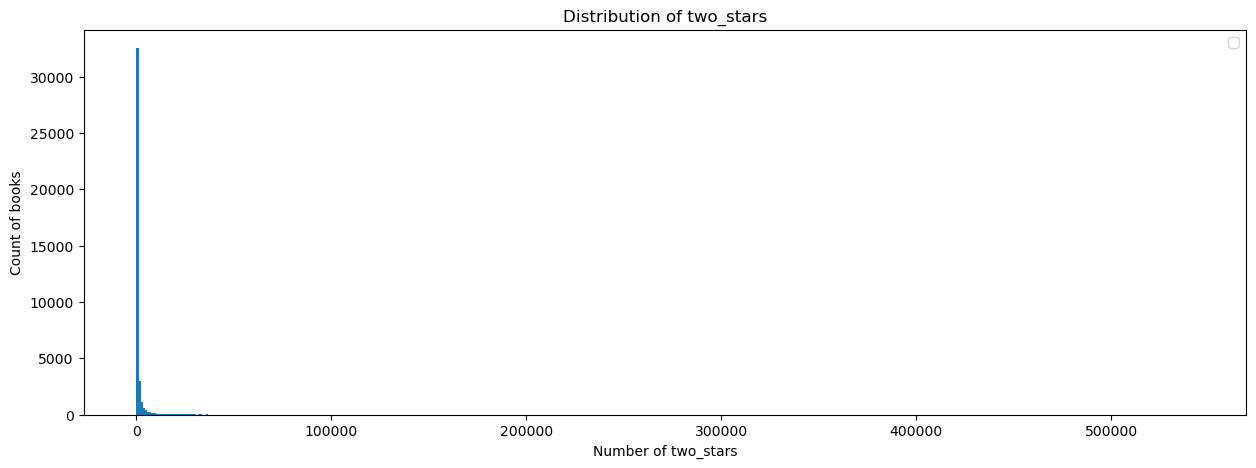

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


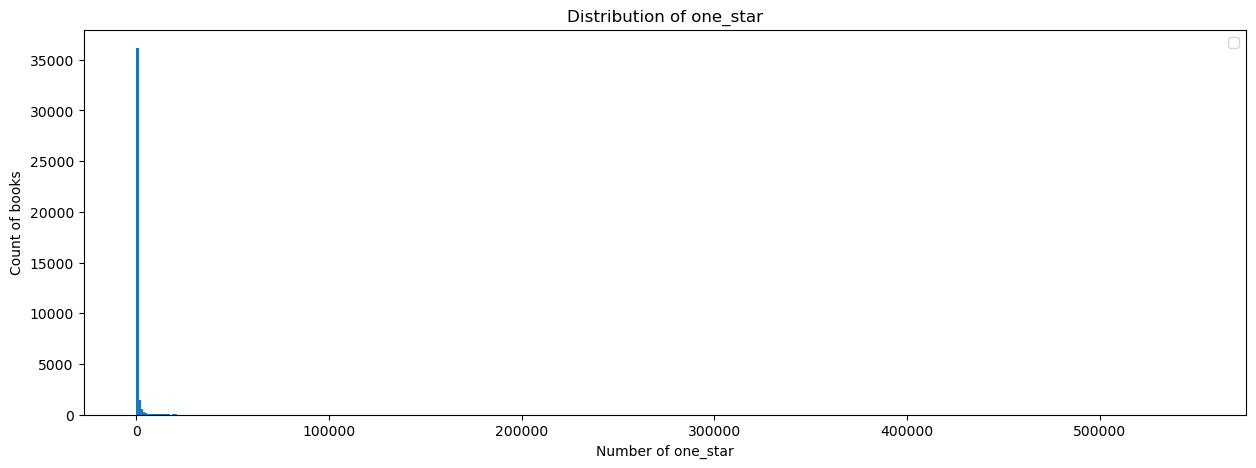

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


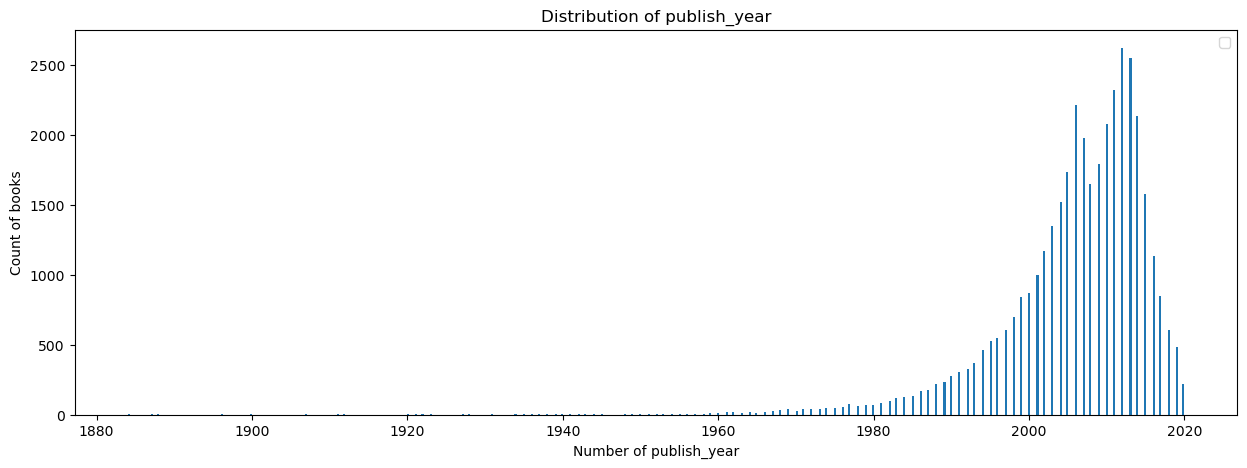

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


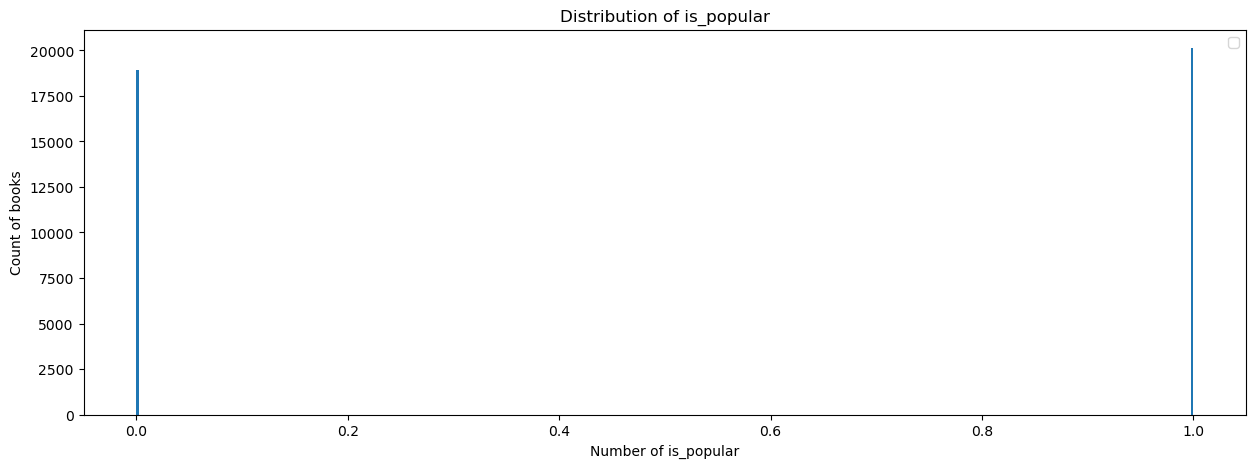

In [365]:
for col in numeric_columns:
    
    #plotting the values to look at the distribution
    plt.figure(figsize=[15,5])
    plt.hist(books_df[col],bins=500)
    
    plt.title('Distribution of '+col)
    plt.xlabel('Number of '+col)
    plt.ylabel('Count of books')
    plt.legend()

    plt.show()

#### 4.2.2 Popularity vs. Word count, pages

We can also look at how the popularity relates to certain features: is the average length of a book the same if it is popular vs. no popular? what about the word count in the description? In the title?

/var/folders/mb/jl8znhcx6hn6mh8dkgr4r4n80000gn/T/ipykernel_18984/1888872919.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  books_df.groupby('is_popular').mean()['pages'].plot(kind='barh', color='lightseagreen')


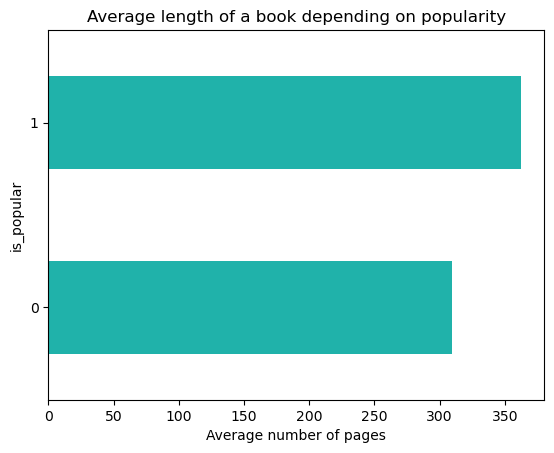

In [366]:
#plotting the average length of a book depending on popularity
plt.figure()
books_df.groupby('is_popular').mean()['pages'].plot(kind='barh', color='lightseagreen')
plt.title("Average length of a book depending on popularity")
plt. xlabel("Average number of pages")
plt.show()

Books that are popular have an average length of 350 pages, whereas books that are not popular have an average length of 300 pages. In this dataset, books with an average rating above 4 seems to be slightly longer than books with an average rating below 4.

/var/folders/mb/jl8znhcx6hn6mh8dkgr4r4n80000gn/T/ipykernel_18984/3801175064.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  books_df.groupby('is_popular').mean()['word_count_description'].plot(kind='barh', color='lightseagreen')


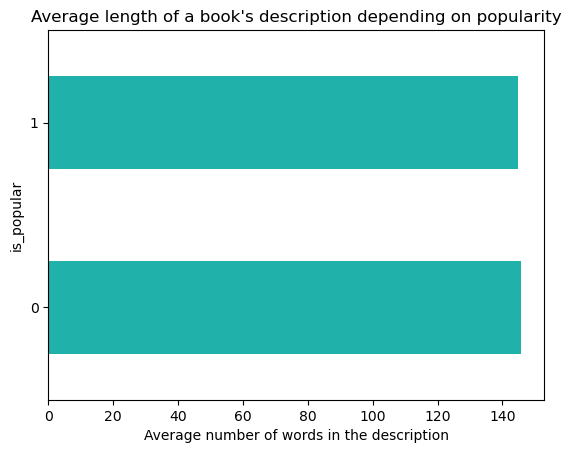

In [367]:
#plotting the average length of a book's description of a book depending on popularity
plt.figure()
books_df.groupby('is_popular').mean()['word_count_description'].plot(kind='barh', color='lightseagreen')
plt.title("Average length of a book's description depending on popularity")
plt. xlabel("Average number of words in the description")
plt.show()

/var/folders/mb/jl8znhcx6hn6mh8dkgr4r4n80000gn/T/ipykernel_18984/984914417.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  books_df.groupby('is_popular').mean()['word_count_title'].plot(kind='barh', color='lightseagreen')


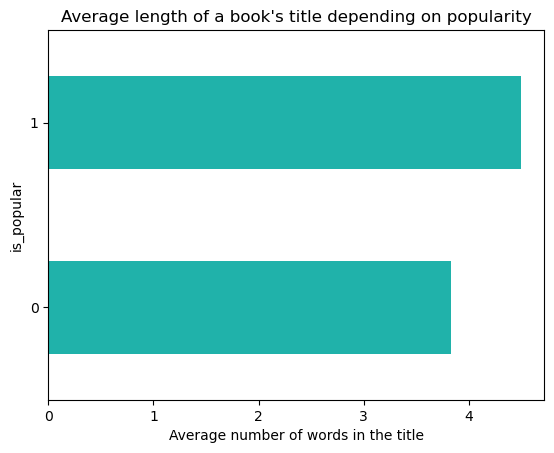

In [368]:
#plotting the average length of a book's title depending on popularity
plt.figure()
books_df.groupby('is_popular').mean()['word_count_title'].plot(kind='barh', color='lightseagreen')
plt.title("Average length of a book's title depending on popularity")
plt. xlabel("Average number of words in the title")
plt.show()

The length of the book's title and description seem to be more or less the same whether or not the book is popular.

/var/folders/mb/jl8znhcx6hn6mh8dkgr4r4n80000gn/T/ipykernel_18984/2516581134.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  books_df.groupby('is_popular').mean()['publish_year'].plot(kind='barh', color='lightseagreen')


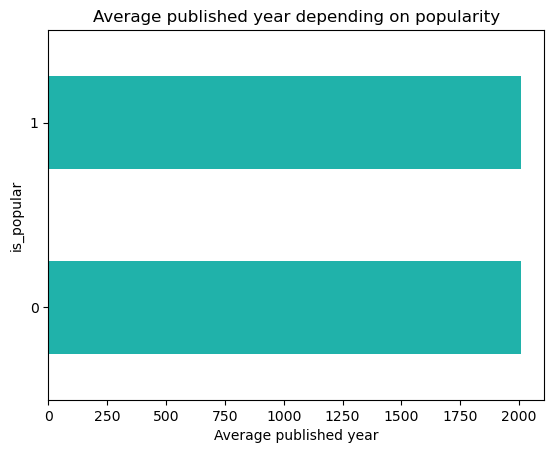

In [369]:
#plotting the average length of a book's title depending on popularity
plt.figure()
books_df.groupby('is_popular').mean()['publish_year'].plot(kind='barh', color='lightseagreen')
plt.title("Average published year depending on popularity")
plt. xlabel("Average published year")
plt.show()

Same here with the publish year, we don't see any specific trends one way or another...

#### 4.2.3 Average Rating vs Genre

We want to see the representation of each genre over the total of books, but alos how popular each genre is. To do that, we'll put the genres and book's popularity in a separate dataframe, and count the number of popular and not popular books for each genre.

In [370]:
# Putting the total books by genre in a dataframe
books_by_genre=books_df.filter(regex='^genre_|is_popular', axis=1)
books_by_genre

,genre_Adult,genre_Adventure,genre_Biography,genre_Childrens,genre_Classics,genre_Contemporary,genre_Fantasy,genre_Fiction,genre_Historical,genre_Historical Fiction,genre_History,genre_Horror,genre_Islam,genre_Literature,genre_Magic,genre_Mystery,genre_Nonfiction,genre_Novels,genre_Paranormal,genre_Poetry,genre_Romance,genre_Science Fiction,genre_Thriller,genre_Urban,genre_Young Adult,genre_Other,is_popular
0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1
1,0,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
2,0,0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1
3,1,0,0,0,1,0,0,1,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39034,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1
39035,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
39036,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
39037,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [371]:
#Calculating the popularity by genre
popularity_by_genre=books_by_genre.groupby('is_popular').sum().T
popularity_by_genre=popularity_by_genre.sort_values(by=0)
popularity_by_genre

is_popular,0,1
genre_Urban,35,104
genre_Islam,48,96
genre_Poetry,304,738
genre_Other,485,1083
genre_History,1010,1900
genre_Biography,1082,1530
genre_Horror,1544,991
genre_Magic,1719,2120
genre_Childrens,1836,2528
genre_Thriller,2408,1540


<Figure size 640x480 with 0 Axes>

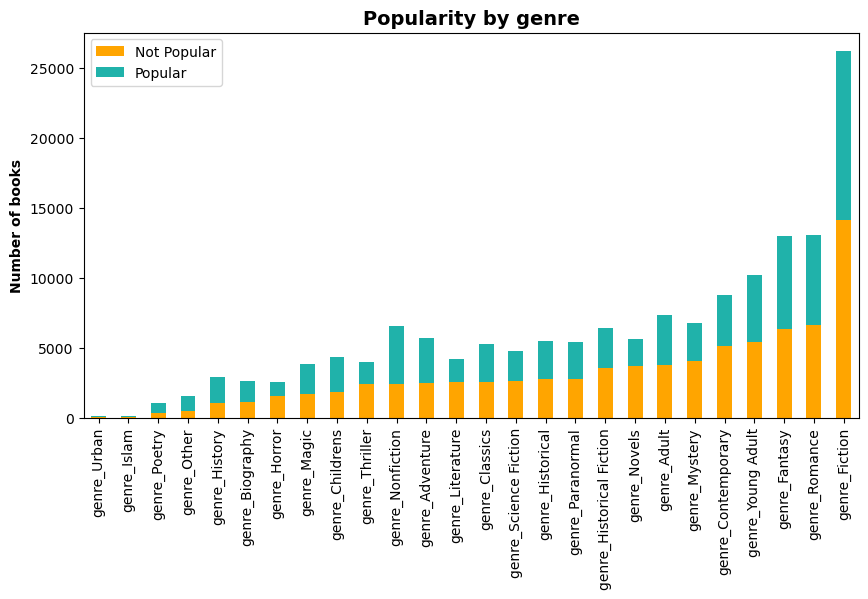

In [411]:
#Plotting the popularity by genre and the proportion of overall total
plt.figure()
popularity_by_genre.plot(kind='bar',stacked=True,figsize=(10,5), color=('orange','lightseagreen'))
plt.title('Popularity by genre',weight='bold',fontsize=14)
plt.ylabel('Number of books',weight='bold')
plt.legend(['Not Popular','Popular'])
plt.show()

We see that Fiction is the most represented genre in the dataset, but that the popularity is pretty much 50/50. Whereas genre like Poetry is a very small proportion of all the books, but those books are really popular.

#### 4.2.4 Popularity and Series

We want to see if books that belong to a series are more popular than books that don't belong to a series.

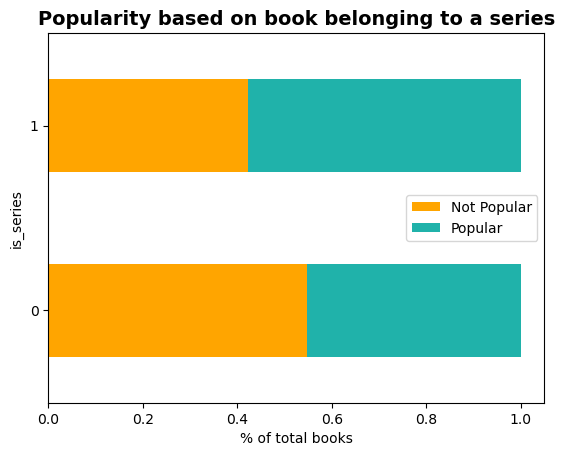

In [398]:
pd.crosstab(books_df['is_series'],books_df['is_popular'],normalize='index').plot(kind='barh',stacked=True, color=('orange','lightseagreen'))
plt.title('Popularity based on book belonging to a series',weight='bold',fontsize=14)
plt.xlabel('% of total books')
plt.ylabel('is_series')
plt.legend(['Not Popular','Popular'])
plt.show()

In [391]:
#Getting the %
pd.crosstab(books_df['is_series'],books_df['is_popular'],normalize='index')

is_popular,0,1
is_series,,
0,0.547618,0.452382
1,0.421728,0.578272


Almost 60% of the books that belong to a series are popular, but books that don't belong to a series seem to be as equally popular and not popular.

## 4.3 Exporting the cleaned up file to CSV

For our modelling, we will focus on predicting the popularity of a book based on its attributes.

We will remove a few columns for the final dataset we would like to work with:
- the breakdown by number of stars as they are redundant with the target variable
- the number of ratings as they are not a book's attribute
- count of the genres as they bring no new information
- avg_rating as this is a continuous variable and has been replaced by a binary target
- author, as we have created a new feature that counts the number of books by author instead

In [373]:
#Dropping the columns
books_df.drop(['five_stars','four_stars','three_stars','two_stars','one_star','genres_standardized_count','avg_rating','main_author','num_ratings'],axis=1,inplace=True)

In [374]:
#Checking info one last time
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39039 entries, 0 to 39038
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   title                         39039 non-null  object
 1   description                   39039 non-null  object
 2   pages                         39039 non-null  int64 
 3   word_count_title              39039 non-null  int64 
 4   is_series                     39039 non-null  int64 
 5   book_count_by_author          39039 non-null  int64 
 6   word_count_description        39039 non-null  int64 
 7   genre_Adult                   39039 non-null  int64 
 8   genre_Adventure               39039 non-null  int64 
 9   genre_Biography               39039 non-null  int64 
 10  genre_Childrens               39039 non-null  int64 
 11  genre_Classics                39039 non-null  int64 
 12  genre_Contemporary            39039 non-null  int64 
 13  genre_Fantasy   

In [375]:
#Final shape
books_df.shape

(39039, 41)

That looks great, we have 39,032 rows and 42 columns. We can now export our final cleaned up file to CSV.

In [376]:
#Export cleaned_up file to CSV
export_file_path=("data/")

In [377]:
#Export cleaned_up file to CSV
books_df.to_csv(export_file_path+"books_df_clean.csv")

# 5. Conclusion

We started with a dataset of 52,478 rows and 25 columns, and ended up with a cleaned dataset of 39,039 rows and 41 columns. That's a 25% reduction in size. Why? We removed the following entries:
- books that were not in English(18%)
- duplicated rows
- books that had no description
- books that had 0 pages
- books that had less than 10 reviews

We also turned some non-numeric columns into numerical values:
- Reduced 966 genres to the 25 most represented genres in the dataset, in the form of binary columns (a book can be several genres)
- Turned the 4 main book formats into dummy variables
- Changed the awards list into a binary column 'is-series'
- Changed the author name into an author frequency column (how many books this author has listed on the Goodreads' list)
- Turned published date into published year
- Added word count on title and description

Finally, we dropped columns that had too many missing values:
- Edition
- Characters
- Settings
- First Published date

#### A note on data quality and bias

This dataset was put together by students who scraped the Goodreads' Best Book Ever list. This creates some bias in the data, since the star ratings are given by Goodread's users. That might not be representative of the entire population of readers. 

Second, we decided to keep books that had more than 10 reviews to ensure that the star rating was a true average, but realistically the more reviews the better. We just couldn't afford to keep books with 1000 reviews or more as we would have lost 50% of our dataset.

Third, the quality of some of the columns is questionable. We have seen that the published date is not the first published date, so it doesn't really give an indication of how old the novel is. Due to the formatting of the date, we might also have gotten the century wrong. Some other features may or may not be accurate - for example, 48% of the books are indicated as being part of a serie. Is it because there are missing values, or because indeed 1 in 2 books are part of a series? Also, how is series defined in this context? 

Fourth, We saw that some books, although not true duplicates, were probably the same, like Harry Potter and the Sorcerer's Stone and Harry Potter Vol 1. There were also books that were written by what looked 'non-official' authors, like 'thefreakoffreaks' . We decided to keep all of those in our cleaned dataset as assessing the credibility of the books was beyond the scope of this project.